# TODO:

* Calcular información mutua para todos los ficheros con resoluciones grandes <b style='color: green'>DONE</b>
* Función transferencia info, que es copiar la de informacion mutua y devolver dividiendo entre la entropia <b style='color: green'>DONE</b>
* Calcular información mutua para todos los ficheros utilizando los bursts como codificación <b style='color: orange'>DOING</b>
* Gráficas interspike para explicar los thresholds en get_bursts y en la selección de resoluciones
* Gráficas de una zona de los spikes para explicar los thresholds en get_spikes
* Gráficas de cada coso para ver cómo queda (Heatmaps, por tamaño de palabra...)
* Comparar transferencia de información LP->VD frente a VD->LP
* 16 gráficas de transferencia de información (una por tamaño de palabra) con 3 lineas donde cada una corresponden a un fichero
* Shiftear una serie y medir la mi en función del retraso
* Ver cuántos spikes pillamos sin querer al ampliar la resolucion

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *
import pickle
import seaborn as sns

In [ ]:
from_files = ["./DatosSinapsisArtificial/TrozoC_bin.csv",
              "./DatosSinapsisArtificial/TrozoR_bin.csv",
              "./DatosSinapsisArtificial/TrozoG_bin.csv"]
cols = [["LP_burst", "VD_burst"],
        ["LP_burst", "VD_burst"],
        ["LP_burst", "VD_burst"]]
bin_cols = [["LP_bin", "VD_bin"],
            ["LP_bin", "VD_bin"],
            ["LP_bin", "VD_bin"]]
to_files = ["dataC_burst.pkl",
            "dataR_burst.pkl",
            "dataG_burst.pkl"]
thresholds = [1000,1000,1000]
resolutions = [2000, 2000, 2000]
word_lens = [8, 8, 8]
col_names = [f"word_len {i}" for i in range(max(word_lens))]
row_names = [f"resolution {i}" for i in range(max(resolutions))]
for n in range(len(from_files)):
    df = pd.read_csv(from_files[n])[bin_cols[n]]
    df = get_bursts(df, thresholds[n], bin_cols[n], cols[n])[cols[n]]
    df = df.astype({cols[n][0]:'u1', cols[n][0]:'u1'})
    try:
        with open(to_files[n], "rb") as f:
            data = pickle.load(f)
    except FileNotFoundError:
        data = {
            "transfer_info_col1_col2" : pd.DataFrame(columns = col_names, index = row_names),
            "transfer_info_col2_col1" : pd.DataFrame(columns = col_names, index = row_names),
            "mutual_info" : pd.DataFrame(columns = col_names, index = row_names),
            "col1_entropy" : pd.DataFrame(columns = col_names, index = row_names),
            "col2_entropy" : pd.DataFrame(columns = col_names, index = row_names),
            "joined_entropy" : pd.DataFrame(columns = col_names, index = row_names)
        }
        data["transfer_info_col1_col2"][:] = 0
        data["transfer_info_col2_col1"][:] = 0
        data["mutual_info"][:] = 0
        data["col1_entropy"][:] = 0
        data["col2_entropy"][:] = 0
        data["joined_entropy"][:] = 0
    for i in range(resolutions[n]):
        for j in range(word_lens[n]):
            if (data["transfer_info_col1_col2"].loc[row_names[i], col_names[j]] != 0 and
                data["transfer_info_col2_col1"].loc[row_names[i], col_names[j]] != 0 and
                data["mutual_info"].loc[row_names[i], col_names[j]] != 0 and
                data["col1_entropy"].loc[row_names[i], col_names[j]] != 0 and
                data["col2_entropy"].loc[row_names[i], col_names[j]] != 0 and
                data["joined_entropy"].loc[row_names[i], col_names[j]] != 0):
                print(f"Previamente calculado {to_files[n]}: resolución={i+1}, palabra={j+1} en la posicion[{i}][{j}]")
                continue
            print(f"Comienzo cálculo resolución={i+1}, palabra={j+1} en la posicion[{i}][{j}]")
            tr, mi, e, ej = transfer_info(resolution(df, i+1), cols[n], j+1)
            data["transfer_info_col1_col2"].loc[row_names[i], col_names[j]] = tr[0]
            data["transfer_info_col2_col1"].loc[row_names[i], col_names[j]] = tr[1]
            data["mutual_info"].loc[row_names[i], col_names[j]] = mi
            data["col1_entropy"].loc[row_names[i], col_names[j]] = e[0]
            data["col2_entropy"].loc[row_names[i], col_names[j]] = e[1]
            data["joined_entropy"].loc[row_names[i], col_names[j]] = ej
            print(f"Calculado {to_files[n]}: resolución={i+1}, palabra={j+1} en la posicion[{i}][{j}]")
            with open(to_files[n], "wb") as f:
                pickle.dump(data, f)

Previamente calculado dataC_burst.pkl: resolución=1, palabra=1 en la posicion[0][0]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=2 en la posicion[0][1]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=3 en la posicion[0][2]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=4 en la posicion[0][3]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=5 en la posicion[0][4]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=6 en la posicion[0][5]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=7 en la posicion[0][6]
Previamente calculado dataC_burst.pkl: resolución=1, palabra=8 en la posicion[0][7]
Previamente calculado dataC_burst.pkl: resolución=2, palabra=1 en la posicion[1][0]
Previamente calculado dataC_burst.pkl: resolución=2, palabra=2 en la posicion[1][1]
Previamente calculado dataC_burst.pkl: resolución=2, palabra=3 en la posicion[1][2]
Previamente calculado dataC_burst.pkl: resolución=2, palabra=4 en la posicio

Previamente calculado dataC_burst.pkl: resolución=183, palabra=2 en la posicion[182][1]
Previamente calculado dataC_burst.pkl: resolución=183, palabra=3 en la posicion[182][2]
Previamente calculado dataC_burst.pkl: resolución=183, palabra=4 en la posicion[182][3]
Previamente calculado dataC_burst.pkl: resolución=183, palabra=5 en la posicion[182][4]
Previamente calculado dataC_burst.pkl: resolución=183, palabra=6 en la posicion[182][5]
Previamente calculado dataC_burst.pkl: resolución=183, palabra=7 en la posicion[182][6]
Previamente calculado dataC_burst.pkl: resolución=183, palabra=8 en la posicion[182][7]
Previamente calculado dataC_burst.pkl: resolución=184, palabra=1 en la posicion[183][0]
Previamente calculado dataC_burst.pkl: resolución=184, palabra=2 en la posicion[183][1]
Previamente calculado dataC_burst.pkl: resolución=184, palabra=3 en la posicion[183][2]
Previamente calculado dataC_burst.pkl: resolución=184, palabra=4 en la posicion[183][3]
Previamente calculado dataC_burs

Previamente calculado dataC_burst.pkl: resolución=434, palabra=2 en la posicion[433][1]
Previamente calculado dataC_burst.pkl: resolución=434, palabra=3 en la posicion[433][2]
Previamente calculado dataC_burst.pkl: resolución=434, palabra=4 en la posicion[433][3]
Previamente calculado dataC_burst.pkl: resolución=434, palabra=5 en la posicion[433][4]
Previamente calculado dataC_burst.pkl: resolución=434, palabra=6 en la posicion[433][5]
Previamente calculado dataC_burst.pkl: resolución=434, palabra=7 en la posicion[433][6]
Previamente calculado dataC_burst.pkl: resolución=434, palabra=8 en la posicion[433][7]
Previamente calculado dataC_burst.pkl: resolución=435, palabra=1 en la posicion[434][0]
Previamente calculado dataC_burst.pkl: resolución=435, palabra=2 en la posicion[434][1]
Previamente calculado dataC_burst.pkl: resolución=435, palabra=3 en la posicion[434][2]
Previamente calculado dataC_burst.pkl: resolución=435, palabra=4 en la posicion[434][3]
Previamente calculado dataC_burs

Previamente calculado dataC_burst.pkl: resolución=669, palabra=6 en la posicion[668][5]
Previamente calculado dataC_burst.pkl: resolución=669, palabra=7 en la posicion[668][6]
Previamente calculado dataC_burst.pkl: resolución=669, palabra=8 en la posicion[668][7]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=1 en la posicion[669][0]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=2 en la posicion[669][1]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=3 en la posicion[669][2]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=4 en la posicion[669][3]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=5 en la posicion[669][4]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=6 en la posicion[669][5]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=7 en la posicion[669][6]
Previamente calculado dataC_burst.pkl: resolución=670, palabra=8 en la posicion[669][7]
Previamente calculado dataC_burs

Previamente calculado dataC_burst.pkl: resolución=847, palabra=1 en la posicion[846][0]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=2 en la posicion[846][1]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=3 en la posicion[846][2]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=4 en la posicion[846][3]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=5 en la posicion[846][4]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=6 en la posicion[846][5]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=7 en la posicion[846][6]
Previamente calculado dataC_burst.pkl: resolución=847, palabra=8 en la posicion[846][7]
Previamente calculado dataC_burst.pkl: resolución=848, palabra=1 en la posicion[847][0]
Previamente calculado dataC_burst.pkl: resolución=848, palabra=2 en la posicion[847][1]
Previamente calculado dataC_burst.pkl: resolución=848, palabra=3 en la posicion[847][2]
Previamente calculado dataC_burs

Previamente calculado dataC_burst.pkl: resolución=1069, palabra=2 en la posicion[1068][1]
Previamente calculado dataC_burst.pkl: resolución=1069, palabra=3 en la posicion[1068][2]
Previamente calculado dataC_burst.pkl: resolución=1069, palabra=4 en la posicion[1068][3]
Previamente calculado dataC_burst.pkl: resolución=1069, palabra=5 en la posicion[1068][4]
Previamente calculado dataC_burst.pkl: resolución=1069, palabra=6 en la posicion[1068][5]
Previamente calculado dataC_burst.pkl: resolución=1069, palabra=7 en la posicion[1068][6]
Previamente calculado dataC_burst.pkl: resolución=1069, palabra=8 en la posicion[1068][7]
Previamente calculado dataC_burst.pkl: resolución=1070, palabra=1 en la posicion[1069][0]
Previamente calculado dataC_burst.pkl: resolución=1070, palabra=2 en la posicion[1069][1]
Previamente calculado dataC_burst.pkl: resolución=1070, palabra=3 en la posicion[1069][2]
Previamente calculado dataC_burst.pkl: resolución=1070, palabra=4 en la posicion[1069][3]
Previament

Previamente calculado dataC_burst.pkl: resolución=1310, palabra=6 en la posicion[1309][5]
Previamente calculado dataC_burst.pkl: resolución=1310, palabra=7 en la posicion[1309][6]
Previamente calculado dataC_burst.pkl: resolución=1310, palabra=8 en la posicion[1309][7]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=1 en la posicion[1310][0]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=2 en la posicion[1310][1]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=3 en la posicion[1310][2]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=4 en la posicion[1310][3]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=5 en la posicion[1310][4]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=6 en la posicion[1310][5]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=7 en la posicion[1310][6]
Previamente calculado dataC_burst.pkl: resolución=1311, palabra=8 en la posicion[1310][7]
Previament

Previamente calculado dataC_burst.pkl: resolución=1560, palabra=6 en la posicion[1559][5]
Previamente calculado dataC_burst.pkl: resolución=1560, palabra=7 en la posicion[1559][6]
Previamente calculado dataC_burst.pkl: resolución=1560, palabra=8 en la posicion[1559][7]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=1 en la posicion[1560][0]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=2 en la posicion[1560][1]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=3 en la posicion[1560][2]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=4 en la posicion[1560][3]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=5 en la posicion[1560][4]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=6 en la posicion[1560][5]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=7 en la posicion[1560][6]
Previamente calculado dataC_burst.pkl: resolución=1561, palabra=8 en la posicion[1560][7]
Previament

Previamente calculado dataC_burst.pkl: resolución=1810, palabra=5 en la posicion[1809][4]
Previamente calculado dataC_burst.pkl: resolución=1810, palabra=6 en la posicion[1809][5]
Previamente calculado dataC_burst.pkl: resolución=1810, palabra=7 en la posicion[1809][6]
Previamente calculado dataC_burst.pkl: resolución=1810, palabra=8 en la posicion[1809][7]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=1 en la posicion[1810][0]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=2 en la posicion[1810][1]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=3 en la posicion[1810][2]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=4 en la posicion[1810][3]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=5 en la posicion[1810][4]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=6 en la posicion[1810][5]
Previamente calculado dataC_burst.pkl: resolución=1811, palabra=7 en la posicion[1810][6]
Previament

Previamente calculado dataR_burst.pkl: resolución=1, palabra=1 en la posicion[0][0]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=2 en la posicion[0][1]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=3 en la posicion[0][2]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=4 en la posicion[0][3]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=5 en la posicion[0][4]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=6 en la posicion[0][5]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=7 en la posicion[0][6]
Previamente calculado dataR_burst.pkl: resolución=1, palabra=8 en la posicion[0][7]
Previamente calculado dataR_burst.pkl: resolución=2, palabra=1 en la posicion[1][0]
Previamente calculado dataR_burst.pkl: resolución=2, palabra=2 en la posicion[1][1]
Previamente calculado dataR_burst.pkl: resolución=2, palabra=3 en la posicion[1][2]
Previamente calculado dataR_burst.pkl: resolución=2, palabra=4 en la posicio

Previamente calculado dataR_burst.pkl: resolución=247, palabra=8 en la posicion[246][7]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=1 en la posicion[247][0]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=2 en la posicion[247][1]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=3 en la posicion[247][2]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=4 en la posicion[247][3]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=5 en la posicion[247][4]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=6 en la posicion[247][5]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=7 en la posicion[247][6]
Previamente calculado dataR_burst.pkl: resolución=248, palabra=8 en la posicion[247][7]
Previamente calculado dataR_burst.pkl: resolución=249, palabra=1 en la posicion[248][0]
Previamente calculado dataR_burst.pkl: resolución=249, palabra=2 en la posicion[248][1]
Previamente calculado dataR_burs

Previamente calculado dataR_burst.pkl: resolución=497, palabra=8 en la posicion[496][7]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=1 en la posicion[497][0]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=2 en la posicion[497][1]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=3 en la posicion[497][2]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=4 en la posicion[497][3]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=5 en la posicion[497][4]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=6 en la posicion[497][5]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=7 en la posicion[497][6]
Previamente calculado dataR_burst.pkl: resolución=498, palabra=8 en la posicion[497][7]
Previamente calculado dataR_burst.pkl: resolución=499, palabra=1 en la posicion[498][0]
Previamente calculado dataR_burst.pkl: resolución=499, palabra=2 en la posicion[498][1]
Previamente calculado dataR_burs

Previamente calculado dataR_burst.pkl: resolución=747, palabra=7 en la posicion[746][6]
Previamente calculado dataR_burst.pkl: resolución=747, palabra=8 en la posicion[746][7]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=1 en la posicion[747][0]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=2 en la posicion[747][1]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=3 en la posicion[747][2]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=4 en la posicion[747][3]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=5 en la posicion[747][4]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=6 en la posicion[747][5]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=7 en la posicion[747][6]
Previamente calculado dataR_burst.pkl: resolución=748, palabra=8 en la posicion[747][7]
Previamente calculado dataR_burst.pkl: resolución=749, palabra=1 en la posicion[748][0]
Previamente calculado dataR_burs

Previamente calculado dataR_burst.pkl: resolución=989, palabra=2 en la posicion[988][1]
Previamente calculado dataR_burst.pkl: resolución=989, palabra=3 en la posicion[988][2]
Previamente calculado dataR_burst.pkl: resolución=989, palabra=4 en la posicion[988][3]
Previamente calculado dataR_burst.pkl: resolución=989, palabra=5 en la posicion[988][4]
Previamente calculado dataR_burst.pkl: resolución=989, palabra=6 en la posicion[988][5]
Previamente calculado dataR_burst.pkl: resolución=989, palabra=7 en la posicion[988][6]
Previamente calculado dataR_burst.pkl: resolución=989, palabra=8 en la posicion[988][7]
Previamente calculado dataR_burst.pkl: resolución=990, palabra=1 en la posicion[989][0]
Previamente calculado dataR_burst.pkl: resolución=990, palabra=2 en la posicion[989][1]
Previamente calculado dataR_burst.pkl: resolución=990, palabra=3 en la posicion[989][2]
Previamente calculado dataR_burst.pkl: resolución=990, palabra=4 en la posicion[989][3]
Previamente calculado dataR_burs

Previamente calculado dataR_burst.pkl: resolución=1212, palabra=5 en la posicion[1211][4]
Previamente calculado dataR_burst.pkl: resolución=1212, palabra=6 en la posicion[1211][5]
Previamente calculado dataR_burst.pkl: resolución=1212, palabra=7 en la posicion[1211][6]
Previamente calculado dataR_burst.pkl: resolución=1212, palabra=8 en la posicion[1211][7]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=1 en la posicion[1212][0]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=2 en la posicion[1212][1]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=3 en la posicion[1212][2]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=4 en la posicion[1212][3]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=5 en la posicion[1212][4]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=6 en la posicion[1212][5]
Previamente calculado dataR_burst.pkl: resolución=1213, palabra=7 en la posicion[1212][6]
Previament

Previamente calculado dataR_burst.pkl: resolución=1435, palabra=2 en la posicion[1434][1]
Previamente calculado dataR_burst.pkl: resolución=1435, palabra=3 en la posicion[1434][2]
Previamente calculado dataR_burst.pkl: resolución=1435, palabra=4 en la posicion[1434][3]
Previamente calculado dataR_burst.pkl: resolución=1435, palabra=5 en la posicion[1434][4]
Previamente calculado dataR_burst.pkl: resolución=1435, palabra=6 en la posicion[1434][5]
Previamente calculado dataR_burst.pkl: resolución=1435, palabra=7 en la posicion[1434][6]
Previamente calculado dataR_burst.pkl: resolución=1435, palabra=8 en la posicion[1434][7]
Previamente calculado dataR_burst.pkl: resolución=1436, palabra=1 en la posicion[1435][0]
Previamente calculado dataR_burst.pkl: resolución=1436, palabra=2 en la posicion[1435][1]
Previamente calculado dataR_burst.pkl: resolución=1436, palabra=3 en la posicion[1435][2]
Previamente calculado dataR_burst.pkl: resolución=1436, palabra=4 en la posicion[1435][3]
Previament

Previamente calculado dataR_burst.pkl: resolución=1685, palabra=1 en la posicion[1684][0]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=2 en la posicion[1684][1]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=3 en la posicion[1684][2]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=4 en la posicion[1684][3]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=5 en la posicion[1684][4]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=6 en la posicion[1684][5]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=7 en la posicion[1684][6]
Previamente calculado dataR_burst.pkl: resolución=1685, palabra=8 en la posicion[1684][7]
Previamente calculado dataR_burst.pkl: resolución=1686, palabra=1 en la posicion[1685][0]
Previamente calculado dataR_burst.pkl: resolución=1686, palabra=2 en la posicion[1685][1]
Previamente calculado dataR_burst.pkl: resolución=1686, palabra=3 en la posicion[1685][2]
Previament

Previamente calculado dataR_burst.pkl: resolución=1935, palabra=1 en la posicion[1934][0]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=2 en la posicion[1934][1]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=3 en la posicion[1934][2]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=4 en la posicion[1934][3]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=5 en la posicion[1934][4]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=6 en la posicion[1934][5]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=7 en la posicion[1934][6]
Previamente calculado dataR_burst.pkl: resolución=1935, palabra=8 en la posicion[1934][7]
Previamente calculado dataR_burst.pkl: resolución=1936, palabra=1 en la posicion[1935][0]
Previamente calculado dataR_burst.pkl: resolución=1936, palabra=2 en la posicion[1935][1]
Previamente calculado dataR_burst.pkl: resolución=1936, palabra=3 en la posicion[1935][2]
Previament

Comienzo cálculo resolución=1, palabra=1 en la posicion[0][0]
Calculado dataG_burst.pkl: resolución=1, palabra=1 en la posicion[0][0]
Comienzo cálculo resolución=1, palabra=2 en la posicion[0][1]
Calculado dataG_burst.pkl: resolución=1, palabra=2 en la posicion[0][1]
Comienzo cálculo resolución=1, palabra=3 en la posicion[0][2]
Calculado dataG_burst.pkl: resolución=1, palabra=3 en la posicion[0][2]
Comienzo cálculo resolución=1, palabra=4 en la posicion[0][3]
Calculado dataG_burst.pkl: resolución=1, palabra=4 en la posicion[0][3]
Comienzo cálculo resolución=1, palabra=5 en la posicion[0][4]
Calculado dataG_burst.pkl: resolución=1, palabra=5 en la posicion[0][4]
Comienzo cálculo resolución=1, palabra=6 en la posicion[0][5]
Calculado dataG_burst.pkl: resolución=1, palabra=6 en la posicion[0][5]
Comienzo cálculo resolución=1, palabra=7 en la posicion[0][6]
Calculado dataG_burst.pkl: resolución=1, palabra=7 en la posicion[0][6]
Comienzo cálculo resolución=1, palabra=8 en la posicion[0][7]


Calculado dataG_burst.pkl: resolución=8, palabra=6 en la posicion[7][5]
Comienzo cálculo resolución=8, palabra=7 en la posicion[7][6]
Calculado dataG_burst.pkl: resolución=8, palabra=7 en la posicion[7][6]
Comienzo cálculo resolución=8, palabra=8 en la posicion[7][7]
Calculado dataG_burst.pkl: resolución=8, palabra=8 en la posicion[7][7]
Comienzo cálculo resolución=9, palabra=1 en la posicion[8][0]
Calculado dataG_burst.pkl: resolución=9, palabra=1 en la posicion[8][0]
Comienzo cálculo resolución=9, palabra=2 en la posicion[8][1]
Calculado dataG_burst.pkl: resolución=9, palabra=2 en la posicion[8][1]
Comienzo cálculo resolución=9, palabra=3 en la posicion[8][2]
Calculado dataG_burst.pkl: resolución=9, palabra=3 en la posicion[8][2]
Comienzo cálculo resolución=9, palabra=4 en la posicion[8][3]
Calculado dataG_burst.pkl: resolución=9, palabra=4 en la posicion[8][3]
Comienzo cálculo resolución=9, palabra=5 en la posicion[8][4]
Calculado dataG_burst.pkl: resolución=9, palabra=5 en la posic

Calculado dataG_burst.pkl: resolución=16, palabra=2 en la posicion[15][1]
Comienzo cálculo resolución=16, palabra=3 en la posicion[15][2]
Calculado dataG_burst.pkl: resolución=16, palabra=3 en la posicion[15][2]
Comienzo cálculo resolución=16, palabra=4 en la posicion[15][3]
Calculado dataG_burst.pkl: resolución=16, palabra=4 en la posicion[15][3]
Comienzo cálculo resolución=16, palabra=5 en la posicion[15][4]
Calculado dataG_burst.pkl: resolución=16, palabra=5 en la posicion[15][4]
Comienzo cálculo resolución=16, palabra=6 en la posicion[15][5]
Calculado dataG_burst.pkl: resolución=16, palabra=6 en la posicion[15][5]
Comienzo cálculo resolución=16, palabra=7 en la posicion[15][6]
Calculado dataG_burst.pkl: resolución=16, palabra=7 en la posicion[15][6]
Comienzo cálculo resolución=16, palabra=8 en la posicion[15][7]
Calculado dataG_burst.pkl: resolución=16, palabra=8 en la posicion[15][7]
Comienzo cálculo resolución=17, palabra=1 en la posicion[16][0]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=23, palabra=6 en la posicion[22][5]
Comienzo cálculo resolución=23, palabra=7 en la posicion[22][6]
Calculado dataG_burst.pkl: resolución=23, palabra=7 en la posicion[22][6]
Comienzo cálculo resolución=23, palabra=8 en la posicion[22][7]
Calculado dataG_burst.pkl: resolución=23, palabra=8 en la posicion[22][7]
Comienzo cálculo resolución=24, palabra=1 en la posicion[23][0]
Calculado dataG_burst.pkl: resolución=24, palabra=1 en la posicion[23][0]
Comienzo cálculo resolución=24, palabra=2 en la posicion[23][1]
Calculado dataG_burst.pkl: resolución=24, palabra=2 en la posicion[23][1]
Comienzo cálculo resolución=24, palabra=3 en la posicion[23][2]
Calculado dataG_burst.pkl: resolución=24, palabra=3 en la posicion[23][2]
Comienzo cálculo resolución=24, palabra=4 en la posicion[23][3]
Calculado dataG_burst.pkl: resolución=24, palabra=4 en la posicion[23][3]
Comienzo cálculo resolución=24, palabra=5 en la posicion[23][4]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=31, palabra=2 en la posicion[30][1]
Comienzo cálculo resolución=31, palabra=3 en la posicion[30][2]
Calculado dataG_burst.pkl: resolución=31, palabra=3 en la posicion[30][2]
Comienzo cálculo resolución=31, palabra=4 en la posicion[30][3]
Calculado dataG_burst.pkl: resolución=31, palabra=4 en la posicion[30][3]
Comienzo cálculo resolución=31, palabra=5 en la posicion[30][4]
Calculado dataG_burst.pkl: resolución=31, palabra=5 en la posicion[30][4]
Comienzo cálculo resolución=31, palabra=6 en la posicion[30][5]
Calculado dataG_burst.pkl: resolución=31, palabra=6 en la posicion[30][5]
Comienzo cálculo resolución=31, palabra=7 en la posicion[30][6]
Calculado dataG_burst.pkl: resolución=31, palabra=7 en la posicion[30][6]
Comienzo cálculo resolución=31, palabra=8 en la posicion[30][7]
Calculado dataG_burst.pkl: resolución=31, palabra=8 en la posicion[30][7]
Comienzo cálculo resolución=32, palabra=1 en la posicion[31][0]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=38, palabra=6 en la posicion[37][5]
Comienzo cálculo resolución=38, palabra=7 en la posicion[37][6]
Calculado dataG_burst.pkl: resolución=38, palabra=7 en la posicion[37][6]
Comienzo cálculo resolución=38, palabra=8 en la posicion[37][7]
Calculado dataG_burst.pkl: resolución=38, palabra=8 en la posicion[37][7]
Comienzo cálculo resolución=39, palabra=1 en la posicion[38][0]
Calculado dataG_burst.pkl: resolución=39, palabra=1 en la posicion[38][0]
Comienzo cálculo resolución=39, palabra=2 en la posicion[38][1]
Calculado dataG_burst.pkl: resolución=39, palabra=2 en la posicion[38][1]
Comienzo cálculo resolución=39, palabra=3 en la posicion[38][2]
Calculado dataG_burst.pkl: resolución=39, palabra=3 en la posicion[38][2]
Comienzo cálculo resolución=39, palabra=4 en la posicion[38][3]
Calculado dataG_burst.pkl: resolución=39, palabra=4 en la posicion[38][3]
Comienzo cálculo resolución=39, palabra=5 en la posicion[38][4]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=46, palabra=2 en la posicion[45][1]
Comienzo cálculo resolución=46, palabra=3 en la posicion[45][2]
Calculado dataG_burst.pkl: resolución=46, palabra=3 en la posicion[45][2]
Comienzo cálculo resolución=46, palabra=4 en la posicion[45][3]
Calculado dataG_burst.pkl: resolución=46, palabra=4 en la posicion[45][3]
Comienzo cálculo resolución=46, palabra=5 en la posicion[45][4]
Calculado dataG_burst.pkl: resolución=46, palabra=5 en la posicion[45][4]
Comienzo cálculo resolución=46, palabra=6 en la posicion[45][5]
Calculado dataG_burst.pkl: resolución=46, palabra=6 en la posicion[45][5]
Comienzo cálculo resolución=46, palabra=7 en la posicion[45][6]
Calculado dataG_burst.pkl: resolución=46, palabra=7 en la posicion[45][6]
Comienzo cálculo resolución=46, palabra=8 en la posicion[45][7]
Calculado dataG_burst.pkl: resolución=46, palabra=8 en la posicion[45][7]
Comienzo cálculo resolución=47, palabra=1 en la posicion[46][0]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=53, palabra=6 en la posicion[52][5]
Comienzo cálculo resolución=53, palabra=7 en la posicion[52][6]
Calculado dataG_burst.pkl: resolución=53, palabra=7 en la posicion[52][6]
Comienzo cálculo resolución=53, palabra=8 en la posicion[52][7]
Calculado dataG_burst.pkl: resolución=53, palabra=8 en la posicion[52][7]
Comienzo cálculo resolución=54, palabra=1 en la posicion[53][0]
Calculado dataG_burst.pkl: resolución=54, palabra=1 en la posicion[53][0]
Comienzo cálculo resolución=54, palabra=2 en la posicion[53][1]
Calculado dataG_burst.pkl: resolución=54, palabra=2 en la posicion[53][1]
Comienzo cálculo resolución=54, palabra=3 en la posicion[53][2]
Calculado dataG_burst.pkl: resolución=54, palabra=3 en la posicion[53][2]
Comienzo cálculo resolución=54, palabra=4 en la posicion[53][3]
Calculado dataG_burst.pkl: resolución=54, palabra=4 en la posicion[53][3]
Comienzo cálculo resolución=54, palabra=5 en la posicion[53][4]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=61, palabra=2 en la posicion[60][1]
Comienzo cálculo resolución=61, palabra=3 en la posicion[60][2]
Calculado dataG_burst.pkl: resolución=61, palabra=3 en la posicion[60][2]
Comienzo cálculo resolución=61, palabra=4 en la posicion[60][3]
Calculado dataG_burst.pkl: resolución=61, palabra=4 en la posicion[60][3]
Comienzo cálculo resolución=61, palabra=5 en la posicion[60][4]
Calculado dataG_burst.pkl: resolución=61, palabra=5 en la posicion[60][4]
Comienzo cálculo resolución=61, palabra=6 en la posicion[60][5]
Calculado dataG_burst.pkl: resolución=61, palabra=6 en la posicion[60][5]
Comienzo cálculo resolución=61, palabra=7 en la posicion[60][6]
Calculado dataG_burst.pkl: resolución=61, palabra=7 en la posicion[60][6]
Comienzo cálculo resolución=61, palabra=8 en la posicion[60][7]
Calculado dataG_burst.pkl: resolución=61, palabra=8 en la posicion[60][7]
Comienzo cálculo resolución=62, palabra=1 en la posicion[61][0]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=68, palabra=6 en la posicion[67][5]
Comienzo cálculo resolución=68, palabra=7 en la posicion[67][6]
Calculado dataG_burst.pkl: resolución=68, palabra=7 en la posicion[67][6]
Comienzo cálculo resolución=68, palabra=8 en la posicion[67][7]
Calculado dataG_burst.pkl: resolución=68, palabra=8 en la posicion[67][7]
Comienzo cálculo resolución=69, palabra=1 en la posicion[68][0]
Calculado dataG_burst.pkl: resolución=69, palabra=1 en la posicion[68][0]
Comienzo cálculo resolución=69, palabra=2 en la posicion[68][1]
Calculado dataG_burst.pkl: resolución=69, palabra=2 en la posicion[68][1]
Comienzo cálculo resolución=69, palabra=3 en la posicion[68][2]
Calculado dataG_burst.pkl: resolución=69, palabra=3 en la posicion[68][2]
Comienzo cálculo resolución=69, palabra=4 en la posicion[68][3]
Calculado dataG_burst.pkl: resolución=69, palabra=4 en la posicion[68][3]
Comienzo cálculo resolución=69, palabra=5 en la posicion[68][4]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=76, palabra=2 en la posicion[75][1]
Comienzo cálculo resolución=76, palabra=3 en la posicion[75][2]
Calculado dataG_burst.pkl: resolución=76, palabra=3 en la posicion[75][2]
Comienzo cálculo resolución=76, palabra=4 en la posicion[75][3]
Calculado dataG_burst.pkl: resolución=76, palabra=4 en la posicion[75][3]
Comienzo cálculo resolución=76, palabra=5 en la posicion[75][4]
Calculado dataG_burst.pkl: resolución=76, palabra=5 en la posicion[75][4]
Comienzo cálculo resolución=76, palabra=6 en la posicion[75][5]
Calculado dataG_burst.pkl: resolución=76, palabra=6 en la posicion[75][5]
Comienzo cálculo resolución=76, palabra=7 en la posicion[75][6]
Calculado dataG_burst.pkl: resolución=76, palabra=7 en la posicion[75][6]
Comienzo cálculo resolución=76, palabra=8 en la posicion[75][7]
Calculado dataG_burst.pkl: resolución=76, palabra=8 en la posicion[75][7]
Comienzo cálculo resolución=77, palabra=1 en la posicion[76][0]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=83, palabra=6 en la posicion[82][5]
Comienzo cálculo resolución=83, palabra=7 en la posicion[82][6]
Calculado dataG_burst.pkl: resolución=83, palabra=7 en la posicion[82][6]
Comienzo cálculo resolución=83, palabra=8 en la posicion[82][7]
Calculado dataG_burst.pkl: resolución=83, palabra=8 en la posicion[82][7]
Comienzo cálculo resolución=84, palabra=1 en la posicion[83][0]
Calculado dataG_burst.pkl: resolución=84, palabra=1 en la posicion[83][0]
Comienzo cálculo resolución=84, palabra=2 en la posicion[83][1]
Calculado dataG_burst.pkl: resolución=84, palabra=2 en la posicion[83][1]
Comienzo cálculo resolución=84, palabra=3 en la posicion[83][2]
Calculado dataG_burst.pkl: resolución=84, palabra=3 en la posicion[83][2]
Comienzo cálculo resolución=84, palabra=4 en la posicion[83][3]
Calculado dataG_burst.pkl: resolución=84, palabra=4 en la posicion[83][3]
Comienzo cálculo resolución=84, palabra=5 en la posicion[83][4]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=91, palabra=2 en la posicion[90][1]
Comienzo cálculo resolución=91, palabra=3 en la posicion[90][2]
Calculado dataG_burst.pkl: resolución=91, palabra=3 en la posicion[90][2]
Comienzo cálculo resolución=91, palabra=4 en la posicion[90][3]
Calculado dataG_burst.pkl: resolución=91, palabra=4 en la posicion[90][3]
Comienzo cálculo resolución=91, palabra=5 en la posicion[90][4]
Calculado dataG_burst.pkl: resolución=91, palabra=5 en la posicion[90][4]
Comienzo cálculo resolución=91, palabra=6 en la posicion[90][5]
Calculado dataG_burst.pkl: resolución=91, palabra=6 en la posicion[90][5]
Comienzo cálculo resolución=91, palabra=7 en la posicion[90][6]
Calculado dataG_burst.pkl: resolución=91, palabra=7 en la posicion[90][6]
Comienzo cálculo resolución=91, palabra=8 en la posicion[90][7]
Calculado dataG_burst.pkl: resolución=91, palabra=8 en la posicion[90][7]
Comienzo cálculo resolución=92, palabra=1 en la posicion[91][0]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=98, palabra=6 en la posicion[97][5]
Comienzo cálculo resolución=98, palabra=7 en la posicion[97][6]
Calculado dataG_burst.pkl: resolución=98, palabra=7 en la posicion[97][6]
Comienzo cálculo resolución=98, palabra=8 en la posicion[97][7]
Calculado dataG_burst.pkl: resolución=98, palabra=8 en la posicion[97][7]
Comienzo cálculo resolución=99, palabra=1 en la posicion[98][0]
Calculado dataG_burst.pkl: resolución=99, palabra=1 en la posicion[98][0]
Comienzo cálculo resolución=99, palabra=2 en la posicion[98][1]
Calculado dataG_burst.pkl: resolución=99, palabra=2 en la posicion[98][1]
Comienzo cálculo resolución=99, palabra=3 en la posicion[98][2]
Calculado dataG_burst.pkl: resolución=99, palabra=3 en la posicion[98][2]
Comienzo cálculo resolución=99, palabra=4 en la posicion[98][3]
Calculado dataG_burst.pkl: resolución=99, palabra=4 en la posicion[98][3]
Comienzo cálculo resolución=99, palabra=5 en la posicion[98][4]
Calculado dataG_burst.pkl: resoluc

Calculado dataG_burst.pkl: resolución=106, palabra=1 en la posicion[105][0]
Comienzo cálculo resolución=106, palabra=2 en la posicion[105][1]
Calculado dataG_burst.pkl: resolución=106, palabra=2 en la posicion[105][1]
Comienzo cálculo resolución=106, palabra=3 en la posicion[105][2]
Calculado dataG_burst.pkl: resolución=106, palabra=3 en la posicion[105][2]
Comienzo cálculo resolución=106, palabra=4 en la posicion[105][3]
Calculado dataG_burst.pkl: resolución=106, palabra=4 en la posicion[105][3]
Comienzo cálculo resolución=106, palabra=5 en la posicion[105][4]
Calculado dataG_burst.pkl: resolución=106, palabra=5 en la posicion[105][4]
Comienzo cálculo resolución=106, palabra=6 en la posicion[105][5]
Calculado dataG_burst.pkl: resolución=106, palabra=6 en la posicion[105][5]
Comienzo cálculo resolución=106, palabra=7 en la posicion[105][6]
Calculado dataG_burst.pkl: resolución=106, palabra=7 en la posicion[105][6]
Comienzo cálculo resolución=106, palabra=8 en la posicion[105][7]
Calcul

Calculado dataG_burst.pkl: resolución=113, palabra=3 en la posicion[112][2]
Comienzo cálculo resolución=113, palabra=4 en la posicion[112][3]
Calculado dataG_burst.pkl: resolución=113, palabra=4 en la posicion[112][3]
Comienzo cálculo resolución=113, palabra=5 en la posicion[112][4]
Calculado dataG_burst.pkl: resolución=113, palabra=5 en la posicion[112][4]
Comienzo cálculo resolución=113, palabra=6 en la posicion[112][5]
Calculado dataG_burst.pkl: resolución=113, palabra=6 en la posicion[112][5]
Comienzo cálculo resolución=113, palabra=7 en la posicion[112][6]
Calculado dataG_burst.pkl: resolución=113, palabra=7 en la posicion[112][6]
Comienzo cálculo resolución=113, palabra=8 en la posicion[112][7]
Calculado dataG_burst.pkl: resolución=113, palabra=8 en la posicion[112][7]
Comienzo cálculo resolución=114, palabra=1 en la posicion[113][0]
Calculado dataG_burst.pkl: resolución=114, palabra=1 en la posicion[113][0]
Comienzo cálculo resolución=114, palabra=2 en la posicion[113][1]
Calcul

Calculado dataG_burst.pkl: resolución=120, palabra=5 en la posicion[119][4]
Comienzo cálculo resolución=120, palabra=6 en la posicion[119][5]
Calculado dataG_burst.pkl: resolución=120, palabra=6 en la posicion[119][5]
Comienzo cálculo resolución=120, palabra=7 en la posicion[119][6]
Calculado dataG_burst.pkl: resolución=120, palabra=7 en la posicion[119][6]
Comienzo cálculo resolución=120, palabra=8 en la posicion[119][7]
Calculado dataG_burst.pkl: resolución=120, palabra=8 en la posicion[119][7]
Comienzo cálculo resolución=121, palabra=1 en la posicion[120][0]
Calculado dataG_burst.pkl: resolución=121, palabra=1 en la posicion[120][0]
Comienzo cálculo resolución=121, palabra=2 en la posicion[120][1]
Calculado dataG_burst.pkl: resolución=121, palabra=2 en la posicion[120][1]
Comienzo cálculo resolución=121, palabra=3 en la posicion[120][2]
Calculado dataG_burst.pkl: resolución=121, palabra=3 en la posicion[120][2]
Comienzo cálculo resolución=121, palabra=4 en la posicion[120][3]
Calcul

Calculado dataG_burst.pkl: resolución=127, palabra=7 en la posicion[126][6]
Comienzo cálculo resolución=127, palabra=8 en la posicion[126][7]
Calculado dataG_burst.pkl: resolución=127, palabra=8 en la posicion[126][7]
Comienzo cálculo resolución=128, palabra=1 en la posicion[127][0]
Calculado dataG_burst.pkl: resolución=128, palabra=1 en la posicion[127][0]
Comienzo cálculo resolución=128, palabra=2 en la posicion[127][1]
Calculado dataG_burst.pkl: resolución=128, palabra=2 en la posicion[127][1]
Comienzo cálculo resolución=128, palabra=3 en la posicion[127][2]
Calculado dataG_burst.pkl: resolución=128, palabra=3 en la posicion[127][2]
Comienzo cálculo resolución=128, palabra=4 en la posicion[127][3]
Calculado dataG_burst.pkl: resolución=128, palabra=4 en la posicion[127][3]
Comienzo cálculo resolución=128, palabra=5 en la posicion[127][4]
Calculado dataG_burst.pkl: resolución=128, palabra=5 en la posicion[127][4]
Comienzo cálculo resolución=128, palabra=6 en la posicion[127][5]
Calcul

Calculado dataG_burst.pkl: resolución=135, palabra=1 en la posicion[134][0]
Comienzo cálculo resolución=135, palabra=2 en la posicion[134][1]
Calculado dataG_burst.pkl: resolución=135, palabra=2 en la posicion[134][1]
Comienzo cálculo resolución=135, palabra=3 en la posicion[134][2]
Calculado dataG_burst.pkl: resolución=135, palabra=3 en la posicion[134][2]
Comienzo cálculo resolución=135, palabra=4 en la posicion[134][3]
Calculado dataG_burst.pkl: resolución=135, palabra=4 en la posicion[134][3]
Comienzo cálculo resolución=135, palabra=5 en la posicion[134][4]
Calculado dataG_burst.pkl: resolución=135, palabra=5 en la posicion[134][4]
Comienzo cálculo resolución=135, palabra=6 en la posicion[134][5]
Calculado dataG_burst.pkl: resolución=135, palabra=6 en la posicion[134][5]
Comienzo cálculo resolución=135, palabra=7 en la posicion[134][6]
Calculado dataG_burst.pkl: resolución=135, palabra=7 en la posicion[134][6]
Comienzo cálculo resolución=135, palabra=8 en la posicion[134][7]
Calcul

Calculado dataG_burst.pkl: resolución=142, palabra=3 en la posicion[141][2]
Comienzo cálculo resolución=142, palabra=4 en la posicion[141][3]
Calculado dataG_burst.pkl: resolución=142, palabra=4 en la posicion[141][3]
Comienzo cálculo resolución=142, palabra=5 en la posicion[141][4]
Calculado dataG_burst.pkl: resolución=142, palabra=5 en la posicion[141][4]
Comienzo cálculo resolución=142, palabra=6 en la posicion[141][5]
Calculado dataG_burst.pkl: resolución=142, palabra=6 en la posicion[141][5]
Comienzo cálculo resolución=142, palabra=7 en la posicion[141][6]
Calculado dataG_burst.pkl: resolución=142, palabra=7 en la posicion[141][6]
Comienzo cálculo resolución=142, palabra=8 en la posicion[141][7]
Calculado dataG_burst.pkl: resolución=142, palabra=8 en la posicion[141][7]
Comienzo cálculo resolución=143, palabra=1 en la posicion[142][0]
Calculado dataG_burst.pkl: resolución=143, palabra=1 en la posicion[142][0]
Comienzo cálculo resolución=143, palabra=2 en la posicion[142][1]
Calcul

Calculado dataG_burst.pkl: resolución=149, palabra=5 en la posicion[148][4]
Comienzo cálculo resolución=149, palabra=6 en la posicion[148][5]
Calculado dataG_burst.pkl: resolución=149, palabra=6 en la posicion[148][5]
Comienzo cálculo resolución=149, palabra=7 en la posicion[148][6]
Calculado dataG_burst.pkl: resolución=149, palabra=7 en la posicion[148][6]
Comienzo cálculo resolución=149, palabra=8 en la posicion[148][7]
Calculado dataG_burst.pkl: resolución=149, palabra=8 en la posicion[148][7]
Comienzo cálculo resolución=150, palabra=1 en la posicion[149][0]
Calculado dataG_burst.pkl: resolución=150, palabra=1 en la posicion[149][0]
Comienzo cálculo resolución=150, palabra=2 en la posicion[149][1]
Calculado dataG_burst.pkl: resolución=150, palabra=2 en la posicion[149][1]
Comienzo cálculo resolución=150, palabra=3 en la posicion[149][2]
Calculado dataG_burst.pkl: resolución=150, palabra=3 en la posicion[149][2]
Comienzo cálculo resolución=150, palabra=4 en la posicion[149][3]
Calcul

Calculado dataG_burst.pkl: resolución=156, palabra=7 en la posicion[155][6]
Comienzo cálculo resolución=156, palabra=8 en la posicion[155][7]
Calculado dataG_burst.pkl: resolución=156, palabra=8 en la posicion[155][7]
Comienzo cálculo resolución=157, palabra=1 en la posicion[156][0]
Calculado dataG_burst.pkl: resolución=157, palabra=1 en la posicion[156][0]
Comienzo cálculo resolución=157, palabra=2 en la posicion[156][1]
Calculado dataG_burst.pkl: resolución=157, palabra=2 en la posicion[156][1]
Comienzo cálculo resolución=157, palabra=3 en la posicion[156][2]
Calculado dataG_burst.pkl: resolución=157, palabra=3 en la posicion[156][2]
Comienzo cálculo resolución=157, palabra=4 en la posicion[156][3]
Calculado dataG_burst.pkl: resolución=157, palabra=4 en la posicion[156][3]
Comienzo cálculo resolución=157, palabra=5 en la posicion[156][4]
Calculado dataG_burst.pkl: resolución=157, palabra=5 en la posicion[156][4]
Comienzo cálculo resolución=157, palabra=6 en la posicion[156][5]
Calcul

Calculado dataG_burst.pkl: resolución=164, palabra=1 en la posicion[163][0]
Comienzo cálculo resolución=164, palabra=2 en la posicion[163][1]
Calculado dataG_burst.pkl: resolución=164, palabra=2 en la posicion[163][1]
Comienzo cálculo resolución=164, palabra=3 en la posicion[163][2]
Calculado dataG_burst.pkl: resolución=164, palabra=3 en la posicion[163][2]
Comienzo cálculo resolución=164, palabra=4 en la posicion[163][3]
Calculado dataG_burst.pkl: resolución=164, palabra=4 en la posicion[163][3]
Comienzo cálculo resolución=164, palabra=5 en la posicion[163][4]
Calculado dataG_burst.pkl: resolución=164, palabra=5 en la posicion[163][4]
Comienzo cálculo resolución=164, palabra=6 en la posicion[163][5]
Calculado dataG_burst.pkl: resolución=164, palabra=6 en la posicion[163][5]
Comienzo cálculo resolución=164, palabra=7 en la posicion[163][6]
Calculado dataG_burst.pkl: resolución=164, palabra=7 en la posicion[163][6]
Comienzo cálculo resolución=164, palabra=8 en la posicion[163][7]
Calcul

Calculado dataG_burst.pkl: resolución=171, palabra=3 en la posicion[170][2]
Comienzo cálculo resolución=171, palabra=4 en la posicion[170][3]
Calculado dataG_burst.pkl: resolución=171, palabra=4 en la posicion[170][3]
Comienzo cálculo resolución=171, palabra=5 en la posicion[170][4]
Calculado dataG_burst.pkl: resolución=171, palabra=5 en la posicion[170][4]
Comienzo cálculo resolución=171, palabra=6 en la posicion[170][5]
Calculado dataG_burst.pkl: resolución=171, palabra=6 en la posicion[170][5]
Comienzo cálculo resolución=171, palabra=7 en la posicion[170][6]
Calculado dataG_burst.pkl: resolución=171, palabra=7 en la posicion[170][6]
Comienzo cálculo resolución=171, palabra=8 en la posicion[170][7]
Calculado dataG_burst.pkl: resolución=171, palabra=8 en la posicion[170][7]
Comienzo cálculo resolución=172, palabra=1 en la posicion[171][0]
Calculado dataG_burst.pkl: resolución=172, palabra=1 en la posicion[171][0]
Comienzo cálculo resolución=172, palabra=2 en la posicion[171][1]
Calcul

Calculado dataG_burst.pkl: resolución=178, palabra=5 en la posicion[177][4]
Comienzo cálculo resolución=178, palabra=6 en la posicion[177][5]
Calculado dataG_burst.pkl: resolución=178, palabra=6 en la posicion[177][5]
Comienzo cálculo resolución=178, palabra=7 en la posicion[177][6]
Calculado dataG_burst.pkl: resolución=178, palabra=7 en la posicion[177][6]
Comienzo cálculo resolución=178, palabra=8 en la posicion[177][7]
Calculado dataG_burst.pkl: resolución=178, palabra=8 en la posicion[177][7]
Comienzo cálculo resolución=179, palabra=1 en la posicion[178][0]
Calculado dataG_burst.pkl: resolución=179, palabra=1 en la posicion[178][0]
Comienzo cálculo resolución=179, palabra=2 en la posicion[178][1]
Calculado dataG_burst.pkl: resolución=179, palabra=2 en la posicion[178][1]
Comienzo cálculo resolución=179, palabra=3 en la posicion[178][2]
Calculado dataG_burst.pkl: resolución=179, palabra=3 en la posicion[178][2]
Comienzo cálculo resolución=179, palabra=4 en la posicion[178][3]
Calcul

Calculado dataG_burst.pkl: resolución=185, palabra=7 en la posicion[184][6]
Comienzo cálculo resolución=185, palabra=8 en la posicion[184][7]
Calculado dataG_burst.pkl: resolución=185, palabra=8 en la posicion[184][7]
Comienzo cálculo resolución=186, palabra=1 en la posicion[185][0]
Calculado dataG_burst.pkl: resolución=186, palabra=1 en la posicion[185][0]
Comienzo cálculo resolución=186, palabra=2 en la posicion[185][1]
Calculado dataG_burst.pkl: resolución=186, palabra=2 en la posicion[185][1]
Comienzo cálculo resolución=186, palabra=3 en la posicion[185][2]
Calculado dataG_burst.pkl: resolución=186, palabra=3 en la posicion[185][2]
Comienzo cálculo resolución=186, palabra=4 en la posicion[185][3]
Calculado dataG_burst.pkl: resolución=186, palabra=4 en la posicion[185][3]
Comienzo cálculo resolución=186, palabra=5 en la posicion[185][4]
Calculado dataG_burst.pkl: resolución=186, palabra=5 en la posicion[185][4]
Comienzo cálculo resolución=186, palabra=6 en la posicion[185][5]
Calcul

Calculado dataG_burst.pkl: resolución=193, palabra=1 en la posicion[192][0]
Comienzo cálculo resolución=193, palabra=2 en la posicion[192][1]
Calculado dataG_burst.pkl: resolución=193, palabra=2 en la posicion[192][1]
Comienzo cálculo resolución=193, palabra=3 en la posicion[192][2]
Calculado dataG_burst.pkl: resolución=193, palabra=3 en la posicion[192][2]
Comienzo cálculo resolución=193, palabra=4 en la posicion[192][3]
Calculado dataG_burst.pkl: resolución=193, palabra=4 en la posicion[192][3]
Comienzo cálculo resolución=193, palabra=5 en la posicion[192][4]
Calculado dataG_burst.pkl: resolución=193, palabra=5 en la posicion[192][4]
Comienzo cálculo resolución=193, palabra=6 en la posicion[192][5]
Calculado dataG_burst.pkl: resolución=193, palabra=6 en la posicion[192][5]
Comienzo cálculo resolución=193, palabra=7 en la posicion[192][6]
Calculado dataG_burst.pkl: resolución=193, palabra=7 en la posicion[192][6]
Comienzo cálculo resolución=193, palabra=8 en la posicion[192][7]
Calcul

Calculado dataG_burst.pkl: resolución=200, palabra=3 en la posicion[199][2]
Comienzo cálculo resolución=200, palabra=4 en la posicion[199][3]
Calculado dataG_burst.pkl: resolución=200, palabra=4 en la posicion[199][3]
Comienzo cálculo resolución=200, palabra=5 en la posicion[199][4]
Calculado dataG_burst.pkl: resolución=200, palabra=5 en la posicion[199][4]
Comienzo cálculo resolución=200, palabra=6 en la posicion[199][5]
Calculado dataG_burst.pkl: resolución=200, palabra=6 en la posicion[199][5]
Comienzo cálculo resolución=200, palabra=7 en la posicion[199][6]
Calculado dataG_burst.pkl: resolución=200, palabra=7 en la posicion[199][6]
Comienzo cálculo resolución=200, palabra=8 en la posicion[199][7]
Calculado dataG_burst.pkl: resolución=200, palabra=8 en la posicion[199][7]
Comienzo cálculo resolución=201, palabra=1 en la posicion[200][0]
Calculado dataG_burst.pkl: resolución=201, palabra=1 en la posicion[200][0]
Comienzo cálculo resolución=201, palabra=2 en la posicion[200][1]
Calcul

Calculado dataG_burst.pkl: resolución=207, palabra=5 en la posicion[206][4]
Comienzo cálculo resolución=207, palabra=6 en la posicion[206][5]
Calculado dataG_burst.pkl: resolución=207, palabra=6 en la posicion[206][5]
Comienzo cálculo resolución=207, palabra=7 en la posicion[206][6]
Calculado dataG_burst.pkl: resolución=207, palabra=7 en la posicion[206][6]
Comienzo cálculo resolución=207, palabra=8 en la posicion[206][7]
Calculado dataG_burst.pkl: resolución=207, palabra=8 en la posicion[206][7]
Comienzo cálculo resolución=208, palabra=1 en la posicion[207][0]
Calculado dataG_burst.pkl: resolución=208, palabra=1 en la posicion[207][0]
Comienzo cálculo resolución=208, palabra=2 en la posicion[207][1]
Calculado dataG_burst.pkl: resolución=208, palabra=2 en la posicion[207][1]
Comienzo cálculo resolución=208, palabra=3 en la posicion[207][2]
Calculado dataG_burst.pkl: resolución=208, palabra=3 en la posicion[207][2]
Comienzo cálculo resolución=208, palabra=4 en la posicion[207][3]
Calcul

Calculado dataG_burst.pkl: resolución=214, palabra=7 en la posicion[213][6]
Comienzo cálculo resolución=214, palabra=8 en la posicion[213][7]
Calculado dataG_burst.pkl: resolución=214, palabra=8 en la posicion[213][7]
Comienzo cálculo resolución=215, palabra=1 en la posicion[214][0]
Calculado dataG_burst.pkl: resolución=215, palabra=1 en la posicion[214][0]
Comienzo cálculo resolución=215, palabra=2 en la posicion[214][1]
Calculado dataG_burst.pkl: resolución=215, palabra=2 en la posicion[214][1]
Comienzo cálculo resolución=215, palabra=3 en la posicion[214][2]
Calculado dataG_burst.pkl: resolución=215, palabra=3 en la posicion[214][2]
Comienzo cálculo resolución=215, palabra=4 en la posicion[214][3]
Calculado dataG_burst.pkl: resolución=215, palabra=4 en la posicion[214][3]
Comienzo cálculo resolución=215, palabra=5 en la posicion[214][4]
Calculado dataG_burst.pkl: resolución=215, palabra=5 en la posicion[214][4]
Comienzo cálculo resolución=215, palabra=6 en la posicion[214][5]
Calcul

Calculado dataG_burst.pkl: resolución=222, palabra=1 en la posicion[221][0]
Comienzo cálculo resolución=222, palabra=2 en la posicion[221][1]
Calculado dataG_burst.pkl: resolución=222, palabra=2 en la posicion[221][1]
Comienzo cálculo resolución=222, palabra=3 en la posicion[221][2]
Calculado dataG_burst.pkl: resolución=222, palabra=3 en la posicion[221][2]
Comienzo cálculo resolución=222, palabra=4 en la posicion[221][3]
Calculado dataG_burst.pkl: resolución=222, palabra=4 en la posicion[221][3]
Comienzo cálculo resolución=222, palabra=5 en la posicion[221][4]
Calculado dataG_burst.pkl: resolución=222, palabra=5 en la posicion[221][4]
Comienzo cálculo resolución=222, palabra=6 en la posicion[221][5]
Calculado dataG_burst.pkl: resolución=222, palabra=6 en la posicion[221][5]
Comienzo cálculo resolución=222, palabra=7 en la posicion[221][6]
Calculado dataG_burst.pkl: resolución=222, palabra=7 en la posicion[221][6]
Comienzo cálculo resolución=222, palabra=8 en la posicion[221][7]
Calcul

Calculado dataG_burst.pkl: resolución=229, palabra=3 en la posicion[228][2]
Comienzo cálculo resolución=229, palabra=4 en la posicion[228][3]
Calculado dataG_burst.pkl: resolución=229, palabra=4 en la posicion[228][3]
Comienzo cálculo resolución=229, palabra=5 en la posicion[228][4]
Calculado dataG_burst.pkl: resolución=229, palabra=5 en la posicion[228][4]
Comienzo cálculo resolución=229, palabra=6 en la posicion[228][5]
Calculado dataG_burst.pkl: resolución=229, palabra=6 en la posicion[228][5]
Comienzo cálculo resolución=229, palabra=7 en la posicion[228][6]
Calculado dataG_burst.pkl: resolución=229, palabra=7 en la posicion[228][6]
Comienzo cálculo resolución=229, palabra=8 en la posicion[228][7]
Calculado dataG_burst.pkl: resolución=229, palabra=8 en la posicion[228][7]
Comienzo cálculo resolución=230, palabra=1 en la posicion[229][0]
Calculado dataG_burst.pkl: resolución=230, palabra=1 en la posicion[229][0]
Comienzo cálculo resolución=230, palabra=2 en la posicion[229][1]
Calcul

Calculado dataG_burst.pkl: resolución=236, palabra=5 en la posicion[235][4]
Comienzo cálculo resolución=236, palabra=6 en la posicion[235][5]
Calculado dataG_burst.pkl: resolución=236, palabra=6 en la posicion[235][5]
Comienzo cálculo resolución=236, palabra=7 en la posicion[235][6]
Calculado dataG_burst.pkl: resolución=236, palabra=7 en la posicion[235][6]
Comienzo cálculo resolución=236, palabra=8 en la posicion[235][7]
Calculado dataG_burst.pkl: resolución=236, palabra=8 en la posicion[235][7]
Comienzo cálculo resolución=237, palabra=1 en la posicion[236][0]
Calculado dataG_burst.pkl: resolución=237, palabra=1 en la posicion[236][0]
Comienzo cálculo resolución=237, palabra=2 en la posicion[236][1]
Calculado dataG_burst.pkl: resolución=237, palabra=2 en la posicion[236][1]
Comienzo cálculo resolución=237, palabra=3 en la posicion[236][2]
Calculado dataG_burst.pkl: resolución=237, palabra=3 en la posicion[236][2]
Comienzo cálculo resolución=237, palabra=4 en la posicion[236][3]
Calcul

Calculado dataG_burst.pkl: resolución=243, palabra=7 en la posicion[242][6]
Comienzo cálculo resolución=243, palabra=8 en la posicion[242][7]
Calculado dataG_burst.pkl: resolución=243, palabra=8 en la posicion[242][7]
Comienzo cálculo resolución=244, palabra=1 en la posicion[243][0]
Calculado dataG_burst.pkl: resolución=244, palabra=1 en la posicion[243][0]
Comienzo cálculo resolución=244, palabra=2 en la posicion[243][1]
Calculado dataG_burst.pkl: resolución=244, palabra=2 en la posicion[243][1]
Comienzo cálculo resolución=244, palabra=3 en la posicion[243][2]
Calculado dataG_burst.pkl: resolución=244, palabra=3 en la posicion[243][2]
Comienzo cálculo resolución=244, palabra=4 en la posicion[243][3]
Calculado dataG_burst.pkl: resolución=244, palabra=4 en la posicion[243][3]
Comienzo cálculo resolución=244, palabra=5 en la posicion[243][4]
Calculado dataG_burst.pkl: resolución=244, palabra=5 en la posicion[243][4]
Comienzo cálculo resolución=244, palabra=6 en la posicion[243][5]
Calcul

Calculado dataG_burst.pkl: resolución=251, palabra=1 en la posicion[250][0]
Comienzo cálculo resolución=251, palabra=2 en la posicion[250][1]
Calculado dataG_burst.pkl: resolución=251, palabra=2 en la posicion[250][1]
Comienzo cálculo resolución=251, palabra=3 en la posicion[250][2]
Calculado dataG_burst.pkl: resolución=251, palabra=3 en la posicion[250][2]
Comienzo cálculo resolución=251, palabra=4 en la posicion[250][3]
Calculado dataG_burst.pkl: resolución=251, palabra=4 en la posicion[250][3]
Comienzo cálculo resolución=251, palabra=5 en la posicion[250][4]
Calculado dataG_burst.pkl: resolución=251, palabra=5 en la posicion[250][4]
Comienzo cálculo resolución=251, palabra=6 en la posicion[250][5]
Calculado dataG_burst.pkl: resolución=251, palabra=6 en la posicion[250][5]
Comienzo cálculo resolución=251, palabra=7 en la posicion[250][6]
Calculado dataG_burst.pkl: resolución=251, palabra=7 en la posicion[250][6]
Comienzo cálculo resolución=251, palabra=8 en la posicion[250][7]
Calcul

Calculado dataG_burst.pkl: resolución=258, palabra=3 en la posicion[257][2]
Comienzo cálculo resolución=258, palabra=4 en la posicion[257][3]
Calculado dataG_burst.pkl: resolución=258, palabra=4 en la posicion[257][3]
Comienzo cálculo resolución=258, palabra=5 en la posicion[257][4]
Calculado dataG_burst.pkl: resolución=258, palabra=5 en la posicion[257][4]
Comienzo cálculo resolución=258, palabra=6 en la posicion[257][5]
Calculado dataG_burst.pkl: resolución=258, palabra=6 en la posicion[257][5]
Comienzo cálculo resolución=258, palabra=7 en la posicion[257][6]
Calculado dataG_burst.pkl: resolución=258, palabra=7 en la posicion[257][6]
Comienzo cálculo resolución=258, palabra=8 en la posicion[257][7]
Calculado dataG_burst.pkl: resolución=258, palabra=8 en la posicion[257][7]
Comienzo cálculo resolución=259, palabra=1 en la posicion[258][0]
Calculado dataG_burst.pkl: resolución=259, palabra=1 en la posicion[258][0]
Comienzo cálculo resolución=259, palabra=2 en la posicion[258][1]
Calcul

Calculado dataG_burst.pkl: resolución=265, palabra=5 en la posicion[264][4]
Comienzo cálculo resolución=265, palabra=6 en la posicion[264][5]
Calculado dataG_burst.pkl: resolución=265, palabra=6 en la posicion[264][5]
Comienzo cálculo resolución=265, palabra=7 en la posicion[264][6]
Calculado dataG_burst.pkl: resolución=265, palabra=7 en la posicion[264][6]
Comienzo cálculo resolución=265, palabra=8 en la posicion[264][7]
Calculado dataG_burst.pkl: resolución=265, palabra=8 en la posicion[264][7]
Comienzo cálculo resolución=266, palabra=1 en la posicion[265][0]
Calculado dataG_burst.pkl: resolución=266, palabra=1 en la posicion[265][0]
Comienzo cálculo resolución=266, palabra=2 en la posicion[265][1]
Calculado dataG_burst.pkl: resolución=266, palabra=2 en la posicion[265][1]
Comienzo cálculo resolución=266, palabra=3 en la posicion[265][2]
Calculado dataG_burst.pkl: resolución=266, palabra=3 en la posicion[265][2]
Comienzo cálculo resolución=266, palabra=4 en la posicion[265][3]
Calcul

Calculado dataG_burst.pkl: resolución=272, palabra=7 en la posicion[271][6]
Comienzo cálculo resolución=272, palabra=8 en la posicion[271][7]
Calculado dataG_burst.pkl: resolución=272, palabra=8 en la posicion[271][7]
Comienzo cálculo resolución=273, palabra=1 en la posicion[272][0]
Calculado dataG_burst.pkl: resolución=273, palabra=1 en la posicion[272][0]
Comienzo cálculo resolución=273, palabra=2 en la posicion[272][1]
Calculado dataG_burst.pkl: resolución=273, palabra=2 en la posicion[272][1]
Comienzo cálculo resolución=273, palabra=3 en la posicion[272][2]
Calculado dataG_burst.pkl: resolución=273, palabra=3 en la posicion[272][2]
Comienzo cálculo resolución=273, palabra=4 en la posicion[272][3]
Calculado dataG_burst.pkl: resolución=273, palabra=4 en la posicion[272][3]
Comienzo cálculo resolución=273, palabra=5 en la posicion[272][4]
Calculado dataG_burst.pkl: resolución=273, palabra=5 en la posicion[272][4]
Comienzo cálculo resolución=273, palabra=6 en la posicion[272][5]
Calcul

Calculado dataG_burst.pkl: resolución=280, palabra=1 en la posicion[279][0]
Comienzo cálculo resolución=280, palabra=2 en la posicion[279][1]
Calculado dataG_burst.pkl: resolución=280, palabra=2 en la posicion[279][1]
Comienzo cálculo resolución=280, palabra=3 en la posicion[279][2]
Calculado dataG_burst.pkl: resolución=280, palabra=3 en la posicion[279][2]
Comienzo cálculo resolución=280, palabra=4 en la posicion[279][3]
Calculado dataG_burst.pkl: resolución=280, palabra=4 en la posicion[279][3]
Comienzo cálculo resolución=280, palabra=5 en la posicion[279][4]
Calculado dataG_burst.pkl: resolución=280, palabra=5 en la posicion[279][4]
Comienzo cálculo resolución=280, palabra=6 en la posicion[279][5]
Calculado dataG_burst.pkl: resolución=280, palabra=6 en la posicion[279][5]
Comienzo cálculo resolución=280, palabra=7 en la posicion[279][6]
Calculado dataG_burst.pkl: resolución=280, palabra=7 en la posicion[279][6]
Comienzo cálculo resolución=280, palabra=8 en la posicion[279][7]
Calcul

Calculado dataG_burst.pkl: resolución=287, palabra=3 en la posicion[286][2]
Comienzo cálculo resolución=287, palabra=4 en la posicion[286][3]
Calculado dataG_burst.pkl: resolución=287, palabra=4 en la posicion[286][3]
Comienzo cálculo resolución=287, palabra=5 en la posicion[286][4]
Calculado dataG_burst.pkl: resolución=287, palabra=5 en la posicion[286][4]
Comienzo cálculo resolución=287, palabra=6 en la posicion[286][5]
Calculado dataG_burst.pkl: resolución=287, palabra=6 en la posicion[286][5]
Comienzo cálculo resolución=287, palabra=7 en la posicion[286][6]
Calculado dataG_burst.pkl: resolución=287, palabra=7 en la posicion[286][6]
Comienzo cálculo resolución=287, palabra=8 en la posicion[286][7]
Calculado dataG_burst.pkl: resolución=287, palabra=8 en la posicion[286][7]
Comienzo cálculo resolución=288, palabra=1 en la posicion[287][0]
Calculado dataG_burst.pkl: resolución=288, palabra=1 en la posicion[287][0]
Comienzo cálculo resolución=288, palabra=2 en la posicion[287][1]
Calcul

Calculado dataG_burst.pkl: resolución=294, palabra=5 en la posicion[293][4]
Comienzo cálculo resolución=294, palabra=6 en la posicion[293][5]
Calculado dataG_burst.pkl: resolución=294, palabra=6 en la posicion[293][5]
Comienzo cálculo resolución=294, palabra=7 en la posicion[293][6]
Calculado dataG_burst.pkl: resolución=294, palabra=7 en la posicion[293][6]
Comienzo cálculo resolución=294, palabra=8 en la posicion[293][7]
Calculado dataG_burst.pkl: resolución=294, palabra=8 en la posicion[293][7]
Comienzo cálculo resolución=295, palabra=1 en la posicion[294][0]
Calculado dataG_burst.pkl: resolución=295, palabra=1 en la posicion[294][0]
Comienzo cálculo resolución=295, palabra=2 en la posicion[294][1]
Calculado dataG_burst.pkl: resolución=295, palabra=2 en la posicion[294][1]
Comienzo cálculo resolución=295, palabra=3 en la posicion[294][2]
Calculado dataG_burst.pkl: resolución=295, palabra=3 en la posicion[294][2]
Comienzo cálculo resolución=295, palabra=4 en la posicion[294][3]
Calcul

Calculado dataG_burst.pkl: resolución=301, palabra=7 en la posicion[300][6]
Comienzo cálculo resolución=301, palabra=8 en la posicion[300][7]
Calculado dataG_burst.pkl: resolución=301, palabra=8 en la posicion[300][7]
Comienzo cálculo resolución=302, palabra=1 en la posicion[301][0]
Calculado dataG_burst.pkl: resolución=302, palabra=1 en la posicion[301][0]
Comienzo cálculo resolución=302, palabra=2 en la posicion[301][1]
Calculado dataG_burst.pkl: resolución=302, palabra=2 en la posicion[301][1]
Comienzo cálculo resolución=302, palabra=3 en la posicion[301][2]
Calculado dataG_burst.pkl: resolución=302, palabra=3 en la posicion[301][2]
Comienzo cálculo resolución=302, palabra=4 en la posicion[301][3]
Calculado dataG_burst.pkl: resolución=302, palabra=4 en la posicion[301][3]
Comienzo cálculo resolución=302, palabra=5 en la posicion[301][4]
Calculado dataG_burst.pkl: resolución=302, palabra=5 en la posicion[301][4]
Comienzo cálculo resolución=302, palabra=6 en la posicion[301][5]
Calcul

Calculado dataG_burst.pkl: resolución=309, palabra=1 en la posicion[308][0]
Comienzo cálculo resolución=309, palabra=2 en la posicion[308][1]
Calculado dataG_burst.pkl: resolución=309, palabra=2 en la posicion[308][1]
Comienzo cálculo resolución=309, palabra=3 en la posicion[308][2]
Calculado dataG_burst.pkl: resolución=309, palabra=3 en la posicion[308][2]
Comienzo cálculo resolución=309, palabra=4 en la posicion[308][3]
Calculado dataG_burst.pkl: resolución=309, palabra=4 en la posicion[308][3]
Comienzo cálculo resolución=309, palabra=5 en la posicion[308][4]
Calculado dataG_burst.pkl: resolución=309, palabra=5 en la posicion[308][4]
Comienzo cálculo resolución=309, palabra=6 en la posicion[308][5]
Calculado dataG_burst.pkl: resolución=309, palabra=6 en la posicion[308][5]
Comienzo cálculo resolución=309, palabra=7 en la posicion[308][6]
Calculado dataG_burst.pkl: resolución=309, palabra=7 en la posicion[308][6]
Comienzo cálculo resolución=309, palabra=8 en la posicion[308][7]
Calcul

Calculado dataG_burst.pkl: resolución=316, palabra=3 en la posicion[315][2]
Comienzo cálculo resolución=316, palabra=4 en la posicion[315][3]
Calculado dataG_burst.pkl: resolución=316, palabra=4 en la posicion[315][3]
Comienzo cálculo resolución=316, palabra=5 en la posicion[315][4]
Calculado dataG_burst.pkl: resolución=316, palabra=5 en la posicion[315][4]
Comienzo cálculo resolución=316, palabra=6 en la posicion[315][5]
Calculado dataG_burst.pkl: resolución=316, palabra=6 en la posicion[315][5]
Comienzo cálculo resolución=316, palabra=7 en la posicion[315][6]
Calculado dataG_burst.pkl: resolución=316, palabra=7 en la posicion[315][6]
Comienzo cálculo resolución=316, palabra=8 en la posicion[315][7]
Calculado dataG_burst.pkl: resolución=316, palabra=8 en la posicion[315][7]
Comienzo cálculo resolución=317, palabra=1 en la posicion[316][0]
Calculado dataG_burst.pkl: resolución=317, palabra=1 en la posicion[316][0]
Comienzo cálculo resolución=317, palabra=2 en la posicion[316][1]
Calcul

Calculado dataG_burst.pkl: resolución=323, palabra=5 en la posicion[322][4]
Comienzo cálculo resolución=323, palabra=6 en la posicion[322][5]
Calculado dataG_burst.pkl: resolución=323, palabra=6 en la posicion[322][5]
Comienzo cálculo resolución=323, palabra=7 en la posicion[322][6]
Calculado dataG_burst.pkl: resolución=323, palabra=7 en la posicion[322][6]
Comienzo cálculo resolución=323, palabra=8 en la posicion[322][7]
Calculado dataG_burst.pkl: resolución=323, palabra=8 en la posicion[322][7]
Comienzo cálculo resolución=324, palabra=1 en la posicion[323][0]
Calculado dataG_burst.pkl: resolución=324, palabra=1 en la posicion[323][0]
Comienzo cálculo resolución=324, palabra=2 en la posicion[323][1]
Calculado dataG_burst.pkl: resolución=324, palabra=2 en la posicion[323][1]
Comienzo cálculo resolución=324, palabra=3 en la posicion[323][2]
Calculado dataG_burst.pkl: resolución=324, palabra=3 en la posicion[323][2]
Comienzo cálculo resolución=324, palabra=4 en la posicion[323][3]
Calcul

Calculado dataG_burst.pkl: resolución=330, palabra=7 en la posicion[329][6]
Comienzo cálculo resolución=330, palabra=8 en la posicion[329][7]
Calculado dataG_burst.pkl: resolución=330, palabra=8 en la posicion[329][7]
Comienzo cálculo resolución=331, palabra=1 en la posicion[330][0]
Calculado dataG_burst.pkl: resolución=331, palabra=1 en la posicion[330][0]
Comienzo cálculo resolución=331, palabra=2 en la posicion[330][1]
Calculado dataG_burst.pkl: resolución=331, palabra=2 en la posicion[330][1]
Comienzo cálculo resolución=331, palabra=3 en la posicion[330][2]
Calculado dataG_burst.pkl: resolución=331, palabra=3 en la posicion[330][2]
Comienzo cálculo resolución=331, palabra=4 en la posicion[330][3]
Calculado dataG_burst.pkl: resolución=331, palabra=4 en la posicion[330][3]
Comienzo cálculo resolución=331, palabra=5 en la posicion[330][4]
Calculado dataG_burst.pkl: resolución=331, palabra=5 en la posicion[330][4]
Comienzo cálculo resolución=331, palabra=6 en la posicion[330][5]
Calcul

Calculado dataG_burst.pkl: resolución=338, palabra=1 en la posicion[337][0]
Comienzo cálculo resolución=338, palabra=2 en la posicion[337][1]
Calculado dataG_burst.pkl: resolución=338, palabra=2 en la posicion[337][1]
Comienzo cálculo resolución=338, palabra=3 en la posicion[337][2]
Calculado dataG_burst.pkl: resolución=338, palabra=3 en la posicion[337][2]
Comienzo cálculo resolución=338, palabra=4 en la posicion[337][3]
Calculado dataG_burst.pkl: resolución=338, palabra=4 en la posicion[337][3]
Comienzo cálculo resolución=338, palabra=5 en la posicion[337][4]
Calculado dataG_burst.pkl: resolución=338, palabra=5 en la posicion[337][4]
Comienzo cálculo resolución=338, palabra=6 en la posicion[337][5]
Calculado dataG_burst.pkl: resolución=338, palabra=6 en la posicion[337][5]
Comienzo cálculo resolución=338, palabra=7 en la posicion[337][6]
Calculado dataG_burst.pkl: resolución=338, palabra=7 en la posicion[337][6]
Comienzo cálculo resolución=338, palabra=8 en la posicion[337][7]
Calcul

Calculado dataG_burst.pkl: resolución=345, palabra=3 en la posicion[344][2]
Comienzo cálculo resolución=345, palabra=4 en la posicion[344][3]
Calculado dataG_burst.pkl: resolución=345, palabra=4 en la posicion[344][3]
Comienzo cálculo resolución=345, palabra=5 en la posicion[344][4]
Calculado dataG_burst.pkl: resolución=345, palabra=5 en la posicion[344][4]
Comienzo cálculo resolución=345, palabra=6 en la posicion[344][5]
Calculado dataG_burst.pkl: resolución=345, palabra=6 en la posicion[344][5]
Comienzo cálculo resolución=345, palabra=7 en la posicion[344][6]
Calculado dataG_burst.pkl: resolución=345, palabra=7 en la posicion[344][6]
Comienzo cálculo resolución=345, palabra=8 en la posicion[344][7]
Calculado dataG_burst.pkl: resolución=345, palabra=8 en la posicion[344][7]
Comienzo cálculo resolución=346, palabra=1 en la posicion[345][0]
Calculado dataG_burst.pkl: resolución=346, palabra=1 en la posicion[345][0]
Comienzo cálculo resolución=346, palabra=2 en la posicion[345][1]
Calcul

Calculado dataG_burst.pkl: resolución=352, palabra=5 en la posicion[351][4]
Comienzo cálculo resolución=352, palabra=6 en la posicion[351][5]
Calculado dataG_burst.pkl: resolución=352, palabra=6 en la posicion[351][5]
Comienzo cálculo resolución=352, palabra=7 en la posicion[351][6]
Calculado dataG_burst.pkl: resolución=352, palabra=7 en la posicion[351][6]
Comienzo cálculo resolución=352, palabra=8 en la posicion[351][7]
Calculado dataG_burst.pkl: resolución=352, palabra=8 en la posicion[351][7]
Comienzo cálculo resolución=353, palabra=1 en la posicion[352][0]
Calculado dataG_burst.pkl: resolución=353, palabra=1 en la posicion[352][0]
Comienzo cálculo resolución=353, palabra=2 en la posicion[352][1]
Calculado dataG_burst.pkl: resolución=353, palabra=2 en la posicion[352][1]
Comienzo cálculo resolución=353, palabra=3 en la posicion[352][2]
Calculado dataG_burst.pkl: resolución=353, palabra=3 en la posicion[352][2]
Comienzo cálculo resolución=353, palabra=4 en la posicion[352][3]
Calcul

Calculado dataG_burst.pkl: resolución=359, palabra=7 en la posicion[358][6]
Comienzo cálculo resolución=359, palabra=8 en la posicion[358][7]
Calculado dataG_burst.pkl: resolución=359, palabra=8 en la posicion[358][7]
Comienzo cálculo resolución=360, palabra=1 en la posicion[359][0]
Calculado dataG_burst.pkl: resolución=360, palabra=1 en la posicion[359][0]
Comienzo cálculo resolución=360, palabra=2 en la posicion[359][1]
Calculado dataG_burst.pkl: resolución=360, palabra=2 en la posicion[359][1]
Comienzo cálculo resolución=360, palabra=3 en la posicion[359][2]
Calculado dataG_burst.pkl: resolución=360, palabra=3 en la posicion[359][2]
Comienzo cálculo resolución=360, palabra=4 en la posicion[359][3]
Calculado dataG_burst.pkl: resolución=360, palabra=4 en la posicion[359][3]
Comienzo cálculo resolución=360, palabra=5 en la posicion[359][4]
Calculado dataG_burst.pkl: resolución=360, palabra=5 en la posicion[359][4]
Comienzo cálculo resolución=360, palabra=6 en la posicion[359][5]
Calcul

Calculado dataG_burst.pkl: resolución=367, palabra=1 en la posicion[366][0]
Comienzo cálculo resolución=367, palabra=2 en la posicion[366][1]
Calculado dataG_burst.pkl: resolución=367, palabra=2 en la posicion[366][1]
Comienzo cálculo resolución=367, palabra=3 en la posicion[366][2]
Calculado dataG_burst.pkl: resolución=367, palabra=3 en la posicion[366][2]
Comienzo cálculo resolución=367, palabra=4 en la posicion[366][3]
Calculado dataG_burst.pkl: resolución=367, palabra=4 en la posicion[366][3]
Comienzo cálculo resolución=367, palabra=5 en la posicion[366][4]
Calculado dataG_burst.pkl: resolución=367, palabra=5 en la posicion[366][4]
Comienzo cálculo resolución=367, palabra=6 en la posicion[366][5]
Calculado dataG_burst.pkl: resolución=367, palabra=6 en la posicion[366][5]
Comienzo cálculo resolución=367, palabra=7 en la posicion[366][6]
Calculado dataG_burst.pkl: resolución=367, palabra=7 en la posicion[366][6]
Comienzo cálculo resolución=367, palabra=8 en la posicion[366][7]
Calcul

Calculado dataG_burst.pkl: resolución=374, palabra=3 en la posicion[373][2]
Comienzo cálculo resolución=374, palabra=4 en la posicion[373][3]
Calculado dataG_burst.pkl: resolución=374, palabra=4 en la posicion[373][3]
Comienzo cálculo resolución=374, palabra=5 en la posicion[373][4]
Calculado dataG_burst.pkl: resolución=374, palabra=5 en la posicion[373][4]
Comienzo cálculo resolución=374, palabra=6 en la posicion[373][5]
Calculado dataG_burst.pkl: resolución=374, palabra=6 en la posicion[373][5]
Comienzo cálculo resolución=374, palabra=7 en la posicion[373][6]
Calculado dataG_burst.pkl: resolución=374, palabra=7 en la posicion[373][6]
Comienzo cálculo resolución=374, palabra=8 en la posicion[373][7]
Calculado dataG_burst.pkl: resolución=374, palabra=8 en la posicion[373][7]
Comienzo cálculo resolución=375, palabra=1 en la posicion[374][0]
Calculado dataG_burst.pkl: resolución=375, palabra=1 en la posicion[374][0]
Comienzo cálculo resolución=375, palabra=2 en la posicion[374][1]
Calcul

Calculado dataG_burst.pkl: resolución=381, palabra=5 en la posicion[380][4]
Comienzo cálculo resolución=381, palabra=6 en la posicion[380][5]
Calculado dataG_burst.pkl: resolución=381, palabra=6 en la posicion[380][5]
Comienzo cálculo resolución=381, palabra=7 en la posicion[380][6]
Calculado dataG_burst.pkl: resolución=381, palabra=7 en la posicion[380][6]
Comienzo cálculo resolución=381, palabra=8 en la posicion[380][7]
Calculado dataG_burst.pkl: resolución=381, palabra=8 en la posicion[380][7]
Comienzo cálculo resolución=382, palabra=1 en la posicion[381][0]
Calculado dataG_burst.pkl: resolución=382, palabra=1 en la posicion[381][0]
Comienzo cálculo resolución=382, palabra=2 en la posicion[381][1]
Calculado dataG_burst.pkl: resolución=382, palabra=2 en la posicion[381][1]
Comienzo cálculo resolución=382, palabra=3 en la posicion[381][2]
Calculado dataG_burst.pkl: resolución=382, palabra=3 en la posicion[381][2]
Comienzo cálculo resolución=382, palabra=4 en la posicion[381][3]
Calcul

Calculado dataG_burst.pkl: resolución=388, palabra=7 en la posicion[387][6]
Comienzo cálculo resolución=388, palabra=8 en la posicion[387][7]
Calculado dataG_burst.pkl: resolución=388, palabra=8 en la posicion[387][7]
Comienzo cálculo resolución=389, palabra=1 en la posicion[388][0]
Calculado dataG_burst.pkl: resolución=389, palabra=1 en la posicion[388][0]
Comienzo cálculo resolución=389, palabra=2 en la posicion[388][1]
Calculado dataG_burst.pkl: resolución=389, palabra=2 en la posicion[388][1]
Comienzo cálculo resolución=389, palabra=3 en la posicion[388][2]
Calculado dataG_burst.pkl: resolución=389, palabra=3 en la posicion[388][2]
Comienzo cálculo resolución=389, palabra=4 en la posicion[388][3]
Calculado dataG_burst.pkl: resolución=389, palabra=4 en la posicion[388][3]
Comienzo cálculo resolución=389, palabra=5 en la posicion[388][4]
Calculado dataG_burst.pkl: resolución=389, palabra=5 en la posicion[388][4]
Comienzo cálculo resolución=389, palabra=6 en la posicion[388][5]
Calcul

Calculado dataG_burst.pkl: resolución=396, palabra=1 en la posicion[395][0]
Comienzo cálculo resolución=396, palabra=2 en la posicion[395][1]
Calculado dataG_burst.pkl: resolución=396, palabra=2 en la posicion[395][1]
Comienzo cálculo resolución=396, palabra=3 en la posicion[395][2]
Calculado dataG_burst.pkl: resolución=396, palabra=3 en la posicion[395][2]
Comienzo cálculo resolución=396, palabra=4 en la posicion[395][3]
Calculado dataG_burst.pkl: resolución=396, palabra=4 en la posicion[395][3]
Comienzo cálculo resolución=396, palabra=5 en la posicion[395][4]
Calculado dataG_burst.pkl: resolución=396, palabra=5 en la posicion[395][4]
Comienzo cálculo resolución=396, palabra=6 en la posicion[395][5]
Calculado dataG_burst.pkl: resolución=396, palabra=6 en la posicion[395][5]
Comienzo cálculo resolución=396, palabra=7 en la posicion[395][6]
Calculado dataG_burst.pkl: resolución=396, palabra=7 en la posicion[395][6]
Comienzo cálculo resolución=396, palabra=8 en la posicion[395][7]
Calcul

Calculado dataG_burst.pkl: resolución=403, palabra=3 en la posicion[402][2]
Comienzo cálculo resolución=403, palabra=4 en la posicion[402][3]
Calculado dataG_burst.pkl: resolución=403, palabra=4 en la posicion[402][3]
Comienzo cálculo resolución=403, palabra=5 en la posicion[402][4]
Calculado dataG_burst.pkl: resolución=403, palabra=5 en la posicion[402][4]
Comienzo cálculo resolución=403, palabra=6 en la posicion[402][5]
Calculado dataG_burst.pkl: resolución=403, palabra=6 en la posicion[402][5]
Comienzo cálculo resolución=403, palabra=7 en la posicion[402][6]
Calculado dataG_burst.pkl: resolución=403, palabra=7 en la posicion[402][6]
Comienzo cálculo resolución=403, palabra=8 en la posicion[402][7]
Calculado dataG_burst.pkl: resolución=403, palabra=8 en la posicion[402][7]
Comienzo cálculo resolución=404, palabra=1 en la posicion[403][0]
Calculado dataG_burst.pkl: resolución=404, palabra=1 en la posicion[403][0]
Comienzo cálculo resolución=404, palabra=2 en la posicion[403][1]
Calcul

Calculado dataG_burst.pkl: resolución=410, palabra=5 en la posicion[409][4]
Comienzo cálculo resolución=410, palabra=6 en la posicion[409][5]
Calculado dataG_burst.pkl: resolución=410, palabra=6 en la posicion[409][5]
Comienzo cálculo resolución=410, palabra=7 en la posicion[409][6]
Calculado dataG_burst.pkl: resolución=410, palabra=7 en la posicion[409][6]
Comienzo cálculo resolución=410, palabra=8 en la posicion[409][7]
Calculado dataG_burst.pkl: resolución=410, palabra=8 en la posicion[409][7]
Comienzo cálculo resolución=411, palabra=1 en la posicion[410][0]
Calculado dataG_burst.pkl: resolución=411, palabra=1 en la posicion[410][0]
Comienzo cálculo resolución=411, palabra=2 en la posicion[410][1]
Calculado dataG_burst.pkl: resolución=411, palabra=2 en la posicion[410][1]
Comienzo cálculo resolución=411, palabra=3 en la posicion[410][2]
Calculado dataG_burst.pkl: resolución=411, palabra=3 en la posicion[410][2]
Comienzo cálculo resolución=411, palabra=4 en la posicion[410][3]
Calcul

Calculado dataG_burst.pkl: resolución=417, palabra=7 en la posicion[416][6]
Comienzo cálculo resolución=417, palabra=8 en la posicion[416][7]
Calculado dataG_burst.pkl: resolución=417, palabra=8 en la posicion[416][7]
Comienzo cálculo resolución=418, palabra=1 en la posicion[417][0]
Calculado dataG_burst.pkl: resolución=418, palabra=1 en la posicion[417][0]
Comienzo cálculo resolución=418, palabra=2 en la posicion[417][1]
Calculado dataG_burst.pkl: resolución=418, palabra=2 en la posicion[417][1]
Comienzo cálculo resolución=418, palabra=3 en la posicion[417][2]
Calculado dataG_burst.pkl: resolución=418, palabra=3 en la posicion[417][2]
Comienzo cálculo resolución=418, palabra=4 en la posicion[417][3]
Calculado dataG_burst.pkl: resolución=418, palabra=4 en la posicion[417][3]
Comienzo cálculo resolución=418, palabra=5 en la posicion[417][4]
Calculado dataG_burst.pkl: resolución=418, palabra=5 en la posicion[417][4]
Comienzo cálculo resolución=418, palabra=6 en la posicion[417][5]
Calcul

Calculado dataG_burst.pkl: resolución=425, palabra=1 en la posicion[424][0]
Comienzo cálculo resolución=425, palabra=2 en la posicion[424][1]
Calculado dataG_burst.pkl: resolución=425, palabra=2 en la posicion[424][1]
Comienzo cálculo resolución=425, palabra=3 en la posicion[424][2]
Calculado dataG_burst.pkl: resolución=425, palabra=3 en la posicion[424][2]
Comienzo cálculo resolución=425, palabra=4 en la posicion[424][3]
Calculado dataG_burst.pkl: resolución=425, palabra=4 en la posicion[424][3]
Comienzo cálculo resolución=425, palabra=5 en la posicion[424][4]
Calculado dataG_burst.pkl: resolución=425, palabra=5 en la posicion[424][4]
Comienzo cálculo resolución=425, palabra=6 en la posicion[424][5]
Calculado dataG_burst.pkl: resolución=425, palabra=6 en la posicion[424][5]
Comienzo cálculo resolución=425, palabra=7 en la posicion[424][6]
Calculado dataG_burst.pkl: resolución=425, palabra=7 en la posicion[424][6]
Comienzo cálculo resolución=425, palabra=8 en la posicion[424][7]
Calcul

Calculado dataG_burst.pkl: resolución=432, palabra=3 en la posicion[431][2]
Comienzo cálculo resolución=432, palabra=4 en la posicion[431][3]
Calculado dataG_burst.pkl: resolución=432, palabra=4 en la posicion[431][3]
Comienzo cálculo resolución=432, palabra=5 en la posicion[431][4]
Calculado dataG_burst.pkl: resolución=432, palabra=5 en la posicion[431][4]
Comienzo cálculo resolución=432, palabra=6 en la posicion[431][5]
Calculado dataG_burst.pkl: resolución=432, palabra=6 en la posicion[431][5]
Comienzo cálculo resolución=432, palabra=7 en la posicion[431][6]
Calculado dataG_burst.pkl: resolución=432, palabra=7 en la posicion[431][6]
Comienzo cálculo resolución=432, palabra=8 en la posicion[431][7]
Calculado dataG_burst.pkl: resolución=432, palabra=8 en la posicion[431][7]
Comienzo cálculo resolución=433, palabra=1 en la posicion[432][0]
Calculado dataG_burst.pkl: resolución=433, palabra=1 en la posicion[432][0]
Comienzo cálculo resolución=433, palabra=2 en la posicion[432][1]
Calcul

Calculado dataG_burst.pkl: resolución=439, palabra=5 en la posicion[438][4]
Comienzo cálculo resolución=439, palabra=6 en la posicion[438][5]
Calculado dataG_burst.pkl: resolución=439, palabra=6 en la posicion[438][5]
Comienzo cálculo resolución=439, palabra=7 en la posicion[438][6]
Calculado dataG_burst.pkl: resolución=439, palabra=7 en la posicion[438][6]
Comienzo cálculo resolución=439, palabra=8 en la posicion[438][7]
Calculado dataG_burst.pkl: resolución=439, palabra=8 en la posicion[438][7]
Comienzo cálculo resolución=440, palabra=1 en la posicion[439][0]
Calculado dataG_burst.pkl: resolución=440, palabra=1 en la posicion[439][0]
Comienzo cálculo resolución=440, palabra=2 en la posicion[439][1]
Calculado dataG_burst.pkl: resolución=440, palabra=2 en la posicion[439][1]
Comienzo cálculo resolución=440, palabra=3 en la posicion[439][2]
Calculado dataG_burst.pkl: resolución=440, palabra=3 en la posicion[439][2]
Comienzo cálculo resolución=440, palabra=4 en la posicion[439][3]
Calcul

Calculado dataG_burst.pkl: resolución=446, palabra=7 en la posicion[445][6]
Comienzo cálculo resolución=446, palabra=8 en la posicion[445][7]
Calculado dataG_burst.pkl: resolución=446, palabra=8 en la posicion[445][7]
Comienzo cálculo resolución=447, palabra=1 en la posicion[446][0]
Calculado dataG_burst.pkl: resolución=447, palabra=1 en la posicion[446][0]
Comienzo cálculo resolución=447, palabra=2 en la posicion[446][1]
Calculado dataG_burst.pkl: resolución=447, palabra=2 en la posicion[446][1]
Comienzo cálculo resolución=447, palabra=3 en la posicion[446][2]
Calculado dataG_burst.pkl: resolución=447, palabra=3 en la posicion[446][2]
Comienzo cálculo resolución=447, palabra=4 en la posicion[446][3]
Calculado dataG_burst.pkl: resolución=447, palabra=4 en la posicion[446][3]
Comienzo cálculo resolución=447, palabra=5 en la posicion[446][4]
Calculado dataG_burst.pkl: resolución=447, palabra=5 en la posicion[446][4]
Comienzo cálculo resolución=447, palabra=6 en la posicion[446][5]
Calcul

Calculado dataG_burst.pkl: resolución=454, palabra=1 en la posicion[453][0]
Comienzo cálculo resolución=454, palabra=2 en la posicion[453][1]
Calculado dataG_burst.pkl: resolución=454, palabra=2 en la posicion[453][1]
Comienzo cálculo resolución=454, palabra=3 en la posicion[453][2]
Calculado dataG_burst.pkl: resolución=454, palabra=3 en la posicion[453][2]
Comienzo cálculo resolución=454, palabra=4 en la posicion[453][3]
Calculado dataG_burst.pkl: resolución=454, palabra=4 en la posicion[453][3]
Comienzo cálculo resolución=454, palabra=5 en la posicion[453][4]
Calculado dataG_burst.pkl: resolución=454, palabra=5 en la posicion[453][4]
Comienzo cálculo resolución=454, palabra=6 en la posicion[453][5]
Calculado dataG_burst.pkl: resolución=454, palabra=6 en la posicion[453][5]
Comienzo cálculo resolución=454, palabra=7 en la posicion[453][6]
Calculado dataG_burst.pkl: resolución=454, palabra=7 en la posicion[453][6]
Comienzo cálculo resolución=454, palabra=8 en la posicion[453][7]
Calcul

Calculado dataG_burst.pkl: resolución=461, palabra=3 en la posicion[460][2]
Comienzo cálculo resolución=461, palabra=4 en la posicion[460][3]
Calculado dataG_burst.pkl: resolución=461, palabra=4 en la posicion[460][3]
Comienzo cálculo resolución=461, palabra=5 en la posicion[460][4]
Calculado dataG_burst.pkl: resolución=461, palabra=5 en la posicion[460][4]
Comienzo cálculo resolución=461, palabra=6 en la posicion[460][5]
Calculado dataG_burst.pkl: resolución=461, palabra=6 en la posicion[460][5]
Comienzo cálculo resolución=461, palabra=7 en la posicion[460][6]
Calculado dataG_burst.pkl: resolución=461, palabra=7 en la posicion[460][6]
Comienzo cálculo resolución=461, palabra=8 en la posicion[460][7]
Calculado dataG_burst.pkl: resolución=461, palabra=8 en la posicion[460][7]
Comienzo cálculo resolución=462, palabra=1 en la posicion[461][0]
Calculado dataG_burst.pkl: resolución=462, palabra=1 en la posicion[461][0]
Comienzo cálculo resolución=462, palabra=2 en la posicion[461][1]
Calcul

Calculado dataG_burst.pkl: resolución=468, palabra=5 en la posicion[467][4]
Comienzo cálculo resolución=468, palabra=6 en la posicion[467][5]
Calculado dataG_burst.pkl: resolución=468, palabra=6 en la posicion[467][5]
Comienzo cálculo resolución=468, palabra=7 en la posicion[467][6]
Calculado dataG_burst.pkl: resolución=468, palabra=7 en la posicion[467][6]
Comienzo cálculo resolución=468, palabra=8 en la posicion[467][7]
Calculado dataG_burst.pkl: resolución=468, palabra=8 en la posicion[467][7]
Comienzo cálculo resolución=469, palabra=1 en la posicion[468][0]
Calculado dataG_burst.pkl: resolución=469, palabra=1 en la posicion[468][0]
Comienzo cálculo resolución=469, palabra=2 en la posicion[468][1]
Calculado dataG_burst.pkl: resolución=469, palabra=2 en la posicion[468][1]
Comienzo cálculo resolución=469, palabra=3 en la posicion[468][2]
Calculado dataG_burst.pkl: resolución=469, palabra=3 en la posicion[468][2]
Comienzo cálculo resolución=469, palabra=4 en la posicion[468][3]
Calcul

Calculado dataG_burst.pkl: resolución=475, palabra=7 en la posicion[474][6]
Comienzo cálculo resolución=475, palabra=8 en la posicion[474][7]
Calculado dataG_burst.pkl: resolución=475, palabra=8 en la posicion[474][7]
Comienzo cálculo resolución=476, palabra=1 en la posicion[475][0]
Calculado dataG_burst.pkl: resolución=476, palabra=1 en la posicion[475][0]
Comienzo cálculo resolución=476, palabra=2 en la posicion[475][1]
Calculado dataG_burst.pkl: resolución=476, palabra=2 en la posicion[475][1]
Comienzo cálculo resolución=476, palabra=3 en la posicion[475][2]
Calculado dataG_burst.pkl: resolución=476, palabra=3 en la posicion[475][2]
Comienzo cálculo resolución=476, palabra=4 en la posicion[475][3]
Calculado dataG_burst.pkl: resolución=476, palabra=4 en la posicion[475][3]
Comienzo cálculo resolución=476, palabra=5 en la posicion[475][4]
Calculado dataG_burst.pkl: resolución=476, palabra=5 en la posicion[475][4]
Comienzo cálculo resolución=476, palabra=6 en la posicion[475][5]
Calcul

Calculado dataG_burst.pkl: resolución=483, palabra=1 en la posicion[482][0]
Comienzo cálculo resolución=483, palabra=2 en la posicion[482][1]
Calculado dataG_burst.pkl: resolución=483, palabra=2 en la posicion[482][1]
Comienzo cálculo resolución=483, palabra=3 en la posicion[482][2]
Calculado dataG_burst.pkl: resolución=483, palabra=3 en la posicion[482][2]
Comienzo cálculo resolución=483, palabra=4 en la posicion[482][3]
Calculado dataG_burst.pkl: resolución=483, palabra=4 en la posicion[482][3]
Comienzo cálculo resolución=483, palabra=5 en la posicion[482][4]
Calculado dataG_burst.pkl: resolución=483, palabra=5 en la posicion[482][4]
Comienzo cálculo resolución=483, palabra=6 en la posicion[482][5]
Calculado dataG_burst.pkl: resolución=483, palabra=6 en la posicion[482][5]
Comienzo cálculo resolución=483, palabra=7 en la posicion[482][6]
Calculado dataG_burst.pkl: resolución=483, palabra=7 en la posicion[482][6]
Comienzo cálculo resolución=483, palabra=8 en la posicion[482][7]
Calcul

Calculado dataG_burst.pkl: resolución=490, palabra=3 en la posicion[489][2]
Comienzo cálculo resolución=490, palabra=4 en la posicion[489][3]
Calculado dataG_burst.pkl: resolución=490, palabra=4 en la posicion[489][3]
Comienzo cálculo resolución=490, palabra=5 en la posicion[489][4]
Calculado dataG_burst.pkl: resolución=490, palabra=5 en la posicion[489][4]
Comienzo cálculo resolución=490, palabra=6 en la posicion[489][5]
Calculado dataG_burst.pkl: resolución=490, palabra=6 en la posicion[489][5]
Comienzo cálculo resolución=490, palabra=7 en la posicion[489][6]
Calculado dataG_burst.pkl: resolución=490, palabra=7 en la posicion[489][6]
Comienzo cálculo resolución=490, palabra=8 en la posicion[489][7]
Calculado dataG_burst.pkl: resolución=490, palabra=8 en la posicion[489][7]
Comienzo cálculo resolución=491, palabra=1 en la posicion[490][0]
Calculado dataG_burst.pkl: resolución=491, palabra=1 en la posicion[490][0]
Comienzo cálculo resolución=491, palabra=2 en la posicion[490][1]
Calcul

Calculado dataG_burst.pkl: resolución=497, palabra=5 en la posicion[496][4]
Comienzo cálculo resolución=497, palabra=6 en la posicion[496][5]
Calculado dataG_burst.pkl: resolución=497, palabra=6 en la posicion[496][5]
Comienzo cálculo resolución=497, palabra=7 en la posicion[496][6]
Calculado dataG_burst.pkl: resolución=497, palabra=7 en la posicion[496][6]
Comienzo cálculo resolución=497, palabra=8 en la posicion[496][7]
Calculado dataG_burst.pkl: resolución=497, palabra=8 en la posicion[496][7]
Comienzo cálculo resolución=498, palabra=1 en la posicion[497][0]
Calculado dataG_burst.pkl: resolución=498, palabra=1 en la posicion[497][0]
Comienzo cálculo resolución=498, palabra=2 en la posicion[497][1]
Calculado dataG_burst.pkl: resolución=498, palabra=2 en la posicion[497][1]
Comienzo cálculo resolución=498, palabra=3 en la posicion[497][2]
Calculado dataG_burst.pkl: resolución=498, palabra=3 en la posicion[497][2]
Comienzo cálculo resolución=498, palabra=4 en la posicion[497][3]
Calcul

Calculado dataG_burst.pkl: resolución=504, palabra=7 en la posicion[503][6]
Comienzo cálculo resolución=504, palabra=8 en la posicion[503][7]
Calculado dataG_burst.pkl: resolución=504, palabra=8 en la posicion[503][7]
Comienzo cálculo resolución=505, palabra=1 en la posicion[504][0]
Calculado dataG_burst.pkl: resolución=505, palabra=1 en la posicion[504][0]
Comienzo cálculo resolución=505, palabra=2 en la posicion[504][1]
Calculado dataG_burst.pkl: resolución=505, palabra=2 en la posicion[504][1]
Comienzo cálculo resolución=505, palabra=3 en la posicion[504][2]
Calculado dataG_burst.pkl: resolución=505, palabra=3 en la posicion[504][2]
Comienzo cálculo resolución=505, palabra=4 en la posicion[504][3]
Calculado dataG_burst.pkl: resolución=505, palabra=4 en la posicion[504][3]
Comienzo cálculo resolución=505, palabra=5 en la posicion[504][4]
Calculado dataG_burst.pkl: resolución=505, palabra=5 en la posicion[504][4]
Comienzo cálculo resolución=505, palabra=6 en la posicion[504][5]
Calcul

Calculado dataG_burst.pkl: resolución=512, palabra=1 en la posicion[511][0]
Comienzo cálculo resolución=512, palabra=2 en la posicion[511][1]
Calculado dataG_burst.pkl: resolución=512, palabra=2 en la posicion[511][1]
Comienzo cálculo resolución=512, palabra=3 en la posicion[511][2]
Calculado dataG_burst.pkl: resolución=512, palabra=3 en la posicion[511][2]
Comienzo cálculo resolución=512, palabra=4 en la posicion[511][3]
Calculado dataG_burst.pkl: resolución=512, palabra=4 en la posicion[511][3]
Comienzo cálculo resolución=512, palabra=5 en la posicion[511][4]
Calculado dataG_burst.pkl: resolución=512, palabra=5 en la posicion[511][4]
Comienzo cálculo resolución=512, palabra=6 en la posicion[511][5]
Calculado dataG_burst.pkl: resolución=512, palabra=6 en la posicion[511][5]
Comienzo cálculo resolución=512, palabra=7 en la posicion[511][6]
Calculado dataG_burst.pkl: resolución=512, palabra=7 en la posicion[511][6]
Comienzo cálculo resolución=512, palabra=8 en la posicion[511][7]
Calcul

Calculado dataG_burst.pkl: resolución=519, palabra=3 en la posicion[518][2]
Comienzo cálculo resolución=519, palabra=4 en la posicion[518][3]
Calculado dataG_burst.pkl: resolución=519, palabra=4 en la posicion[518][3]
Comienzo cálculo resolución=519, palabra=5 en la posicion[518][4]
Calculado dataG_burst.pkl: resolución=519, palabra=5 en la posicion[518][4]
Comienzo cálculo resolución=519, palabra=6 en la posicion[518][5]
Calculado dataG_burst.pkl: resolución=519, palabra=6 en la posicion[518][5]
Comienzo cálculo resolución=519, palabra=7 en la posicion[518][6]
Calculado dataG_burst.pkl: resolución=519, palabra=7 en la posicion[518][6]
Comienzo cálculo resolución=519, palabra=8 en la posicion[518][7]
Calculado dataG_burst.pkl: resolución=519, palabra=8 en la posicion[518][7]
Comienzo cálculo resolución=520, palabra=1 en la posicion[519][0]
Calculado dataG_burst.pkl: resolución=520, palabra=1 en la posicion[519][0]
Comienzo cálculo resolución=520, palabra=2 en la posicion[519][1]
Calcul

Calculado dataG_burst.pkl: resolución=526, palabra=5 en la posicion[525][4]
Comienzo cálculo resolución=526, palabra=6 en la posicion[525][5]
Calculado dataG_burst.pkl: resolución=526, palabra=6 en la posicion[525][5]
Comienzo cálculo resolución=526, palabra=7 en la posicion[525][6]
Calculado dataG_burst.pkl: resolución=526, palabra=7 en la posicion[525][6]
Comienzo cálculo resolución=526, palabra=8 en la posicion[525][7]
Calculado dataG_burst.pkl: resolución=526, palabra=8 en la posicion[525][7]
Comienzo cálculo resolución=527, palabra=1 en la posicion[526][0]
Calculado dataG_burst.pkl: resolución=527, palabra=1 en la posicion[526][0]
Comienzo cálculo resolución=527, palabra=2 en la posicion[526][1]
Calculado dataG_burst.pkl: resolución=527, palabra=2 en la posicion[526][1]
Comienzo cálculo resolución=527, palabra=3 en la posicion[526][2]
Calculado dataG_burst.pkl: resolución=527, palabra=3 en la posicion[526][2]
Comienzo cálculo resolución=527, palabra=4 en la posicion[526][3]
Calcul

Calculado dataG_burst.pkl: resolución=533, palabra=7 en la posicion[532][6]
Comienzo cálculo resolución=533, palabra=8 en la posicion[532][7]
Calculado dataG_burst.pkl: resolución=533, palabra=8 en la posicion[532][7]
Comienzo cálculo resolución=534, palabra=1 en la posicion[533][0]
Calculado dataG_burst.pkl: resolución=534, palabra=1 en la posicion[533][0]
Comienzo cálculo resolución=534, palabra=2 en la posicion[533][1]
Calculado dataG_burst.pkl: resolución=534, palabra=2 en la posicion[533][1]
Comienzo cálculo resolución=534, palabra=3 en la posicion[533][2]
Calculado dataG_burst.pkl: resolución=534, palabra=3 en la posicion[533][2]
Comienzo cálculo resolución=534, palabra=4 en la posicion[533][3]
Calculado dataG_burst.pkl: resolución=534, palabra=4 en la posicion[533][3]
Comienzo cálculo resolución=534, palabra=5 en la posicion[533][4]
Calculado dataG_burst.pkl: resolución=534, palabra=5 en la posicion[533][4]
Comienzo cálculo resolución=534, palabra=6 en la posicion[533][5]
Calcul

Calculado dataG_burst.pkl: resolución=541, palabra=1 en la posicion[540][0]
Comienzo cálculo resolución=541, palabra=2 en la posicion[540][1]
Calculado dataG_burst.pkl: resolución=541, palabra=2 en la posicion[540][1]
Comienzo cálculo resolución=541, palabra=3 en la posicion[540][2]
Calculado dataG_burst.pkl: resolución=541, palabra=3 en la posicion[540][2]
Comienzo cálculo resolución=541, palabra=4 en la posicion[540][3]
Calculado dataG_burst.pkl: resolución=541, palabra=4 en la posicion[540][3]
Comienzo cálculo resolución=541, palabra=5 en la posicion[540][4]
Calculado dataG_burst.pkl: resolución=541, palabra=5 en la posicion[540][4]
Comienzo cálculo resolución=541, palabra=6 en la posicion[540][5]
Calculado dataG_burst.pkl: resolución=541, palabra=6 en la posicion[540][5]
Comienzo cálculo resolución=541, palabra=7 en la posicion[540][6]
Calculado dataG_burst.pkl: resolución=541, palabra=7 en la posicion[540][6]
Comienzo cálculo resolución=541, palabra=8 en la posicion[540][7]
Calcul

Calculado dataG_burst.pkl: resolución=548, palabra=3 en la posicion[547][2]
Comienzo cálculo resolución=548, palabra=4 en la posicion[547][3]
Calculado dataG_burst.pkl: resolución=548, palabra=4 en la posicion[547][3]
Comienzo cálculo resolución=548, palabra=5 en la posicion[547][4]
Calculado dataG_burst.pkl: resolución=548, palabra=5 en la posicion[547][4]
Comienzo cálculo resolución=548, palabra=6 en la posicion[547][5]
Calculado dataG_burst.pkl: resolución=548, palabra=6 en la posicion[547][5]
Comienzo cálculo resolución=548, palabra=7 en la posicion[547][6]
Calculado dataG_burst.pkl: resolución=548, palabra=7 en la posicion[547][6]
Comienzo cálculo resolución=548, palabra=8 en la posicion[547][7]
Calculado dataG_burst.pkl: resolución=548, palabra=8 en la posicion[547][7]
Comienzo cálculo resolución=549, palabra=1 en la posicion[548][0]
Calculado dataG_burst.pkl: resolución=549, palabra=1 en la posicion[548][0]
Comienzo cálculo resolución=549, palabra=2 en la posicion[548][1]
Calcul

Calculado dataG_burst.pkl: resolución=555, palabra=5 en la posicion[554][4]
Comienzo cálculo resolución=555, palabra=6 en la posicion[554][5]
Calculado dataG_burst.pkl: resolución=555, palabra=6 en la posicion[554][5]
Comienzo cálculo resolución=555, palabra=7 en la posicion[554][6]
Calculado dataG_burst.pkl: resolución=555, palabra=7 en la posicion[554][6]
Comienzo cálculo resolución=555, palabra=8 en la posicion[554][7]
Calculado dataG_burst.pkl: resolución=555, palabra=8 en la posicion[554][7]
Comienzo cálculo resolución=556, palabra=1 en la posicion[555][0]
Calculado dataG_burst.pkl: resolución=556, palabra=1 en la posicion[555][0]
Comienzo cálculo resolución=556, palabra=2 en la posicion[555][1]
Calculado dataG_burst.pkl: resolución=556, palabra=2 en la posicion[555][1]
Comienzo cálculo resolución=556, palabra=3 en la posicion[555][2]
Calculado dataG_burst.pkl: resolución=556, palabra=3 en la posicion[555][2]
Comienzo cálculo resolución=556, palabra=4 en la posicion[555][3]
Calcul

Calculado dataG_burst.pkl: resolución=562, palabra=7 en la posicion[561][6]
Comienzo cálculo resolución=562, palabra=8 en la posicion[561][7]
Calculado dataG_burst.pkl: resolución=562, palabra=8 en la posicion[561][7]
Comienzo cálculo resolución=563, palabra=1 en la posicion[562][0]
Calculado dataG_burst.pkl: resolución=563, palabra=1 en la posicion[562][0]
Comienzo cálculo resolución=563, palabra=2 en la posicion[562][1]
Calculado dataG_burst.pkl: resolución=563, palabra=2 en la posicion[562][1]
Comienzo cálculo resolución=563, palabra=3 en la posicion[562][2]
Calculado dataG_burst.pkl: resolución=563, palabra=3 en la posicion[562][2]
Comienzo cálculo resolución=563, palabra=4 en la posicion[562][3]
Calculado dataG_burst.pkl: resolución=563, palabra=4 en la posicion[562][3]
Comienzo cálculo resolución=563, palabra=5 en la posicion[562][4]
Calculado dataG_burst.pkl: resolución=563, palabra=5 en la posicion[562][4]
Comienzo cálculo resolución=563, palabra=6 en la posicion[562][5]
Calcul

Calculado dataG_burst.pkl: resolución=570, palabra=1 en la posicion[569][0]
Comienzo cálculo resolución=570, palabra=2 en la posicion[569][1]
Calculado dataG_burst.pkl: resolución=570, palabra=2 en la posicion[569][1]
Comienzo cálculo resolución=570, palabra=3 en la posicion[569][2]
Calculado dataG_burst.pkl: resolución=570, palabra=3 en la posicion[569][2]
Comienzo cálculo resolución=570, palabra=4 en la posicion[569][3]
Calculado dataG_burst.pkl: resolución=570, palabra=4 en la posicion[569][3]
Comienzo cálculo resolución=570, palabra=5 en la posicion[569][4]
Calculado dataG_burst.pkl: resolución=570, palabra=5 en la posicion[569][4]
Comienzo cálculo resolución=570, palabra=6 en la posicion[569][5]
Calculado dataG_burst.pkl: resolución=570, palabra=6 en la posicion[569][5]
Comienzo cálculo resolución=570, palabra=7 en la posicion[569][6]
Calculado dataG_burst.pkl: resolución=570, palabra=7 en la posicion[569][6]
Comienzo cálculo resolución=570, palabra=8 en la posicion[569][7]
Calcul

Calculado dataG_burst.pkl: resolución=577, palabra=3 en la posicion[576][2]
Comienzo cálculo resolución=577, palabra=4 en la posicion[576][3]
Calculado dataG_burst.pkl: resolución=577, palabra=4 en la posicion[576][3]
Comienzo cálculo resolución=577, palabra=5 en la posicion[576][4]
Calculado dataG_burst.pkl: resolución=577, palabra=5 en la posicion[576][4]
Comienzo cálculo resolución=577, palabra=6 en la posicion[576][5]
Calculado dataG_burst.pkl: resolución=577, palabra=6 en la posicion[576][5]
Comienzo cálculo resolución=577, palabra=7 en la posicion[576][6]
Calculado dataG_burst.pkl: resolución=577, palabra=7 en la posicion[576][6]
Comienzo cálculo resolución=577, palabra=8 en la posicion[576][7]
Calculado dataG_burst.pkl: resolución=577, palabra=8 en la posicion[576][7]
Comienzo cálculo resolución=578, palabra=1 en la posicion[577][0]
Calculado dataG_burst.pkl: resolución=578, palabra=1 en la posicion[577][0]
Comienzo cálculo resolución=578, palabra=2 en la posicion[577][1]
Calcul

Calculado dataG_burst.pkl: resolución=584, palabra=5 en la posicion[583][4]
Comienzo cálculo resolución=584, palabra=6 en la posicion[583][5]
Calculado dataG_burst.pkl: resolución=584, palabra=6 en la posicion[583][5]
Comienzo cálculo resolución=584, palabra=7 en la posicion[583][6]
Calculado dataG_burst.pkl: resolución=584, palabra=7 en la posicion[583][6]
Comienzo cálculo resolución=584, palabra=8 en la posicion[583][7]
Calculado dataG_burst.pkl: resolución=584, palabra=8 en la posicion[583][7]
Comienzo cálculo resolución=585, palabra=1 en la posicion[584][0]
Calculado dataG_burst.pkl: resolución=585, palabra=1 en la posicion[584][0]
Comienzo cálculo resolución=585, palabra=2 en la posicion[584][1]
Calculado dataG_burst.pkl: resolución=585, palabra=2 en la posicion[584][1]
Comienzo cálculo resolución=585, palabra=3 en la posicion[584][2]
Calculado dataG_burst.pkl: resolución=585, palabra=3 en la posicion[584][2]
Comienzo cálculo resolución=585, palabra=4 en la posicion[584][3]
Calcul

Calculado dataG_burst.pkl: resolución=591, palabra=7 en la posicion[590][6]
Comienzo cálculo resolución=591, palabra=8 en la posicion[590][7]
Calculado dataG_burst.pkl: resolución=591, palabra=8 en la posicion[590][7]
Comienzo cálculo resolución=592, palabra=1 en la posicion[591][0]
Calculado dataG_burst.pkl: resolución=592, palabra=1 en la posicion[591][0]
Comienzo cálculo resolución=592, palabra=2 en la posicion[591][1]
Calculado dataG_burst.pkl: resolución=592, palabra=2 en la posicion[591][1]
Comienzo cálculo resolución=592, palabra=3 en la posicion[591][2]
Calculado dataG_burst.pkl: resolución=592, palabra=3 en la posicion[591][2]
Comienzo cálculo resolución=592, palabra=4 en la posicion[591][3]
Calculado dataG_burst.pkl: resolución=592, palabra=4 en la posicion[591][3]
Comienzo cálculo resolución=592, palabra=5 en la posicion[591][4]
Calculado dataG_burst.pkl: resolución=592, palabra=5 en la posicion[591][4]
Comienzo cálculo resolución=592, palabra=6 en la posicion[591][5]
Calcul

Calculado dataG_burst.pkl: resolución=599, palabra=1 en la posicion[598][0]
Comienzo cálculo resolución=599, palabra=2 en la posicion[598][1]
Calculado dataG_burst.pkl: resolución=599, palabra=2 en la posicion[598][1]
Comienzo cálculo resolución=599, palabra=3 en la posicion[598][2]
Calculado dataG_burst.pkl: resolución=599, palabra=3 en la posicion[598][2]
Comienzo cálculo resolución=599, palabra=4 en la posicion[598][3]
Calculado dataG_burst.pkl: resolución=599, palabra=4 en la posicion[598][3]
Comienzo cálculo resolución=599, palabra=5 en la posicion[598][4]
Calculado dataG_burst.pkl: resolución=599, palabra=5 en la posicion[598][4]
Comienzo cálculo resolución=599, palabra=6 en la posicion[598][5]
Calculado dataG_burst.pkl: resolución=599, palabra=6 en la posicion[598][5]
Comienzo cálculo resolución=599, palabra=7 en la posicion[598][6]
Calculado dataG_burst.pkl: resolución=599, palabra=7 en la posicion[598][6]
Comienzo cálculo resolución=599, palabra=8 en la posicion[598][7]
Calcul

Calculado dataG_burst.pkl: resolución=606, palabra=3 en la posicion[605][2]
Comienzo cálculo resolución=606, palabra=4 en la posicion[605][3]
Calculado dataG_burst.pkl: resolución=606, palabra=4 en la posicion[605][3]
Comienzo cálculo resolución=606, palabra=5 en la posicion[605][4]
Calculado dataG_burst.pkl: resolución=606, palabra=5 en la posicion[605][4]
Comienzo cálculo resolución=606, palabra=6 en la posicion[605][5]
Calculado dataG_burst.pkl: resolución=606, palabra=6 en la posicion[605][5]
Comienzo cálculo resolución=606, palabra=7 en la posicion[605][6]
Calculado dataG_burst.pkl: resolución=606, palabra=7 en la posicion[605][6]
Comienzo cálculo resolución=606, palabra=8 en la posicion[605][7]
Calculado dataG_burst.pkl: resolución=606, palabra=8 en la posicion[605][7]
Comienzo cálculo resolución=607, palabra=1 en la posicion[606][0]
Calculado dataG_burst.pkl: resolución=607, palabra=1 en la posicion[606][0]
Comienzo cálculo resolución=607, palabra=2 en la posicion[606][1]
Calcul

Calculado dataG_burst.pkl: resolución=613, palabra=5 en la posicion[612][4]
Comienzo cálculo resolución=613, palabra=6 en la posicion[612][5]
Calculado dataG_burst.pkl: resolución=613, palabra=6 en la posicion[612][5]
Comienzo cálculo resolución=613, palabra=7 en la posicion[612][6]
Calculado dataG_burst.pkl: resolución=613, palabra=7 en la posicion[612][6]
Comienzo cálculo resolución=613, palabra=8 en la posicion[612][7]
Calculado dataG_burst.pkl: resolución=613, palabra=8 en la posicion[612][7]
Comienzo cálculo resolución=614, palabra=1 en la posicion[613][0]
Calculado dataG_burst.pkl: resolución=614, palabra=1 en la posicion[613][0]
Comienzo cálculo resolución=614, palabra=2 en la posicion[613][1]
Calculado dataG_burst.pkl: resolución=614, palabra=2 en la posicion[613][1]
Comienzo cálculo resolución=614, palabra=3 en la posicion[613][2]
Calculado dataG_burst.pkl: resolución=614, palabra=3 en la posicion[613][2]
Comienzo cálculo resolución=614, palabra=4 en la posicion[613][3]
Calcul

Calculado dataG_burst.pkl: resolución=620, palabra=7 en la posicion[619][6]
Comienzo cálculo resolución=620, palabra=8 en la posicion[619][7]
Calculado dataG_burst.pkl: resolución=620, palabra=8 en la posicion[619][7]
Comienzo cálculo resolución=621, palabra=1 en la posicion[620][0]
Calculado dataG_burst.pkl: resolución=621, palabra=1 en la posicion[620][0]
Comienzo cálculo resolución=621, palabra=2 en la posicion[620][1]
Calculado dataG_burst.pkl: resolución=621, palabra=2 en la posicion[620][1]
Comienzo cálculo resolución=621, palabra=3 en la posicion[620][2]
Calculado dataG_burst.pkl: resolución=621, palabra=3 en la posicion[620][2]
Comienzo cálculo resolución=621, palabra=4 en la posicion[620][3]
Calculado dataG_burst.pkl: resolución=621, palabra=4 en la posicion[620][3]
Comienzo cálculo resolución=621, palabra=5 en la posicion[620][4]
Calculado dataG_burst.pkl: resolución=621, palabra=5 en la posicion[620][4]
Comienzo cálculo resolución=621, palabra=6 en la posicion[620][5]
Calcul

Calculado dataG_burst.pkl: resolución=628, palabra=1 en la posicion[627][0]
Comienzo cálculo resolución=628, palabra=2 en la posicion[627][1]
Calculado dataG_burst.pkl: resolución=628, palabra=2 en la posicion[627][1]
Comienzo cálculo resolución=628, palabra=3 en la posicion[627][2]
Calculado dataG_burst.pkl: resolución=628, palabra=3 en la posicion[627][2]
Comienzo cálculo resolución=628, palabra=4 en la posicion[627][3]
Calculado dataG_burst.pkl: resolución=628, palabra=4 en la posicion[627][3]
Comienzo cálculo resolución=628, palabra=5 en la posicion[627][4]
Calculado dataG_burst.pkl: resolución=628, palabra=5 en la posicion[627][4]
Comienzo cálculo resolución=628, palabra=6 en la posicion[627][5]
Calculado dataG_burst.pkl: resolución=628, palabra=6 en la posicion[627][5]
Comienzo cálculo resolución=628, palabra=7 en la posicion[627][6]
Calculado dataG_burst.pkl: resolución=628, palabra=7 en la posicion[627][6]
Comienzo cálculo resolución=628, palabra=8 en la posicion[627][7]
Calcul

Calculado dataG_burst.pkl: resolución=635, palabra=3 en la posicion[634][2]
Comienzo cálculo resolución=635, palabra=4 en la posicion[634][3]
Calculado dataG_burst.pkl: resolución=635, palabra=4 en la posicion[634][3]
Comienzo cálculo resolución=635, palabra=5 en la posicion[634][4]
Calculado dataG_burst.pkl: resolución=635, palabra=5 en la posicion[634][4]
Comienzo cálculo resolución=635, palabra=6 en la posicion[634][5]
Calculado dataG_burst.pkl: resolución=635, palabra=6 en la posicion[634][5]
Comienzo cálculo resolución=635, palabra=7 en la posicion[634][6]
Calculado dataG_burst.pkl: resolución=635, palabra=7 en la posicion[634][6]
Comienzo cálculo resolución=635, palabra=8 en la posicion[634][7]
Calculado dataG_burst.pkl: resolución=635, palabra=8 en la posicion[634][7]
Comienzo cálculo resolución=636, palabra=1 en la posicion[635][0]
Calculado dataG_burst.pkl: resolución=636, palabra=1 en la posicion[635][0]
Comienzo cálculo resolución=636, palabra=2 en la posicion[635][1]
Calcul

Calculado dataG_burst.pkl: resolución=642, palabra=5 en la posicion[641][4]
Comienzo cálculo resolución=642, palabra=6 en la posicion[641][5]
Calculado dataG_burst.pkl: resolución=642, palabra=6 en la posicion[641][5]
Comienzo cálculo resolución=642, palabra=7 en la posicion[641][6]
Calculado dataG_burst.pkl: resolución=642, palabra=7 en la posicion[641][6]
Comienzo cálculo resolución=642, palabra=8 en la posicion[641][7]
Calculado dataG_burst.pkl: resolución=642, palabra=8 en la posicion[641][7]
Comienzo cálculo resolución=643, palabra=1 en la posicion[642][0]
Calculado dataG_burst.pkl: resolución=643, palabra=1 en la posicion[642][0]
Comienzo cálculo resolución=643, palabra=2 en la posicion[642][1]
Calculado dataG_burst.pkl: resolución=643, palabra=2 en la posicion[642][1]
Comienzo cálculo resolución=643, palabra=3 en la posicion[642][2]
Calculado dataG_burst.pkl: resolución=643, palabra=3 en la posicion[642][2]
Comienzo cálculo resolución=643, palabra=4 en la posicion[642][3]
Calcul

Calculado dataG_burst.pkl: resolución=649, palabra=7 en la posicion[648][6]
Comienzo cálculo resolución=649, palabra=8 en la posicion[648][7]
Calculado dataG_burst.pkl: resolución=649, palabra=8 en la posicion[648][7]
Comienzo cálculo resolución=650, palabra=1 en la posicion[649][0]
Calculado dataG_burst.pkl: resolución=650, palabra=1 en la posicion[649][0]
Comienzo cálculo resolución=650, palabra=2 en la posicion[649][1]
Calculado dataG_burst.pkl: resolución=650, palabra=2 en la posicion[649][1]
Comienzo cálculo resolución=650, palabra=3 en la posicion[649][2]
Calculado dataG_burst.pkl: resolución=650, palabra=3 en la posicion[649][2]
Comienzo cálculo resolución=650, palabra=4 en la posicion[649][3]
Calculado dataG_burst.pkl: resolución=650, palabra=4 en la posicion[649][3]
Comienzo cálculo resolución=650, palabra=5 en la posicion[649][4]
Calculado dataG_burst.pkl: resolución=650, palabra=5 en la posicion[649][4]
Comienzo cálculo resolución=650, palabra=6 en la posicion[649][5]
Calcul

Calculado dataG_burst.pkl: resolución=657, palabra=1 en la posicion[656][0]
Comienzo cálculo resolución=657, palabra=2 en la posicion[656][1]
Calculado dataG_burst.pkl: resolución=657, palabra=2 en la posicion[656][1]
Comienzo cálculo resolución=657, palabra=3 en la posicion[656][2]
Calculado dataG_burst.pkl: resolución=657, palabra=3 en la posicion[656][2]
Comienzo cálculo resolución=657, palabra=4 en la posicion[656][3]
Calculado dataG_burst.pkl: resolución=657, palabra=4 en la posicion[656][3]
Comienzo cálculo resolución=657, palabra=5 en la posicion[656][4]
Calculado dataG_burst.pkl: resolución=657, palabra=5 en la posicion[656][4]
Comienzo cálculo resolución=657, palabra=6 en la posicion[656][5]
Calculado dataG_burst.pkl: resolución=657, palabra=6 en la posicion[656][5]
Comienzo cálculo resolución=657, palabra=7 en la posicion[656][6]
Calculado dataG_burst.pkl: resolución=657, palabra=7 en la posicion[656][6]
Comienzo cálculo resolución=657, palabra=8 en la posicion[656][7]
Calcul

Calculado dataG_burst.pkl: resolución=664, palabra=3 en la posicion[663][2]
Comienzo cálculo resolución=664, palabra=4 en la posicion[663][3]
Calculado dataG_burst.pkl: resolución=664, palabra=4 en la posicion[663][3]
Comienzo cálculo resolución=664, palabra=5 en la posicion[663][4]
Calculado dataG_burst.pkl: resolución=664, palabra=5 en la posicion[663][4]
Comienzo cálculo resolución=664, palabra=6 en la posicion[663][5]
Calculado dataG_burst.pkl: resolución=664, palabra=6 en la posicion[663][5]
Comienzo cálculo resolución=664, palabra=7 en la posicion[663][6]
Calculado dataG_burst.pkl: resolución=664, palabra=7 en la posicion[663][6]
Comienzo cálculo resolución=664, palabra=8 en la posicion[663][7]
Calculado dataG_burst.pkl: resolución=664, palabra=8 en la posicion[663][7]
Comienzo cálculo resolución=665, palabra=1 en la posicion[664][0]
Calculado dataG_burst.pkl: resolución=665, palabra=1 en la posicion[664][0]
Comienzo cálculo resolución=665, palabra=2 en la posicion[664][1]
Calcul

Calculado dataG_burst.pkl: resolución=671, palabra=5 en la posicion[670][4]
Comienzo cálculo resolución=671, palabra=6 en la posicion[670][5]
Calculado dataG_burst.pkl: resolución=671, palabra=6 en la posicion[670][5]
Comienzo cálculo resolución=671, palabra=7 en la posicion[670][6]
Calculado dataG_burst.pkl: resolución=671, palabra=7 en la posicion[670][6]
Comienzo cálculo resolución=671, palabra=8 en la posicion[670][7]
Calculado dataG_burst.pkl: resolución=671, palabra=8 en la posicion[670][7]
Comienzo cálculo resolución=672, palabra=1 en la posicion[671][0]
Calculado dataG_burst.pkl: resolución=672, palabra=1 en la posicion[671][0]
Comienzo cálculo resolución=672, palabra=2 en la posicion[671][1]
Calculado dataG_burst.pkl: resolución=672, palabra=2 en la posicion[671][1]
Comienzo cálculo resolución=672, palabra=3 en la posicion[671][2]
Calculado dataG_burst.pkl: resolución=672, palabra=3 en la posicion[671][2]
Comienzo cálculo resolución=672, palabra=4 en la posicion[671][3]
Calcul

Calculado dataG_burst.pkl: resolución=678, palabra=7 en la posicion[677][6]
Comienzo cálculo resolución=678, palabra=8 en la posicion[677][7]
Calculado dataG_burst.pkl: resolución=678, palabra=8 en la posicion[677][7]
Comienzo cálculo resolución=679, palabra=1 en la posicion[678][0]
Calculado dataG_burst.pkl: resolución=679, palabra=1 en la posicion[678][0]
Comienzo cálculo resolución=679, palabra=2 en la posicion[678][1]
Calculado dataG_burst.pkl: resolución=679, palabra=2 en la posicion[678][1]
Comienzo cálculo resolución=679, palabra=3 en la posicion[678][2]
Calculado dataG_burst.pkl: resolución=679, palabra=3 en la posicion[678][2]
Comienzo cálculo resolución=679, palabra=4 en la posicion[678][3]
Calculado dataG_burst.pkl: resolución=679, palabra=4 en la posicion[678][3]
Comienzo cálculo resolución=679, palabra=5 en la posicion[678][4]
Calculado dataG_burst.pkl: resolución=679, palabra=5 en la posicion[678][4]
Comienzo cálculo resolución=679, palabra=6 en la posicion[678][5]
Calcul

Calculado dataG_burst.pkl: resolución=686, palabra=1 en la posicion[685][0]
Comienzo cálculo resolución=686, palabra=2 en la posicion[685][1]
Calculado dataG_burst.pkl: resolución=686, palabra=2 en la posicion[685][1]
Comienzo cálculo resolución=686, palabra=3 en la posicion[685][2]
Calculado dataG_burst.pkl: resolución=686, palabra=3 en la posicion[685][2]
Comienzo cálculo resolución=686, palabra=4 en la posicion[685][3]
Calculado dataG_burst.pkl: resolución=686, palabra=4 en la posicion[685][3]
Comienzo cálculo resolución=686, palabra=5 en la posicion[685][4]
Calculado dataG_burst.pkl: resolución=686, palabra=5 en la posicion[685][4]
Comienzo cálculo resolución=686, palabra=6 en la posicion[685][5]
Calculado dataG_burst.pkl: resolución=686, palabra=6 en la posicion[685][5]
Comienzo cálculo resolución=686, palabra=7 en la posicion[685][6]
Calculado dataG_burst.pkl: resolución=686, palabra=7 en la posicion[685][6]
Comienzo cálculo resolución=686, palabra=8 en la posicion[685][7]
Calcul

Calculado dataG_burst.pkl: resolución=693, palabra=3 en la posicion[692][2]
Comienzo cálculo resolución=693, palabra=4 en la posicion[692][3]
Calculado dataG_burst.pkl: resolución=693, palabra=4 en la posicion[692][3]
Comienzo cálculo resolución=693, palabra=5 en la posicion[692][4]
Calculado dataG_burst.pkl: resolución=693, palabra=5 en la posicion[692][4]
Comienzo cálculo resolución=693, palabra=6 en la posicion[692][5]
Calculado dataG_burst.pkl: resolución=693, palabra=6 en la posicion[692][5]
Comienzo cálculo resolución=693, palabra=7 en la posicion[692][6]
Calculado dataG_burst.pkl: resolución=693, palabra=7 en la posicion[692][6]
Comienzo cálculo resolución=693, palabra=8 en la posicion[692][7]
Calculado dataG_burst.pkl: resolución=693, palabra=8 en la posicion[692][7]
Comienzo cálculo resolución=694, palabra=1 en la posicion[693][0]
Calculado dataG_burst.pkl: resolución=694, palabra=1 en la posicion[693][0]
Comienzo cálculo resolución=694, palabra=2 en la posicion[693][1]
Calcul

Calculado dataG_burst.pkl: resolución=700, palabra=5 en la posicion[699][4]
Comienzo cálculo resolución=700, palabra=6 en la posicion[699][5]
Calculado dataG_burst.pkl: resolución=700, palabra=6 en la posicion[699][5]
Comienzo cálculo resolución=700, palabra=7 en la posicion[699][6]
Calculado dataG_burst.pkl: resolución=700, palabra=7 en la posicion[699][6]
Comienzo cálculo resolución=700, palabra=8 en la posicion[699][7]
Calculado dataG_burst.pkl: resolución=700, palabra=8 en la posicion[699][7]
Comienzo cálculo resolución=701, palabra=1 en la posicion[700][0]
Calculado dataG_burst.pkl: resolución=701, palabra=1 en la posicion[700][0]
Comienzo cálculo resolución=701, palabra=2 en la posicion[700][1]
Calculado dataG_burst.pkl: resolución=701, palabra=2 en la posicion[700][1]
Comienzo cálculo resolución=701, palabra=3 en la posicion[700][2]
Calculado dataG_burst.pkl: resolución=701, palabra=3 en la posicion[700][2]
Comienzo cálculo resolución=701, palabra=4 en la posicion[700][3]
Calcul

Calculado dataG_burst.pkl: resolución=707, palabra=7 en la posicion[706][6]
Comienzo cálculo resolución=707, palabra=8 en la posicion[706][7]
Calculado dataG_burst.pkl: resolución=707, palabra=8 en la posicion[706][7]
Comienzo cálculo resolución=708, palabra=1 en la posicion[707][0]
Calculado dataG_burst.pkl: resolución=708, palabra=1 en la posicion[707][0]
Comienzo cálculo resolución=708, palabra=2 en la posicion[707][1]
Calculado dataG_burst.pkl: resolución=708, palabra=2 en la posicion[707][1]
Comienzo cálculo resolución=708, palabra=3 en la posicion[707][2]
Calculado dataG_burst.pkl: resolución=708, palabra=3 en la posicion[707][2]
Comienzo cálculo resolución=708, palabra=4 en la posicion[707][3]
Calculado dataG_burst.pkl: resolución=708, palabra=4 en la posicion[707][3]
Comienzo cálculo resolución=708, palabra=5 en la posicion[707][4]
Calculado dataG_burst.pkl: resolución=708, palabra=5 en la posicion[707][4]
Comienzo cálculo resolución=708, palabra=6 en la posicion[707][5]
Calcul

Calculado dataG_burst.pkl: resolución=715, palabra=1 en la posicion[714][0]
Comienzo cálculo resolución=715, palabra=2 en la posicion[714][1]
Calculado dataG_burst.pkl: resolución=715, palabra=2 en la posicion[714][1]
Comienzo cálculo resolución=715, palabra=3 en la posicion[714][2]
Calculado dataG_burst.pkl: resolución=715, palabra=3 en la posicion[714][2]
Comienzo cálculo resolución=715, palabra=4 en la posicion[714][3]
Calculado dataG_burst.pkl: resolución=715, palabra=4 en la posicion[714][3]
Comienzo cálculo resolución=715, palabra=5 en la posicion[714][4]
Calculado dataG_burst.pkl: resolución=715, palabra=5 en la posicion[714][4]
Comienzo cálculo resolución=715, palabra=6 en la posicion[714][5]
Calculado dataG_burst.pkl: resolución=715, palabra=6 en la posicion[714][5]
Comienzo cálculo resolución=715, palabra=7 en la posicion[714][6]
Calculado dataG_burst.pkl: resolución=715, palabra=7 en la posicion[714][6]
Comienzo cálculo resolución=715, palabra=8 en la posicion[714][7]
Calcul

Calculado dataG_burst.pkl: resolución=722, palabra=3 en la posicion[721][2]
Comienzo cálculo resolución=722, palabra=4 en la posicion[721][3]
Calculado dataG_burst.pkl: resolución=722, palabra=4 en la posicion[721][3]
Comienzo cálculo resolución=722, palabra=5 en la posicion[721][4]
Calculado dataG_burst.pkl: resolución=722, palabra=5 en la posicion[721][4]
Comienzo cálculo resolución=722, palabra=6 en la posicion[721][5]
Calculado dataG_burst.pkl: resolución=722, palabra=6 en la posicion[721][5]
Comienzo cálculo resolución=722, palabra=7 en la posicion[721][6]
Calculado dataG_burst.pkl: resolución=722, palabra=7 en la posicion[721][6]
Comienzo cálculo resolución=722, palabra=8 en la posicion[721][7]
Calculado dataG_burst.pkl: resolución=722, palabra=8 en la posicion[721][7]
Comienzo cálculo resolución=723, palabra=1 en la posicion[722][0]
Calculado dataG_burst.pkl: resolución=723, palabra=1 en la posicion[722][0]
Comienzo cálculo resolución=723, palabra=2 en la posicion[722][1]
Calcul

Calculado dataG_burst.pkl: resolución=729, palabra=5 en la posicion[728][4]
Comienzo cálculo resolución=729, palabra=6 en la posicion[728][5]
Calculado dataG_burst.pkl: resolución=729, palabra=6 en la posicion[728][5]
Comienzo cálculo resolución=729, palabra=7 en la posicion[728][6]
Calculado dataG_burst.pkl: resolución=729, palabra=7 en la posicion[728][6]
Comienzo cálculo resolución=729, palabra=8 en la posicion[728][7]
Calculado dataG_burst.pkl: resolución=729, palabra=8 en la posicion[728][7]
Comienzo cálculo resolución=730, palabra=1 en la posicion[729][0]
Calculado dataG_burst.pkl: resolución=730, palabra=1 en la posicion[729][0]
Comienzo cálculo resolución=730, palabra=2 en la posicion[729][1]
Calculado dataG_burst.pkl: resolución=730, palabra=2 en la posicion[729][1]
Comienzo cálculo resolución=730, palabra=3 en la posicion[729][2]
Calculado dataG_burst.pkl: resolución=730, palabra=3 en la posicion[729][2]
Comienzo cálculo resolución=730, palabra=4 en la posicion[729][3]
Calcul

Calculado dataG_burst.pkl: resolución=736, palabra=7 en la posicion[735][6]
Comienzo cálculo resolución=736, palabra=8 en la posicion[735][7]
Calculado dataG_burst.pkl: resolución=736, palabra=8 en la posicion[735][7]
Comienzo cálculo resolución=737, palabra=1 en la posicion[736][0]
Calculado dataG_burst.pkl: resolución=737, palabra=1 en la posicion[736][0]
Comienzo cálculo resolución=737, palabra=2 en la posicion[736][1]
Calculado dataG_burst.pkl: resolución=737, palabra=2 en la posicion[736][1]
Comienzo cálculo resolución=737, palabra=3 en la posicion[736][2]
Calculado dataG_burst.pkl: resolución=737, palabra=3 en la posicion[736][2]
Comienzo cálculo resolución=737, palabra=4 en la posicion[736][3]
Calculado dataG_burst.pkl: resolución=737, palabra=4 en la posicion[736][3]
Comienzo cálculo resolución=737, palabra=5 en la posicion[736][4]
Calculado dataG_burst.pkl: resolución=737, palabra=5 en la posicion[736][4]
Comienzo cálculo resolución=737, palabra=6 en la posicion[736][5]
Calcul

Calculado dataG_burst.pkl: resolución=744, palabra=1 en la posicion[743][0]
Comienzo cálculo resolución=744, palabra=2 en la posicion[743][1]
Calculado dataG_burst.pkl: resolución=744, palabra=2 en la posicion[743][1]
Comienzo cálculo resolución=744, palabra=3 en la posicion[743][2]
Calculado dataG_burst.pkl: resolución=744, palabra=3 en la posicion[743][2]
Comienzo cálculo resolución=744, palabra=4 en la posicion[743][3]
Calculado dataG_burst.pkl: resolución=744, palabra=4 en la posicion[743][3]
Comienzo cálculo resolución=744, palabra=5 en la posicion[743][4]
Calculado dataG_burst.pkl: resolución=744, palabra=5 en la posicion[743][4]
Comienzo cálculo resolución=744, palabra=6 en la posicion[743][5]
Calculado dataG_burst.pkl: resolución=744, palabra=6 en la posicion[743][5]
Comienzo cálculo resolución=744, palabra=7 en la posicion[743][6]
Calculado dataG_burst.pkl: resolución=744, palabra=7 en la posicion[743][6]
Comienzo cálculo resolución=744, palabra=8 en la posicion[743][7]
Calcul

Calculado dataG_burst.pkl: resolución=751, palabra=3 en la posicion[750][2]
Comienzo cálculo resolución=751, palabra=4 en la posicion[750][3]
Calculado dataG_burst.pkl: resolución=751, palabra=4 en la posicion[750][3]
Comienzo cálculo resolución=751, palabra=5 en la posicion[750][4]
Calculado dataG_burst.pkl: resolución=751, palabra=5 en la posicion[750][4]
Comienzo cálculo resolución=751, palabra=6 en la posicion[750][5]
Calculado dataG_burst.pkl: resolución=751, palabra=6 en la posicion[750][5]
Comienzo cálculo resolución=751, palabra=7 en la posicion[750][6]
Calculado dataG_burst.pkl: resolución=751, palabra=7 en la posicion[750][6]
Comienzo cálculo resolución=751, palabra=8 en la posicion[750][7]
Calculado dataG_burst.pkl: resolución=751, palabra=8 en la posicion[750][7]
Comienzo cálculo resolución=752, palabra=1 en la posicion[751][0]
Calculado dataG_burst.pkl: resolución=752, palabra=1 en la posicion[751][0]
Comienzo cálculo resolución=752, palabra=2 en la posicion[751][1]
Calcul

Calculado dataG_burst.pkl: resolución=758, palabra=5 en la posicion[757][4]
Comienzo cálculo resolución=758, palabra=6 en la posicion[757][5]
Calculado dataG_burst.pkl: resolución=758, palabra=6 en la posicion[757][5]
Comienzo cálculo resolución=758, palabra=7 en la posicion[757][6]
Calculado dataG_burst.pkl: resolución=758, palabra=7 en la posicion[757][6]
Comienzo cálculo resolución=758, palabra=8 en la posicion[757][7]
Calculado dataG_burst.pkl: resolución=758, palabra=8 en la posicion[757][7]
Comienzo cálculo resolución=759, palabra=1 en la posicion[758][0]
Calculado dataG_burst.pkl: resolución=759, palabra=1 en la posicion[758][0]
Comienzo cálculo resolución=759, palabra=2 en la posicion[758][1]
Calculado dataG_burst.pkl: resolución=759, palabra=2 en la posicion[758][1]
Comienzo cálculo resolución=759, palabra=3 en la posicion[758][2]
Calculado dataG_burst.pkl: resolución=759, palabra=3 en la posicion[758][2]
Comienzo cálculo resolución=759, palabra=4 en la posicion[758][3]
Calcul

Calculado dataG_burst.pkl: resolución=765, palabra=7 en la posicion[764][6]
Comienzo cálculo resolución=765, palabra=8 en la posicion[764][7]
Calculado dataG_burst.pkl: resolución=765, palabra=8 en la posicion[764][7]
Comienzo cálculo resolución=766, palabra=1 en la posicion[765][0]
Calculado dataG_burst.pkl: resolución=766, palabra=1 en la posicion[765][0]
Comienzo cálculo resolución=766, palabra=2 en la posicion[765][1]
Calculado dataG_burst.pkl: resolución=766, palabra=2 en la posicion[765][1]
Comienzo cálculo resolución=766, palabra=3 en la posicion[765][2]
Calculado dataG_burst.pkl: resolución=766, palabra=3 en la posicion[765][2]
Comienzo cálculo resolución=766, palabra=4 en la posicion[765][3]
Calculado dataG_burst.pkl: resolución=766, palabra=4 en la posicion[765][3]
Comienzo cálculo resolución=766, palabra=5 en la posicion[765][4]
Calculado dataG_burst.pkl: resolución=766, palabra=5 en la posicion[765][4]
Comienzo cálculo resolución=766, palabra=6 en la posicion[765][5]
Calcul

Calculado dataG_burst.pkl: resolución=773, palabra=1 en la posicion[772][0]
Comienzo cálculo resolución=773, palabra=2 en la posicion[772][1]
Calculado dataG_burst.pkl: resolución=773, palabra=2 en la posicion[772][1]
Comienzo cálculo resolución=773, palabra=3 en la posicion[772][2]
Calculado dataG_burst.pkl: resolución=773, palabra=3 en la posicion[772][2]
Comienzo cálculo resolución=773, palabra=4 en la posicion[772][3]
Calculado dataG_burst.pkl: resolución=773, palabra=4 en la posicion[772][3]
Comienzo cálculo resolución=773, palabra=5 en la posicion[772][4]
Calculado dataG_burst.pkl: resolución=773, palabra=5 en la posicion[772][4]
Comienzo cálculo resolución=773, palabra=6 en la posicion[772][5]
Calculado dataG_burst.pkl: resolución=773, palabra=6 en la posicion[772][5]
Comienzo cálculo resolución=773, palabra=7 en la posicion[772][6]
Calculado dataG_burst.pkl: resolución=773, palabra=7 en la posicion[772][6]
Comienzo cálculo resolución=773, palabra=8 en la posicion[772][7]
Calcul

Calculado dataG_burst.pkl: resolución=780, palabra=3 en la posicion[779][2]
Comienzo cálculo resolución=780, palabra=4 en la posicion[779][3]
Calculado dataG_burst.pkl: resolución=780, palabra=4 en la posicion[779][3]
Comienzo cálculo resolución=780, palabra=5 en la posicion[779][4]
Calculado dataG_burst.pkl: resolución=780, palabra=5 en la posicion[779][4]
Comienzo cálculo resolución=780, palabra=6 en la posicion[779][5]
Calculado dataG_burst.pkl: resolución=780, palabra=6 en la posicion[779][5]
Comienzo cálculo resolución=780, palabra=7 en la posicion[779][6]
Calculado dataG_burst.pkl: resolución=780, palabra=7 en la posicion[779][6]
Comienzo cálculo resolución=780, palabra=8 en la posicion[779][7]
Calculado dataG_burst.pkl: resolución=780, palabra=8 en la posicion[779][7]
Comienzo cálculo resolución=781, palabra=1 en la posicion[780][0]
Calculado dataG_burst.pkl: resolución=781, palabra=1 en la posicion[780][0]
Comienzo cálculo resolución=781, palabra=2 en la posicion[780][1]
Calcul

Calculado dataG_burst.pkl: resolución=787, palabra=5 en la posicion[786][4]
Comienzo cálculo resolución=787, palabra=6 en la posicion[786][5]
Calculado dataG_burst.pkl: resolución=787, palabra=6 en la posicion[786][5]
Comienzo cálculo resolución=787, palabra=7 en la posicion[786][6]
Calculado dataG_burst.pkl: resolución=787, palabra=7 en la posicion[786][6]
Comienzo cálculo resolución=787, palabra=8 en la posicion[786][7]
Calculado dataG_burst.pkl: resolución=787, palabra=8 en la posicion[786][7]
Comienzo cálculo resolución=788, palabra=1 en la posicion[787][0]
Calculado dataG_burst.pkl: resolución=788, palabra=1 en la posicion[787][0]
Comienzo cálculo resolución=788, palabra=2 en la posicion[787][1]
Calculado dataG_burst.pkl: resolución=788, palabra=2 en la posicion[787][1]
Comienzo cálculo resolución=788, palabra=3 en la posicion[787][2]
Calculado dataG_burst.pkl: resolución=788, palabra=3 en la posicion[787][2]
Comienzo cálculo resolución=788, palabra=4 en la posicion[787][3]
Calcul

Calculado dataG_burst.pkl: resolución=794, palabra=7 en la posicion[793][6]
Comienzo cálculo resolución=794, palabra=8 en la posicion[793][7]
Calculado dataG_burst.pkl: resolución=794, palabra=8 en la posicion[793][7]
Comienzo cálculo resolución=795, palabra=1 en la posicion[794][0]
Calculado dataG_burst.pkl: resolución=795, palabra=1 en la posicion[794][0]
Comienzo cálculo resolución=795, palabra=2 en la posicion[794][1]
Calculado dataG_burst.pkl: resolución=795, palabra=2 en la posicion[794][1]
Comienzo cálculo resolución=795, palabra=3 en la posicion[794][2]
Calculado dataG_burst.pkl: resolución=795, palabra=3 en la posicion[794][2]
Comienzo cálculo resolución=795, palabra=4 en la posicion[794][3]
Calculado dataG_burst.pkl: resolución=795, palabra=4 en la posicion[794][3]
Comienzo cálculo resolución=795, palabra=5 en la posicion[794][4]
Calculado dataG_burst.pkl: resolución=795, palabra=5 en la posicion[794][4]
Comienzo cálculo resolución=795, palabra=6 en la posicion[794][5]
Calcul

Calculado dataG_burst.pkl: resolución=802, palabra=1 en la posicion[801][0]
Comienzo cálculo resolución=802, palabra=2 en la posicion[801][1]
Calculado dataG_burst.pkl: resolución=802, palabra=2 en la posicion[801][1]
Comienzo cálculo resolución=802, palabra=3 en la posicion[801][2]
Calculado dataG_burst.pkl: resolución=802, palabra=3 en la posicion[801][2]
Comienzo cálculo resolución=802, palabra=4 en la posicion[801][3]
Calculado dataG_burst.pkl: resolución=802, palabra=4 en la posicion[801][3]
Comienzo cálculo resolución=802, palabra=5 en la posicion[801][4]
Calculado dataG_burst.pkl: resolución=802, palabra=5 en la posicion[801][4]
Comienzo cálculo resolución=802, palabra=6 en la posicion[801][5]
Calculado dataG_burst.pkl: resolución=802, palabra=6 en la posicion[801][5]
Comienzo cálculo resolución=802, palabra=7 en la posicion[801][6]
Calculado dataG_burst.pkl: resolución=802, palabra=7 en la posicion[801][6]
Comienzo cálculo resolución=802, palabra=8 en la posicion[801][7]
Calcul

Calculado dataG_burst.pkl: resolución=809, palabra=3 en la posicion[808][2]
Comienzo cálculo resolución=809, palabra=4 en la posicion[808][3]
Calculado dataG_burst.pkl: resolución=809, palabra=4 en la posicion[808][3]
Comienzo cálculo resolución=809, palabra=5 en la posicion[808][4]
Calculado dataG_burst.pkl: resolución=809, palabra=5 en la posicion[808][4]
Comienzo cálculo resolución=809, palabra=6 en la posicion[808][5]
Calculado dataG_burst.pkl: resolución=809, palabra=6 en la posicion[808][5]
Comienzo cálculo resolución=809, palabra=7 en la posicion[808][6]
Calculado dataG_burst.pkl: resolución=809, palabra=7 en la posicion[808][6]
Comienzo cálculo resolución=809, palabra=8 en la posicion[808][7]
Calculado dataG_burst.pkl: resolución=809, palabra=8 en la posicion[808][7]
Comienzo cálculo resolución=810, palabra=1 en la posicion[809][0]
Calculado dataG_burst.pkl: resolución=810, palabra=1 en la posicion[809][0]
Comienzo cálculo resolución=810, palabra=2 en la posicion[809][1]
Calcul

Calculado dataG_burst.pkl: resolución=816, palabra=5 en la posicion[815][4]
Comienzo cálculo resolución=816, palabra=6 en la posicion[815][5]
Calculado dataG_burst.pkl: resolución=816, palabra=6 en la posicion[815][5]
Comienzo cálculo resolución=816, palabra=7 en la posicion[815][6]
Calculado dataG_burst.pkl: resolución=816, palabra=7 en la posicion[815][6]
Comienzo cálculo resolución=816, palabra=8 en la posicion[815][7]
Calculado dataG_burst.pkl: resolución=816, palabra=8 en la posicion[815][7]
Comienzo cálculo resolución=817, palabra=1 en la posicion[816][0]
Calculado dataG_burst.pkl: resolución=817, palabra=1 en la posicion[816][0]
Comienzo cálculo resolución=817, palabra=2 en la posicion[816][1]
Calculado dataG_burst.pkl: resolución=817, palabra=2 en la posicion[816][1]
Comienzo cálculo resolución=817, palabra=3 en la posicion[816][2]
Calculado dataG_burst.pkl: resolución=817, palabra=3 en la posicion[816][2]
Comienzo cálculo resolución=817, palabra=4 en la posicion[816][3]
Calcul

Calculado dataG_burst.pkl: resolución=823, palabra=7 en la posicion[822][6]
Comienzo cálculo resolución=823, palabra=8 en la posicion[822][7]
Calculado dataG_burst.pkl: resolución=823, palabra=8 en la posicion[822][7]
Comienzo cálculo resolución=824, palabra=1 en la posicion[823][0]
Calculado dataG_burst.pkl: resolución=824, palabra=1 en la posicion[823][0]
Comienzo cálculo resolución=824, palabra=2 en la posicion[823][1]
Calculado dataG_burst.pkl: resolución=824, palabra=2 en la posicion[823][1]
Comienzo cálculo resolución=824, palabra=3 en la posicion[823][2]
Calculado dataG_burst.pkl: resolución=824, palabra=3 en la posicion[823][2]
Comienzo cálculo resolución=824, palabra=4 en la posicion[823][3]
Calculado dataG_burst.pkl: resolución=824, palabra=4 en la posicion[823][3]
Comienzo cálculo resolución=824, palabra=5 en la posicion[823][4]
Calculado dataG_burst.pkl: resolución=824, palabra=5 en la posicion[823][4]
Comienzo cálculo resolución=824, palabra=6 en la posicion[823][5]
Calcul

Calculado dataG_burst.pkl: resolución=831, palabra=1 en la posicion[830][0]
Comienzo cálculo resolución=831, palabra=2 en la posicion[830][1]
Calculado dataG_burst.pkl: resolución=831, palabra=2 en la posicion[830][1]
Comienzo cálculo resolución=831, palabra=3 en la posicion[830][2]
Calculado dataG_burst.pkl: resolución=831, palabra=3 en la posicion[830][2]
Comienzo cálculo resolución=831, palabra=4 en la posicion[830][3]
Calculado dataG_burst.pkl: resolución=831, palabra=4 en la posicion[830][3]
Comienzo cálculo resolución=831, palabra=5 en la posicion[830][4]
Calculado dataG_burst.pkl: resolución=831, palabra=5 en la posicion[830][4]
Comienzo cálculo resolución=831, palabra=6 en la posicion[830][5]
Calculado dataG_burst.pkl: resolución=831, palabra=6 en la posicion[830][5]
Comienzo cálculo resolución=831, palabra=7 en la posicion[830][6]
Calculado dataG_burst.pkl: resolución=831, palabra=7 en la posicion[830][6]
Comienzo cálculo resolución=831, palabra=8 en la posicion[830][7]
Calcul

Calculado dataG_burst.pkl: resolución=838, palabra=3 en la posicion[837][2]
Comienzo cálculo resolución=838, palabra=4 en la posicion[837][3]
Calculado dataG_burst.pkl: resolución=838, palabra=4 en la posicion[837][3]
Comienzo cálculo resolución=838, palabra=5 en la posicion[837][4]
Calculado dataG_burst.pkl: resolución=838, palabra=5 en la posicion[837][4]
Comienzo cálculo resolución=838, palabra=6 en la posicion[837][5]
Calculado dataG_burst.pkl: resolución=838, palabra=6 en la posicion[837][5]
Comienzo cálculo resolución=838, palabra=7 en la posicion[837][6]
Calculado dataG_burst.pkl: resolución=838, palabra=7 en la posicion[837][6]
Comienzo cálculo resolución=838, palabra=8 en la posicion[837][7]
Calculado dataG_burst.pkl: resolución=838, palabra=8 en la posicion[837][7]
Comienzo cálculo resolución=839, palabra=1 en la posicion[838][0]
Calculado dataG_burst.pkl: resolución=839, palabra=1 en la posicion[838][0]
Comienzo cálculo resolución=839, palabra=2 en la posicion[838][1]
Calcul

Calculado dataG_burst.pkl: resolución=845, palabra=5 en la posicion[844][4]
Comienzo cálculo resolución=845, palabra=6 en la posicion[844][5]
Calculado dataG_burst.pkl: resolución=845, palabra=6 en la posicion[844][5]
Comienzo cálculo resolución=845, palabra=7 en la posicion[844][6]
Calculado dataG_burst.pkl: resolución=845, palabra=7 en la posicion[844][6]
Comienzo cálculo resolución=845, palabra=8 en la posicion[844][7]
Calculado dataG_burst.pkl: resolución=845, palabra=8 en la posicion[844][7]
Comienzo cálculo resolución=846, palabra=1 en la posicion[845][0]
Calculado dataG_burst.pkl: resolución=846, palabra=1 en la posicion[845][0]
Comienzo cálculo resolución=846, palabra=2 en la posicion[845][1]
Calculado dataG_burst.pkl: resolución=846, palabra=2 en la posicion[845][1]
Comienzo cálculo resolución=846, palabra=3 en la posicion[845][2]
Calculado dataG_burst.pkl: resolución=846, palabra=3 en la posicion[845][2]
Comienzo cálculo resolución=846, palabra=4 en la posicion[845][3]
Calcul

Calculado dataG_burst.pkl: resolución=852, palabra=7 en la posicion[851][6]
Comienzo cálculo resolución=852, palabra=8 en la posicion[851][7]
Calculado dataG_burst.pkl: resolución=852, palabra=8 en la posicion[851][7]
Comienzo cálculo resolución=853, palabra=1 en la posicion[852][0]
Calculado dataG_burst.pkl: resolución=853, palabra=1 en la posicion[852][0]
Comienzo cálculo resolución=853, palabra=2 en la posicion[852][1]
Calculado dataG_burst.pkl: resolución=853, palabra=2 en la posicion[852][1]
Comienzo cálculo resolución=853, palabra=3 en la posicion[852][2]
Calculado dataG_burst.pkl: resolución=853, palabra=3 en la posicion[852][2]
Comienzo cálculo resolución=853, palabra=4 en la posicion[852][3]
Calculado dataG_burst.pkl: resolución=853, palabra=4 en la posicion[852][3]
Comienzo cálculo resolución=853, palabra=5 en la posicion[852][4]
Calculado dataG_burst.pkl: resolución=853, palabra=5 en la posicion[852][4]
Comienzo cálculo resolución=853, palabra=6 en la posicion[852][5]
Calcul

Calculado dataG_burst.pkl: resolución=860, palabra=1 en la posicion[859][0]
Comienzo cálculo resolución=860, palabra=2 en la posicion[859][1]
Calculado dataG_burst.pkl: resolución=860, palabra=2 en la posicion[859][1]
Comienzo cálculo resolución=860, palabra=3 en la posicion[859][2]
Calculado dataG_burst.pkl: resolución=860, palabra=3 en la posicion[859][2]
Comienzo cálculo resolución=860, palabra=4 en la posicion[859][3]
Calculado dataG_burst.pkl: resolución=860, palabra=4 en la posicion[859][3]
Comienzo cálculo resolución=860, palabra=5 en la posicion[859][4]
Calculado dataG_burst.pkl: resolución=860, palabra=5 en la posicion[859][4]
Comienzo cálculo resolución=860, palabra=6 en la posicion[859][5]
Calculado dataG_burst.pkl: resolución=860, palabra=6 en la posicion[859][5]
Comienzo cálculo resolución=860, palabra=7 en la posicion[859][6]
Calculado dataG_burst.pkl: resolución=860, palabra=7 en la posicion[859][6]
Comienzo cálculo resolución=860, palabra=8 en la posicion[859][7]
Calcul

Calculado dataG_burst.pkl: resolución=867, palabra=3 en la posicion[866][2]
Comienzo cálculo resolución=867, palabra=4 en la posicion[866][3]
Calculado dataG_burst.pkl: resolución=867, palabra=4 en la posicion[866][3]
Comienzo cálculo resolución=867, palabra=5 en la posicion[866][4]
Calculado dataG_burst.pkl: resolución=867, palabra=5 en la posicion[866][4]
Comienzo cálculo resolución=867, palabra=6 en la posicion[866][5]
Calculado dataG_burst.pkl: resolución=867, palabra=6 en la posicion[866][5]
Comienzo cálculo resolución=867, palabra=7 en la posicion[866][6]
Calculado dataG_burst.pkl: resolución=867, palabra=7 en la posicion[866][6]
Comienzo cálculo resolución=867, palabra=8 en la posicion[866][7]
Calculado dataG_burst.pkl: resolución=867, palabra=8 en la posicion[866][7]
Comienzo cálculo resolución=868, palabra=1 en la posicion[867][0]
Calculado dataG_burst.pkl: resolución=868, palabra=1 en la posicion[867][0]
Comienzo cálculo resolución=868, palabra=2 en la posicion[867][1]
Calcul

Calculado dataG_burst.pkl: resolución=874, palabra=5 en la posicion[873][4]
Comienzo cálculo resolución=874, palabra=6 en la posicion[873][5]
Calculado dataG_burst.pkl: resolución=874, palabra=6 en la posicion[873][5]
Comienzo cálculo resolución=874, palabra=7 en la posicion[873][6]
Calculado dataG_burst.pkl: resolución=874, palabra=7 en la posicion[873][6]
Comienzo cálculo resolución=874, palabra=8 en la posicion[873][7]
Calculado dataG_burst.pkl: resolución=874, palabra=8 en la posicion[873][7]
Comienzo cálculo resolución=875, palabra=1 en la posicion[874][0]
Calculado dataG_burst.pkl: resolución=875, palabra=1 en la posicion[874][0]
Comienzo cálculo resolución=875, palabra=2 en la posicion[874][1]
Calculado dataG_burst.pkl: resolución=875, palabra=2 en la posicion[874][1]
Comienzo cálculo resolución=875, palabra=3 en la posicion[874][2]
Calculado dataG_burst.pkl: resolución=875, palabra=3 en la posicion[874][2]
Comienzo cálculo resolución=875, palabra=4 en la posicion[874][3]
Calcul

Calculado dataG_burst.pkl: resolución=881, palabra=7 en la posicion[880][6]
Comienzo cálculo resolución=881, palabra=8 en la posicion[880][7]
Calculado dataG_burst.pkl: resolución=881, palabra=8 en la posicion[880][7]
Comienzo cálculo resolución=882, palabra=1 en la posicion[881][0]
Calculado dataG_burst.pkl: resolución=882, palabra=1 en la posicion[881][0]
Comienzo cálculo resolución=882, palabra=2 en la posicion[881][1]
Calculado dataG_burst.pkl: resolución=882, palabra=2 en la posicion[881][1]
Comienzo cálculo resolución=882, palabra=3 en la posicion[881][2]
Calculado dataG_burst.pkl: resolución=882, palabra=3 en la posicion[881][2]
Comienzo cálculo resolución=882, palabra=4 en la posicion[881][3]
Calculado dataG_burst.pkl: resolución=882, palabra=4 en la posicion[881][3]
Comienzo cálculo resolución=882, palabra=5 en la posicion[881][4]
Calculado dataG_burst.pkl: resolución=882, palabra=5 en la posicion[881][4]
Comienzo cálculo resolución=882, palabra=6 en la posicion[881][5]
Calcul

Calculado dataG_burst.pkl: resolución=889, palabra=1 en la posicion[888][0]
Comienzo cálculo resolución=889, palabra=2 en la posicion[888][1]
Calculado dataG_burst.pkl: resolución=889, palabra=2 en la posicion[888][1]
Comienzo cálculo resolución=889, palabra=3 en la posicion[888][2]
Calculado dataG_burst.pkl: resolución=889, palabra=3 en la posicion[888][2]
Comienzo cálculo resolución=889, palabra=4 en la posicion[888][3]
Calculado dataG_burst.pkl: resolución=889, palabra=4 en la posicion[888][3]
Comienzo cálculo resolución=889, palabra=5 en la posicion[888][4]
Calculado dataG_burst.pkl: resolución=889, palabra=5 en la posicion[888][4]
Comienzo cálculo resolución=889, palabra=6 en la posicion[888][5]
Calculado dataG_burst.pkl: resolución=889, palabra=6 en la posicion[888][5]
Comienzo cálculo resolución=889, palabra=7 en la posicion[888][6]
Calculado dataG_burst.pkl: resolución=889, palabra=7 en la posicion[888][6]
Comienzo cálculo resolución=889, palabra=8 en la posicion[888][7]
Calcul

Calculado dataG_burst.pkl: resolución=896, palabra=3 en la posicion[895][2]
Comienzo cálculo resolución=896, palabra=4 en la posicion[895][3]
Calculado dataG_burst.pkl: resolución=896, palabra=4 en la posicion[895][3]
Comienzo cálculo resolución=896, palabra=5 en la posicion[895][4]
Calculado dataG_burst.pkl: resolución=896, palabra=5 en la posicion[895][4]
Comienzo cálculo resolución=896, palabra=6 en la posicion[895][5]
Calculado dataG_burst.pkl: resolución=896, palabra=6 en la posicion[895][5]
Comienzo cálculo resolución=896, palabra=7 en la posicion[895][6]
Calculado dataG_burst.pkl: resolución=896, palabra=7 en la posicion[895][6]
Comienzo cálculo resolución=896, palabra=8 en la posicion[895][7]
Calculado dataG_burst.pkl: resolución=896, palabra=8 en la posicion[895][7]
Comienzo cálculo resolución=897, palabra=1 en la posicion[896][0]
Calculado dataG_burst.pkl: resolución=897, palabra=1 en la posicion[896][0]
Comienzo cálculo resolución=897, palabra=2 en la posicion[896][1]
Calcul

Calculado dataG_burst.pkl: resolución=903, palabra=5 en la posicion[902][4]
Comienzo cálculo resolución=903, palabra=6 en la posicion[902][5]
Calculado dataG_burst.pkl: resolución=903, palabra=6 en la posicion[902][5]
Comienzo cálculo resolución=903, palabra=7 en la posicion[902][6]
Calculado dataG_burst.pkl: resolución=903, palabra=7 en la posicion[902][6]
Comienzo cálculo resolución=903, palabra=8 en la posicion[902][7]
Calculado dataG_burst.pkl: resolución=903, palabra=8 en la posicion[902][7]
Comienzo cálculo resolución=904, palabra=1 en la posicion[903][0]
Calculado dataG_burst.pkl: resolución=904, palabra=1 en la posicion[903][0]
Comienzo cálculo resolución=904, palabra=2 en la posicion[903][1]
Calculado dataG_burst.pkl: resolución=904, palabra=2 en la posicion[903][1]
Comienzo cálculo resolución=904, palabra=3 en la posicion[903][2]
Calculado dataG_burst.pkl: resolución=904, palabra=3 en la posicion[903][2]
Comienzo cálculo resolución=904, palabra=4 en la posicion[903][3]
Calcul

Calculado dataG_burst.pkl: resolución=910, palabra=7 en la posicion[909][6]
Comienzo cálculo resolución=910, palabra=8 en la posicion[909][7]
Calculado dataG_burst.pkl: resolución=910, palabra=8 en la posicion[909][7]
Comienzo cálculo resolución=911, palabra=1 en la posicion[910][0]
Calculado dataG_burst.pkl: resolución=911, palabra=1 en la posicion[910][0]
Comienzo cálculo resolución=911, palabra=2 en la posicion[910][1]
Calculado dataG_burst.pkl: resolución=911, palabra=2 en la posicion[910][1]
Comienzo cálculo resolución=911, palabra=3 en la posicion[910][2]
Calculado dataG_burst.pkl: resolución=911, palabra=3 en la posicion[910][2]
Comienzo cálculo resolución=911, palabra=4 en la posicion[910][3]
Calculado dataG_burst.pkl: resolución=911, palabra=4 en la posicion[910][3]
Comienzo cálculo resolución=911, palabra=5 en la posicion[910][4]
Calculado dataG_burst.pkl: resolución=911, palabra=5 en la posicion[910][4]
Comienzo cálculo resolución=911, palabra=6 en la posicion[910][5]
Calcul

Calculado dataG_burst.pkl: resolución=918, palabra=1 en la posicion[917][0]
Comienzo cálculo resolución=918, palabra=2 en la posicion[917][1]
Calculado dataG_burst.pkl: resolución=918, palabra=2 en la posicion[917][1]
Comienzo cálculo resolución=918, palabra=3 en la posicion[917][2]
Calculado dataG_burst.pkl: resolución=918, palabra=3 en la posicion[917][2]
Comienzo cálculo resolución=918, palabra=4 en la posicion[917][3]
Calculado dataG_burst.pkl: resolución=918, palabra=4 en la posicion[917][3]
Comienzo cálculo resolución=918, palabra=5 en la posicion[917][4]
Calculado dataG_burst.pkl: resolución=918, palabra=5 en la posicion[917][4]
Comienzo cálculo resolución=918, palabra=6 en la posicion[917][5]
Calculado dataG_burst.pkl: resolución=918, palabra=6 en la posicion[917][5]
Comienzo cálculo resolución=918, palabra=7 en la posicion[917][6]
Calculado dataG_burst.pkl: resolución=918, palabra=7 en la posicion[917][6]
Comienzo cálculo resolución=918, palabra=8 en la posicion[917][7]
Calcul

Calculado dataG_burst.pkl: resolución=925, palabra=3 en la posicion[924][2]
Comienzo cálculo resolución=925, palabra=4 en la posicion[924][3]
Calculado dataG_burst.pkl: resolución=925, palabra=4 en la posicion[924][3]
Comienzo cálculo resolución=925, palabra=5 en la posicion[924][4]
Calculado dataG_burst.pkl: resolución=925, palabra=5 en la posicion[924][4]
Comienzo cálculo resolución=925, palabra=6 en la posicion[924][5]
Calculado dataG_burst.pkl: resolución=925, palabra=6 en la posicion[924][5]
Comienzo cálculo resolución=925, palabra=7 en la posicion[924][6]
Calculado dataG_burst.pkl: resolución=925, palabra=7 en la posicion[924][6]
Comienzo cálculo resolución=925, palabra=8 en la posicion[924][7]
Calculado dataG_burst.pkl: resolución=925, palabra=8 en la posicion[924][7]
Comienzo cálculo resolución=926, palabra=1 en la posicion[925][0]
Calculado dataG_burst.pkl: resolución=926, palabra=1 en la posicion[925][0]
Comienzo cálculo resolución=926, palabra=2 en la posicion[925][1]
Calcul

Calculado dataG_burst.pkl: resolución=932, palabra=5 en la posicion[931][4]
Comienzo cálculo resolución=932, palabra=6 en la posicion[931][5]
Calculado dataG_burst.pkl: resolución=932, palabra=6 en la posicion[931][5]
Comienzo cálculo resolución=932, palabra=7 en la posicion[931][6]
Calculado dataG_burst.pkl: resolución=932, palabra=7 en la posicion[931][6]
Comienzo cálculo resolución=932, palabra=8 en la posicion[931][7]
Calculado dataG_burst.pkl: resolución=932, palabra=8 en la posicion[931][7]
Comienzo cálculo resolución=933, palabra=1 en la posicion[932][0]
Calculado dataG_burst.pkl: resolución=933, palabra=1 en la posicion[932][0]
Comienzo cálculo resolución=933, palabra=2 en la posicion[932][1]
Calculado dataG_burst.pkl: resolución=933, palabra=2 en la posicion[932][1]
Comienzo cálculo resolución=933, palabra=3 en la posicion[932][2]
Calculado dataG_burst.pkl: resolución=933, palabra=3 en la posicion[932][2]
Comienzo cálculo resolución=933, palabra=4 en la posicion[932][3]
Calcul

Calculado dataG_burst.pkl: resolución=939, palabra=7 en la posicion[938][6]
Comienzo cálculo resolución=939, palabra=8 en la posicion[938][7]
Calculado dataG_burst.pkl: resolución=939, palabra=8 en la posicion[938][7]
Comienzo cálculo resolución=940, palabra=1 en la posicion[939][0]
Calculado dataG_burst.pkl: resolución=940, palabra=1 en la posicion[939][0]
Comienzo cálculo resolución=940, palabra=2 en la posicion[939][1]
Calculado dataG_burst.pkl: resolución=940, palabra=2 en la posicion[939][1]
Comienzo cálculo resolución=940, palabra=3 en la posicion[939][2]
Calculado dataG_burst.pkl: resolución=940, palabra=3 en la posicion[939][2]
Comienzo cálculo resolución=940, palabra=4 en la posicion[939][3]
Calculado dataG_burst.pkl: resolución=940, palabra=4 en la posicion[939][3]
Comienzo cálculo resolución=940, palabra=5 en la posicion[939][4]
Calculado dataG_burst.pkl: resolución=940, palabra=5 en la posicion[939][4]
Comienzo cálculo resolución=940, palabra=6 en la posicion[939][5]
Calcul

Calculado dataG_burst.pkl: resolución=947, palabra=1 en la posicion[946][0]
Comienzo cálculo resolución=947, palabra=2 en la posicion[946][1]
Calculado dataG_burst.pkl: resolución=947, palabra=2 en la posicion[946][1]
Comienzo cálculo resolución=947, palabra=3 en la posicion[946][2]
Calculado dataG_burst.pkl: resolución=947, palabra=3 en la posicion[946][2]
Comienzo cálculo resolución=947, palabra=4 en la posicion[946][3]
Calculado dataG_burst.pkl: resolución=947, palabra=4 en la posicion[946][3]
Comienzo cálculo resolución=947, palabra=5 en la posicion[946][4]
Calculado dataG_burst.pkl: resolución=947, palabra=5 en la posicion[946][4]
Comienzo cálculo resolución=947, palabra=6 en la posicion[946][5]
Calculado dataG_burst.pkl: resolución=947, palabra=6 en la posicion[946][5]
Comienzo cálculo resolución=947, palabra=7 en la posicion[946][6]
Calculado dataG_burst.pkl: resolución=947, palabra=7 en la posicion[946][6]
Comienzo cálculo resolución=947, palabra=8 en la posicion[946][7]
Calcul

Calculado dataG_burst.pkl: resolución=954, palabra=3 en la posicion[953][2]
Comienzo cálculo resolución=954, palabra=4 en la posicion[953][3]
Calculado dataG_burst.pkl: resolución=954, palabra=4 en la posicion[953][3]
Comienzo cálculo resolución=954, palabra=5 en la posicion[953][4]
Calculado dataG_burst.pkl: resolución=954, palabra=5 en la posicion[953][4]
Comienzo cálculo resolución=954, palabra=6 en la posicion[953][5]
Calculado dataG_burst.pkl: resolución=954, palabra=6 en la posicion[953][5]
Comienzo cálculo resolución=954, palabra=7 en la posicion[953][6]
Calculado dataG_burst.pkl: resolución=954, palabra=7 en la posicion[953][6]
Comienzo cálculo resolución=954, palabra=8 en la posicion[953][7]
Calculado dataG_burst.pkl: resolución=954, palabra=8 en la posicion[953][7]
Comienzo cálculo resolución=955, palabra=1 en la posicion[954][0]
Calculado dataG_burst.pkl: resolución=955, palabra=1 en la posicion[954][0]
Comienzo cálculo resolución=955, palabra=2 en la posicion[954][1]
Calcul

Calculado dataG_burst.pkl: resolución=961, palabra=5 en la posicion[960][4]
Comienzo cálculo resolución=961, palabra=6 en la posicion[960][5]
Calculado dataG_burst.pkl: resolución=961, palabra=6 en la posicion[960][5]
Comienzo cálculo resolución=961, palabra=7 en la posicion[960][6]
Calculado dataG_burst.pkl: resolución=961, palabra=7 en la posicion[960][6]
Comienzo cálculo resolución=961, palabra=8 en la posicion[960][7]
Calculado dataG_burst.pkl: resolución=961, palabra=8 en la posicion[960][7]
Comienzo cálculo resolución=962, palabra=1 en la posicion[961][0]
Calculado dataG_burst.pkl: resolución=962, palabra=1 en la posicion[961][0]
Comienzo cálculo resolución=962, palabra=2 en la posicion[961][1]
Calculado dataG_burst.pkl: resolución=962, palabra=2 en la posicion[961][1]
Comienzo cálculo resolución=962, palabra=3 en la posicion[961][2]
Calculado dataG_burst.pkl: resolución=962, palabra=3 en la posicion[961][2]
Comienzo cálculo resolución=962, palabra=4 en la posicion[961][3]
Calcul

Calculado dataG_burst.pkl: resolución=968, palabra=7 en la posicion[967][6]
Comienzo cálculo resolución=968, palabra=8 en la posicion[967][7]
Calculado dataG_burst.pkl: resolución=968, palabra=8 en la posicion[967][7]
Comienzo cálculo resolución=969, palabra=1 en la posicion[968][0]
Calculado dataG_burst.pkl: resolución=969, palabra=1 en la posicion[968][0]
Comienzo cálculo resolución=969, palabra=2 en la posicion[968][1]
Calculado dataG_burst.pkl: resolución=969, palabra=2 en la posicion[968][1]
Comienzo cálculo resolución=969, palabra=3 en la posicion[968][2]
Calculado dataG_burst.pkl: resolución=969, palabra=3 en la posicion[968][2]
Comienzo cálculo resolución=969, palabra=4 en la posicion[968][3]
Calculado dataG_burst.pkl: resolución=969, palabra=4 en la posicion[968][3]
Comienzo cálculo resolución=969, palabra=5 en la posicion[968][4]
Calculado dataG_burst.pkl: resolución=969, palabra=5 en la posicion[968][4]
Comienzo cálculo resolución=969, palabra=6 en la posicion[968][5]
Calcul

Calculado dataG_burst.pkl: resolución=976, palabra=1 en la posicion[975][0]
Comienzo cálculo resolución=976, palabra=2 en la posicion[975][1]
Calculado dataG_burst.pkl: resolución=976, palabra=2 en la posicion[975][1]
Comienzo cálculo resolución=976, palabra=3 en la posicion[975][2]
Calculado dataG_burst.pkl: resolución=976, palabra=3 en la posicion[975][2]
Comienzo cálculo resolución=976, palabra=4 en la posicion[975][3]
Calculado dataG_burst.pkl: resolución=976, palabra=4 en la posicion[975][3]
Comienzo cálculo resolución=976, palabra=5 en la posicion[975][4]
Calculado dataG_burst.pkl: resolución=976, palabra=5 en la posicion[975][4]
Comienzo cálculo resolución=976, palabra=6 en la posicion[975][5]
Calculado dataG_burst.pkl: resolución=976, palabra=6 en la posicion[975][5]
Comienzo cálculo resolución=976, palabra=7 en la posicion[975][6]
Calculado dataG_burst.pkl: resolución=976, palabra=7 en la posicion[975][6]
Comienzo cálculo resolución=976, palabra=8 en la posicion[975][7]
Calcul

Calculado dataG_burst.pkl: resolución=983, palabra=3 en la posicion[982][2]
Comienzo cálculo resolución=983, palabra=4 en la posicion[982][3]
Calculado dataG_burst.pkl: resolución=983, palabra=4 en la posicion[982][3]
Comienzo cálculo resolución=983, palabra=5 en la posicion[982][4]
Calculado dataG_burst.pkl: resolución=983, palabra=5 en la posicion[982][4]
Comienzo cálculo resolución=983, palabra=6 en la posicion[982][5]
Calculado dataG_burst.pkl: resolución=983, palabra=6 en la posicion[982][5]
Comienzo cálculo resolución=983, palabra=7 en la posicion[982][6]
Calculado dataG_burst.pkl: resolución=983, palabra=7 en la posicion[982][6]
Comienzo cálculo resolución=983, palabra=8 en la posicion[982][7]
Calculado dataG_burst.pkl: resolución=983, palabra=8 en la posicion[982][7]
Comienzo cálculo resolución=984, palabra=1 en la posicion[983][0]
Calculado dataG_burst.pkl: resolución=984, palabra=1 en la posicion[983][0]
Comienzo cálculo resolución=984, palabra=2 en la posicion[983][1]
Calcul

Calculado dataG_burst.pkl: resolución=990, palabra=5 en la posicion[989][4]
Comienzo cálculo resolución=990, palabra=6 en la posicion[989][5]
Calculado dataG_burst.pkl: resolución=990, palabra=6 en la posicion[989][5]
Comienzo cálculo resolución=990, palabra=7 en la posicion[989][6]
Calculado dataG_burst.pkl: resolución=990, palabra=7 en la posicion[989][6]
Comienzo cálculo resolución=990, palabra=8 en la posicion[989][7]
Calculado dataG_burst.pkl: resolución=990, palabra=8 en la posicion[989][7]
Comienzo cálculo resolución=991, palabra=1 en la posicion[990][0]
Calculado dataG_burst.pkl: resolución=991, palabra=1 en la posicion[990][0]
Comienzo cálculo resolución=991, palabra=2 en la posicion[990][1]
Calculado dataG_burst.pkl: resolución=991, palabra=2 en la posicion[990][1]
Comienzo cálculo resolución=991, palabra=3 en la posicion[990][2]
Calculado dataG_burst.pkl: resolución=991, palabra=3 en la posicion[990][2]
Comienzo cálculo resolución=991, palabra=4 en la posicion[990][3]
Calcul

Calculado dataG_burst.pkl: resolución=997, palabra=7 en la posicion[996][6]
Comienzo cálculo resolución=997, palabra=8 en la posicion[996][7]
Calculado dataG_burst.pkl: resolución=997, palabra=8 en la posicion[996][7]
Comienzo cálculo resolución=998, palabra=1 en la posicion[997][0]
Calculado dataG_burst.pkl: resolución=998, palabra=1 en la posicion[997][0]
Comienzo cálculo resolución=998, palabra=2 en la posicion[997][1]
Calculado dataG_burst.pkl: resolución=998, palabra=2 en la posicion[997][1]
Comienzo cálculo resolución=998, palabra=3 en la posicion[997][2]
Calculado dataG_burst.pkl: resolución=998, palabra=3 en la posicion[997][2]
Comienzo cálculo resolución=998, palabra=4 en la posicion[997][3]
Calculado dataG_burst.pkl: resolución=998, palabra=4 en la posicion[997][3]
Comienzo cálculo resolución=998, palabra=5 en la posicion[997][4]
Calculado dataG_burst.pkl: resolución=998, palabra=5 en la posicion[997][4]
Comienzo cálculo resolución=998, palabra=6 en la posicion[997][5]
Calcul

Calculado dataG_burst.pkl: resolución=1004, palabra=8 en la posicion[1003][7]
Comienzo cálculo resolución=1005, palabra=1 en la posicion[1004][0]
Calculado dataG_burst.pkl: resolución=1005, palabra=1 en la posicion[1004][0]
Comienzo cálculo resolución=1005, palabra=2 en la posicion[1004][1]
Calculado dataG_burst.pkl: resolución=1005, palabra=2 en la posicion[1004][1]
Comienzo cálculo resolución=1005, palabra=3 en la posicion[1004][2]
Calculado dataG_burst.pkl: resolución=1005, palabra=3 en la posicion[1004][2]
Comienzo cálculo resolución=1005, palabra=4 en la posicion[1004][3]
Calculado dataG_burst.pkl: resolución=1005, palabra=4 en la posicion[1004][3]
Comienzo cálculo resolución=1005, palabra=5 en la posicion[1004][4]
Calculado dataG_burst.pkl: resolución=1005, palabra=5 en la posicion[1004][4]
Comienzo cálculo resolución=1005, palabra=6 en la posicion[1004][5]
Calculado dataG_burst.pkl: resolución=1005, palabra=6 en la posicion[1004][5]
Comienzo cálculo resolución=1005, palabra=7 en

Calculado dataG_burst.pkl: resolución=1012, palabra=1 en la posicion[1011][0]
Comienzo cálculo resolución=1012, palabra=2 en la posicion[1011][1]
Calculado dataG_burst.pkl: resolución=1012, palabra=2 en la posicion[1011][1]
Comienzo cálculo resolución=1012, palabra=3 en la posicion[1011][2]
Calculado dataG_burst.pkl: resolución=1012, palabra=3 en la posicion[1011][2]
Comienzo cálculo resolución=1012, palabra=4 en la posicion[1011][3]
Calculado dataG_burst.pkl: resolución=1012, palabra=4 en la posicion[1011][3]
Comienzo cálculo resolución=1012, palabra=5 en la posicion[1011][4]
Calculado dataG_burst.pkl: resolución=1012, palabra=5 en la posicion[1011][4]
Comienzo cálculo resolución=1012, palabra=6 en la posicion[1011][5]
Calculado dataG_burst.pkl: resolución=1012, palabra=6 en la posicion[1011][5]
Comienzo cálculo resolución=1012, palabra=7 en la posicion[1011][6]
Calculado dataG_burst.pkl: resolución=1012, palabra=7 en la posicion[1011][6]
Comienzo cálculo resolución=1012, palabra=8 en

Calculado dataG_burst.pkl: resolución=1019, palabra=2 en la posicion[1018][1]
Comienzo cálculo resolución=1019, palabra=3 en la posicion[1018][2]
Calculado dataG_burst.pkl: resolución=1019, palabra=3 en la posicion[1018][2]
Comienzo cálculo resolución=1019, palabra=4 en la posicion[1018][3]
Calculado dataG_burst.pkl: resolución=1019, palabra=4 en la posicion[1018][3]
Comienzo cálculo resolución=1019, palabra=5 en la posicion[1018][4]
Calculado dataG_burst.pkl: resolución=1019, palabra=5 en la posicion[1018][4]
Comienzo cálculo resolución=1019, palabra=6 en la posicion[1018][5]
Calculado dataG_burst.pkl: resolución=1019, palabra=6 en la posicion[1018][5]
Comienzo cálculo resolución=1019, palabra=7 en la posicion[1018][6]
Calculado dataG_burst.pkl: resolución=1019, palabra=7 en la posicion[1018][6]
Comienzo cálculo resolución=1019, palabra=8 en la posicion[1018][7]
Calculado dataG_burst.pkl: resolución=1019, palabra=8 en la posicion[1018][7]
Comienzo cálculo resolución=1020, palabra=1 en

Calculado dataG_burst.pkl: resolución=1026, palabra=3 en la posicion[1025][2]
Comienzo cálculo resolución=1026, palabra=4 en la posicion[1025][3]
Calculado dataG_burst.pkl: resolución=1026, palabra=4 en la posicion[1025][3]
Comienzo cálculo resolución=1026, palabra=5 en la posicion[1025][4]
Calculado dataG_burst.pkl: resolución=1026, palabra=5 en la posicion[1025][4]
Comienzo cálculo resolución=1026, palabra=6 en la posicion[1025][5]
Calculado dataG_burst.pkl: resolución=1026, palabra=6 en la posicion[1025][5]
Comienzo cálculo resolución=1026, palabra=7 en la posicion[1025][6]
Calculado dataG_burst.pkl: resolución=1026, palabra=7 en la posicion[1025][6]
Comienzo cálculo resolución=1026, palabra=8 en la posicion[1025][7]
Calculado dataG_burst.pkl: resolución=1026, palabra=8 en la posicion[1025][7]
Comienzo cálculo resolución=1027, palabra=1 en la posicion[1026][0]
Calculado dataG_burst.pkl: resolución=1027, palabra=1 en la posicion[1026][0]
Comienzo cálculo resolución=1027, palabra=2 en

Calculado dataG_burst.pkl: resolución=1033, palabra=4 en la posicion[1032][3]
Comienzo cálculo resolución=1033, palabra=5 en la posicion[1032][4]
Calculado dataG_burst.pkl: resolución=1033, palabra=5 en la posicion[1032][4]
Comienzo cálculo resolución=1033, palabra=6 en la posicion[1032][5]
Calculado dataG_burst.pkl: resolución=1033, palabra=6 en la posicion[1032][5]
Comienzo cálculo resolución=1033, palabra=7 en la posicion[1032][6]
Calculado dataG_burst.pkl: resolución=1033, palabra=7 en la posicion[1032][6]
Comienzo cálculo resolución=1033, palabra=8 en la posicion[1032][7]
Calculado dataG_burst.pkl: resolución=1033, palabra=8 en la posicion[1032][7]
Comienzo cálculo resolución=1034, palabra=1 en la posicion[1033][0]
Calculado dataG_burst.pkl: resolución=1034, palabra=1 en la posicion[1033][0]
Comienzo cálculo resolución=1034, palabra=2 en la posicion[1033][1]
Calculado dataG_burst.pkl: resolución=1034, palabra=2 en la posicion[1033][1]
Comienzo cálculo resolución=1034, palabra=3 en

Calculado dataG_burst.pkl: resolución=1040, palabra=5 en la posicion[1039][4]
Comienzo cálculo resolución=1040, palabra=6 en la posicion[1039][5]
Calculado dataG_burst.pkl: resolución=1040, palabra=6 en la posicion[1039][5]
Comienzo cálculo resolución=1040, palabra=7 en la posicion[1039][6]
Calculado dataG_burst.pkl: resolución=1040, palabra=7 en la posicion[1039][6]
Comienzo cálculo resolución=1040, palabra=8 en la posicion[1039][7]
Calculado dataG_burst.pkl: resolución=1040, palabra=8 en la posicion[1039][7]
Comienzo cálculo resolución=1041, palabra=1 en la posicion[1040][0]
Calculado dataG_burst.pkl: resolución=1041, palabra=1 en la posicion[1040][0]
Comienzo cálculo resolución=1041, palabra=2 en la posicion[1040][1]
Calculado dataG_burst.pkl: resolución=1041, palabra=2 en la posicion[1040][1]
Comienzo cálculo resolución=1041, palabra=3 en la posicion[1040][2]
Calculado dataG_burst.pkl: resolución=1041, palabra=3 en la posicion[1040][2]
Comienzo cálculo resolución=1041, palabra=4 en

Calculado dataG_burst.pkl: resolución=1047, palabra=6 en la posicion[1046][5]
Comienzo cálculo resolución=1047, palabra=7 en la posicion[1046][6]
Calculado dataG_burst.pkl: resolución=1047, palabra=7 en la posicion[1046][6]
Comienzo cálculo resolución=1047, palabra=8 en la posicion[1046][7]
Calculado dataG_burst.pkl: resolución=1047, palabra=8 en la posicion[1046][7]
Comienzo cálculo resolución=1048, palabra=1 en la posicion[1047][0]
Calculado dataG_burst.pkl: resolución=1048, palabra=1 en la posicion[1047][0]
Comienzo cálculo resolución=1048, palabra=2 en la posicion[1047][1]
Calculado dataG_burst.pkl: resolución=1048, palabra=2 en la posicion[1047][1]
Comienzo cálculo resolución=1048, palabra=3 en la posicion[1047][2]
Calculado dataG_burst.pkl: resolución=1048, palabra=3 en la posicion[1047][2]
Comienzo cálculo resolución=1048, palabra=4 en la posicion[1047][3]
Calculado dataG_burst.pkl: resolución=1048, palabra=4 en la posicion[1047][3]
Comienzo cálculo resolución=1048, palabra=5 en

Calculado dataG_burst.pkl: resolución=1054, palabra=7 en la posicion[1053][6]
Comienzo cálculo resolución=1054, palabra=8 en la posicion[1053][7]
Calculado dataG_burst.pkl: resolución=1054, palabra=8 en la posicion[1053][7]
Comienzo cálculo resolución=1055, palabra=1 en la posicion[1054][0]
Calculado dataG_burst.pkl: resolución=1055, palabra=1 en la posicion[1054][0]
Comienzo cálculo resolución=1055, palabra=2 en la posicion[1054][1]
Calculado dataG_burst.pkl: resolución=1055, palabra=2 en la posicion[1054][1]
Comienzo cálculo resolución=1055, palabra=3 en la posicion[1054][2]
Calculado dataG_burst.pkl: resolución=1055, palabra=3 en la posicion[1054][2]
Comienzo cálculo resolución=1055, palabra=4 en la posicion[1054][3]
Calculado dataG_burst.pkl: resolución=1055, palabra=4 en la posicion[1054][3]
Comienzo cálculo resolución=1055, palabra=5 en la posicion[1054][4]
Calculado dataG_burst.pkl: resolución=1055, palabra=5 en la posicion[1054][4]
Comienzo cálculo resolución=1055, palabra=6 en

Calculado dataG_burst.pkl: resolución=1061, palabra=8 en la posicion[1060][7]
Comienzo cálculo resolución=1062, palabra=1 en la posicion[1061][0]
Calculado dataG_burst.pkl: resolución=1062, palabra=1 en la posicion[1061][0]
Comienzo cálculo resolución=1062, palabra=2 en la posicion[1061][1]
Calculado dataG_burst.pkl: resolución=1062, palabra=2 en la posicion[1061][1]
Comienzo cálculo resolución=1062, palabra=3 en la posicion[1061][2]
Calculado dataG_burst.pkl: resolución=1062, palabra=3 en la posicion[1061][2]
Comienzo cálculo resolución=1062, palabra=4 en la posicion[1061][3]
Calculado dataG_burst.pkl: resolución=1062, palabra=4 en la posicion[1061][3]
Comienzo cálculo resolución=1062, palabra=5 en la posicion[1061][4]
Calculado dataG_burst.pkl: resolución=1062, palabra=5 en la posicion[1061][4]
Comienzo cálculo resolución=1062, palabra=6 en la posicion[1061][5]
Calculado dataG_burst.pkl: resolución=1062, palabra=6 en la posicion[1061][5]
Comienzo cálculo resolución=1062, palabra=7 en

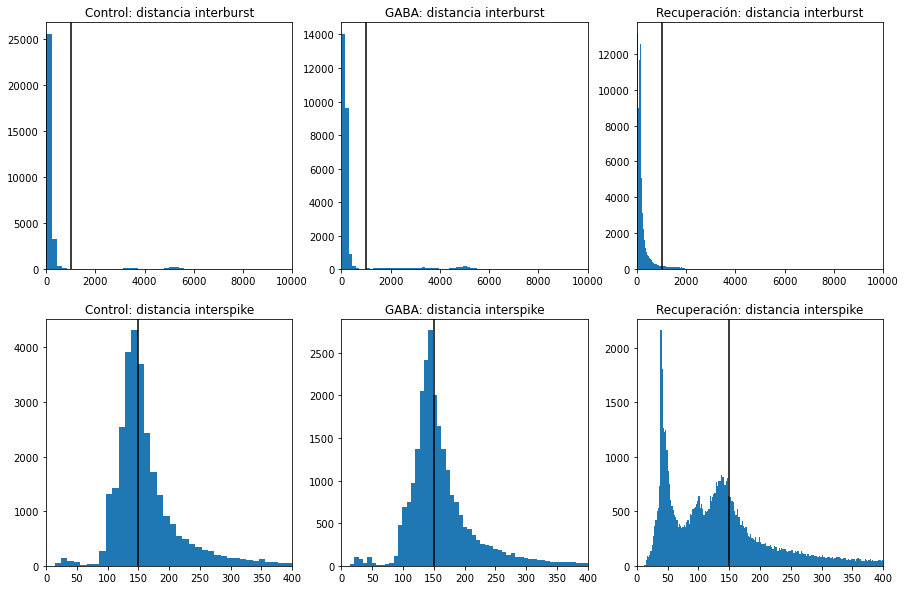

In [63]:
from_files = ["./DatosSinapsisArtificial/TrozoC_bin.csv",
              "./DatosSinapsisArtificial/TrozoG_bin.csv",
              "./DatosSinapsisArtificial/TrozoR_bin.csv"]
titles = ["Control", "GABA", "Recuperación"]
plt.figure(figsize=(15,10))
for i in range(len(from_files)):
    df = pd.read_csv(from_files[i], usecols=['LP_bin'])
    df = df.astype({"LP_bin":'u1'})

    w = df.index[df.LP_bin > 0]
    w = w[1:] - w[:-1]

    plt.subplot(2, 3, i+1)
    plt.hist(w,bins=100)
    plt.axvline(x=1000, color='k')
    plt.xlim((0, 10000))
    plt.title(f"{titles[i]}: distancia interburst")

    plt.subplot(2, 3, i+4)
    plt.hist(w,bins=2000)
    plt.axvline(x=150, color='k')
    plt.xlim((0, 400))
    plt.title(f"{titles[i]}: distancia interspike")

In [30]:
with open("dataC.pkl", "rb") as f:
    data = pickle.load(f)

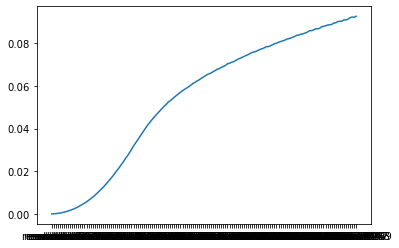

In [33]:
import matplotlib.pyplot as plt
plt.plot(data['mutual_info']['word_len 2'])

<AxesSubplot:>

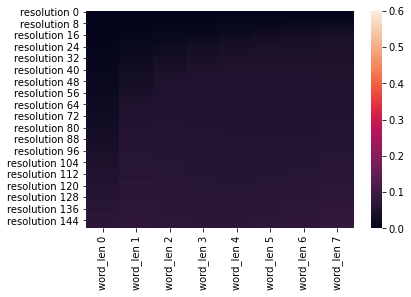

In [34]:
sns.heatmap(data['transfer_info_col1_col2'].convert_dtypes(), vmin=0, vmax=0.6)

<AxesSubplot:>

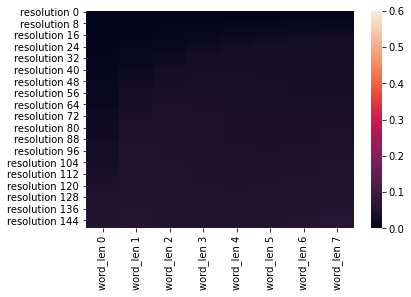

In [35]:
sns.heatmap(data['transfer_info_col2_col1'].convert_dtypes(), vmin=0, vmax=0.6)

In [18]:
data['transfer_info_col1_col2'].convert_dtypes()

word_len 0  word_len 1  word_len 2  word_len 3  word_len 4  \
resolution 0     1.473323e-05    0.000029    0.000044    0.000062    0.000078   
resolution 1     3.161382e-05    0.000051    0.000078    0.000101    0.000123   
resolution 2     4.953448e-05    0.000075    0.000099    0.000165    0.000210   
resolution 3     8.431653e-07    0.000069    0.000097    0.000125    0.000155   
resolution 4     5.136340e-06    0.000010    0.000026    0.000036    0.000067   
...                       ...         ...         ...         ...         ...   
resolution 1995  3.110527e-02    0.098753    0.190291    0.225819    0.255806   
resolution 1996  3.156160e-02    0.102045    0.200281    0.234947    0.266264   
resolution 1997  3.428090e-02    0.100885    0.195577    0.231660    0.263365   
resolution 1998  3.015882e-02    0.099446    0.197203    0.233716    0.265394   
resolution 1999  3.087686e-02    0.104713    0.207569    0.245708    0.279373   

                 word_len 5  word_len 6  word_len 7  
resolution 0       0.000096    0.000113    0.000129  
resolution 1       0.000160    0.000196    0.000224  
resolution 2       0.000257    0.000305    0.000357  
resolution 3       0.000187    0.000222    0.000265  
resolution 4       0.000116    0.000177    0.000244  
...                     ...         ...         ...  
resolution 1995    0.286521    0.324507    0.369734  
resolution 1996    0.297869    0.336484    0.383125  
resolution 1997    0.294972    0.332963    0.378682  
resolution 1998    0.297279    0.334500    0.377656  
resolution 1999    0.312057    0.351086    0.396204  

[2000 rows x 8 columns]

In [36]:
df = pd.read_csv("./DatosSinapsisArtificial/TrozoC_bin.csv")[['LP_bin', 'VD_bin']]
df = df.astype({"LP_bin":'u1', "VD_bin":'u1'})

In [3]:
df.dtypes

LP_bin    uint8
VD_bin    uint8
dtype: object

In [59]:
with open(data_file, "wb") as f:
    pickle.dump(data, f)

In [60]:
data_file = "dataC.pkl"
try:
    with open(data_file, "rb") as f:
        data = pickle.load(f)
except FileNotFoundError:
    data = np.zeros((14,8))

In [62]:
for i in range(14):
    for j in range(8):
        if data[i][j] != 0:
            print(f"Previamente calculado: resolución={i+1}, ventana={j+1} en la posicion[{i}][{j}], valor={data[i][j]}")
            continue
        print(f"Comienzo cálculo resolución={i+1}, ventana={j+1} en la posicion[{i}][{j}]")
        data[i][j] = mutual_info_optimized(resolution(df, i+1), ['LP_bin', 'VD_bin'], j+1)
        print(f"Calculado: resolución={i+1}, ventana={j+1} en la posicion[{i}][{j}], valor={data[i][j]}")
        with open(data_file, "wb") as f:
            pickle.dump(data, f)

Previamente calculado: resolución=1, ventana=1 en la posicion[0][0], valor=2.0614755821476982e-06
Previamente calculado: resolución=1, ventana=2 en la posicion[0][1], valor=7.4095807517035595e-06
Previamente calculado: resolución=1, ventana=3 en la posicion[0][2], valor=1.7711440774462184e-05
Previamente calculado: resolución=1, ventana=4 en la posicion[0][3], valor=3.1902582232123944e-05
Previamente calculado: resolución=1, ventana=5 en la posicion[0][4], valor=4.955434285208726e-05
Previamente calculado: resolución=1, ventana=6 en la posicion[0][5], valor=7.145569919383976e-05
Previamente calculado: resolución=1, ventana=7 en la posicion[0][6], valor=9.687272837563543e-05
Previamente calculado: resolución=1, ventana=8 en la posicion[0][7], valor=0.00012617250173557748
Previamente calculado: resolución=2, ventana=1 en la posicion[1][0], valor=7.854290998060565e-06
Previamente calculado: resolución=2, ventana=2 en la posicion[1][1], valor=3.114204515242136e-05
Previamente calculado: re

Entropia primera columna: 0.8767567519653664
Entropia segunda columna: 0.6447421538876463
Entropia conjunta: 1.5110776748647492
Calculado: resolución=9, ventana=8 en la posicion[8][7], valor=0.010421230988263641
Comienzo cálculo resolución=10, ventana=1 en la posicion[9][0]
Entropia primera columna: 0.12013238973870273
Entropia segunda columna: 0.08838206651293776
Entropia conjunta: 0.20831357735058048
Calculado: resolución=10, ventana=1 en la posicion[9][0], valor=0.00020087890106001982
Comienzo cálculo resolución=10, ventana=2 en la posicion[9][1]
Entropia primera columna: 0.23989585208493652
Entropia segunda columna: 0.17659437532659064
Entropia conjunta: 0.41573056464054914
Calculado: resolución=10, ventana=2 en la posicion[9][1], valor=0.0007596627709780535
Comienzo cálculo resolución=10, ventana=3 en la posicion[9][2]
Entropia primera columna: 0.3594162910217686
Entropia segunda columna: 0.2646380476959909
Entropia conjunta: 0.6223409349203494
Calculado: resolución=10, ventana=3 

Entropia primera columna: 0.8816903617454656
Entropia segunda columna: 0.6520189389238117
Entropia conjunta: 1.5213662242936805
Calculado: resolución=13, ventana=6 en la posicion[12][5], valor=0.012343076375596729
Comienzo cálculo resolución=13, ventana=7 en la posicion[12][6]
Entropia primera columna: 1.0268690097072544
Entropia segunda columna: 0.7599149071177502
Entropia conjunta: 1.7696563721412826
Calculado: resolución=13, ventana=7 en la posicion[12][6], valor=0.017127544683722018
Comienzo cálculo resolución=13, ventana=8 en la posicion[12][7]
Entropia primera columna: 1.1719491579113732
Entropia segunda columna: 0.8673115563869037
Entropia conjunta: 2.0165881729884094
Calculado: resolución=13, ventana=8 en la posicion[12][7], valor=0.022672541309867622
Comienzo cálculo resolución=14, ventana=1 en la posicion[13][0]
Entropia primera columna: 0.15699870955783224
Entropia segunda columna: 0.11610051595431858
Entropia conjunta: 0.2727379839815017
Calculado: resolución=14, ventana=1 

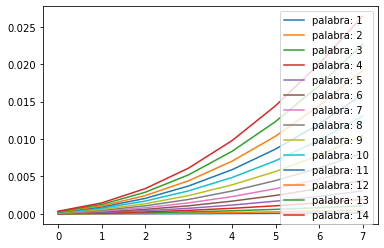

In [63]:
for i in range(14):
    plt.plot(data[i], label=f"resolucion: {i+1}")
    plt.legend()

In [3]:
df = pd.DataFrame(columns=['LP_bin', 'VD_bin'])

In [7]:
df.LP_bin = [0,0,0,0,0,0,0,0,0,0]
df.VD_bin = [0,0,0,0,0,0,0,0,0,0]

In [7]:
mutual_info_optimized(resolution(df, 100), ['LP_bin', 'VD_bin'], 1)

Entropia primera columna: 0.6383522843974425
Entropia segunda columna: 0.5003797555119865
Entropia conjunta: 1.1180052863560763


0.02072675355335285

In [9]:
mutual_info_optimized(resolution(df, 150), ['LP_bin', 'VD_bin'], 1)

Entropia primera columna: 0.7736364504765536
Entropia segunda columna: 0.6185150533286701
Entropia conjunta: 1.348515976071144


0.04363552773407964

In [10]:
df

Unnamed: 0        LP        VD  LP_bin  VD_bin
0                  0  0.004883  0.015259       0       0
1                  1  0.001526  0.024109       0       0
2                  2 -0.010681  0.031128       0       0
3                  3 -0.022278  0.041809       0       0
4                  4 -0.028076  0.045471       0       0
...              ...       ...       ...     ...     ...
19847695    19847695 -0.005798  0.017395       0       0
19847696    19847696 -0.007019  0.024109       0       0
19847697    19847697 -0.000916  0.029602       0       0
19847698    19847698  0.007324  0.039368       0       0
19847699    19847699  0.004272  0.049438       0       0

[19847700 rows x 5 columns]

(0.0, 2000.0)

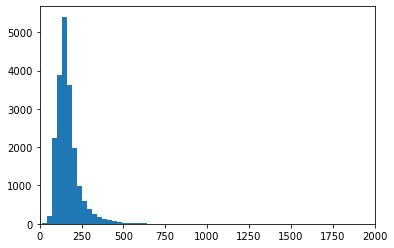

In [37]:
w = df.index[df.VD_bin > 0]
w = w[1:] - w[:-1]
plt.hist(w,bins=1000)
plt.xlim((0, 2000))

In [17]:
w

Int64Index([  97,  111,  130,  133,  135,  125,  156,  147,  132,  186,
            ...
             200,  214,  227,  500, 4951,  111,  154,  171,  178,  359],
           dtype='int64', length=32352)

In [ ]:
w = df.index[df.LP_bin > 0]

In [18]:
pd.Series(w).reindex()

0         97
1        111
2        130
3        133
4        135
        ... 
32347    111
32348    154
32349    171
32350    178
32351    359
Length: 32352, dtype: int64

In [38]:
threshold = 1000
w = df.index[df.LP_bin > 0]
w = (w[1:] - w[:-1]).to_list()
w.insert(0, np.inf)
df["distance"] = 0
df.loc[df.LP_bin > 0, "distance"] = w
df["LP2_bin"] = 0
df.loc[df.distance > threshold, "LP2_bin"] = 1

w = df.index[df.VD_bin > 0]
w = (w[1:] - w[:-1]).to_list()
w.insert(0, np.inf)
df["distance"] = 0
df.loc[df.VD_bin > 0, "distance"] = w
df["VD2_bin"] = 0
df.loc[df.distance > threshold, "VD2_bin"] = 1

In [40]:
df["VD2_bin"].sum()

1960

In [ ]:

df2 = get_bursts(df, 1000, ["LP_bin", "VD_bin"], ["LP_burst", "VD_burst"])


In [27]:
len(df.loc[df.LP_bin > 0, "distance"])

32353

In [32]:
df[df.LP_bin > 0]

LP_bin  VD_bin  joined  distance
2878           1       0    1000       inf
2975           1       0    1000      97.0
3086           1       0    1000     111.0
3216           1       0    1000     130.0
3349           1       0    1000     133.0
...          ...     ...     ...       ...
19843981       1       0    1000     111.0
19844135       1       0    1000     154.0
19844306       1       0    1000     171.0
19844484       1       0    1000     178.0
19844843       1       0    1000     359.0

[32353 rows x 4 columns]

In [29]:
w

Int64Index([  97,  111,  130,  133,  135,  125,  156,  147,  132,  186,
            ...
             200,  214,  227,  500, 4951,  111,  154,  171,  178,  359],
           dtype='int64', length=32352)

In [15]:
transfer_info(resolution(df,100), ['LP_bin', 'VD_bin'], 4)

Entropia primera columna: 2.02324110933116
Entropia segunda columna: 1.5134710660487392
Entropia conjunta: 3.4481154575867468


([0.043789500610948426, 0.05853875887066326],
 0.08859671779315281,
 [2.02324110933116, 1.5134710660487392],
 3.4481154575867468)

In [11]:
a = [1,2]

In [12]:
reversed(a)

In [13]:
for i in reversed(a):
    print(i)

2
1


In [23]:
a.insert(0,np.inf)

In [24]:
a

[inf, 10000, 1, 2]

In [6]:
col_names = [f"word_len {i}" for i in range(10)]
row_names = [f"resolution {i}" for i in range(10)]
data = {
    "transfer_info_col1_col2" : pd.DataFrame(columns = col_names, index = row_names),
    "mutual_info" : pd.DataFrame(columns = col_names, index = row_names),
    "col1_entropy" : pd.DataFrame(columns = col_names, index = row_names),
    "col2_entropy" : pd.DataFrame(columns = col_names, index = row_names),
    "joined_entropy" : pd.DataFrame(columns = col_names, index = row_names)
}
data["transfer_info_col1_col2"][:] = 0

In [7]:
data

{'transfer_info_col1_col2':              word_len 0 word_len 1 word_len 2 word_len 3 word_len 4  \
 resolution 0          0          0          0          0          0   
 resolution 1          0          0          0          0          0   
 resolution 2          0          0          0          0          0   
 resolution 3          0          0          0          0          0   
 resolution 4          0          0          0          0          0   
 resolution 5          0          0          0          0          0   
 resolution 6          0          0          0          0          0   
 resolution 7          0          0          0          0          0   
 resolution 8          0          0          0          0          0   
 resolution 9          0          0          0          0          0   
 
              word_len 5 word_len 6 word_len 7 word_len 8 word_len 9  
 resolution 0          0          0          0          0          0  
 resolution 1          0          0  